1. General characteristics of the data
2. Calculate the GR and dN/dt
3. Nanoparticle ranking

In [1]:
from nais.utils import remove_bad_data
import xarray as xr

ds = xr.open_dataset("nais1_dataset.nc")
bad_data = xr.open_dataset("bad_data_bounds.nc")
ds = remove_bad_data(ds, bad_data)

In [26]:
nais_neg_particles = ds['neg_particles'].to_dataframe(name='particles').reset_index()
# Unstack the particles dimension to get a DataFrame with the diameter as columns
nais_neg_particles = nais_neg_particles.pivot(index='time', columns='diameter', values='particles')
import numpy as np
nais_neg_particles = nais_neg_particles.mask(nais_neg_particles < 0, np.nan)  # Replace negative values with NaN

In [4]:
import aerosol.functions as af
# Convert from normalized number concentrations to unnormalized number concentrations.
dN = af.dndlogdp2dn(nais_neg_particles)
dN

diameter             8.028800e-10  8.628290e-10  9.272542e-10  9.961534e-10  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00           NaN           NaN           NaN           NaN   
2025-01-31 21:00:00           NaN           NaN           NaN           NaN   
2025-01-31 22:00:00           NaN           NaN           NaN           NaN   
2025-01-31 23:00:00           NaN           NaN           NaN           NaN   
2025-02-01 00:00:00           NaN           NaN           NaN           NaN   

diameter             1.070172e-09  1.151195e-09  1.238353e-09  1.330049e-09  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00           NaN           NaN           NaN           NaN   
2025-01-31 21:00:00           NaN           NaN           NaN           NaN   
2025-01-31 22:00:00           NaN           NaN           NaN           NaN   
2025-01-31 23:00:00           NaN           NaN           NaN           NaN   
2025-02-01 00:00:00           NaN           NaN           NaN           NaN   

diameter             1.428535e-09  1.535309e-09  ...  2.107146e-08  \
time                                             ...                 
2024-05-16 00:00:00           NaN           NaN  ...           NaN   
2024-05-16 01:00:00           NaN           NaN  ...           NaN   
2024-05-16 02:00:00           NaN           NaN  ...           NaN   
2024-05-16 03:00:00           NaN           NaN  ...           NaN   
2024-05-16 04:00:00           NaN           NaN  ...           NaN   
...                           ...           ...  ...           ...   
2025-01-31 20:00:00           NaN           NaN  ...    228.314513   
2025-01-31 21:00:00           NaN           NaN  ...    254.621380   
2025-01-31 22:00:00           NaN           NaN  ...    270.421313   
2025-01-31 23:00:00           NaN           NaN  ...    161.898819   
2025-02-01 00:00:00           NaN           NaN  ...    126.222378   

diameter             2.268812e-08  2.445574e-08  2.636108e-08  2.841614e-08  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00    228.445493    245.608358    264.188224    304.345799   
2025-01-31 21:00:00    279.856758    302.860723    331.301835    345.948324   
2025-01-31 22:00:00    300.479158    334.902082    388.519622    445.089525   
2025-01-31 23:00:00    170.090950    180.416541    203.695875    223.694804   
2025-02-01 00:00:00    135.677603    146.187399    165.076195    190.140034   

diame

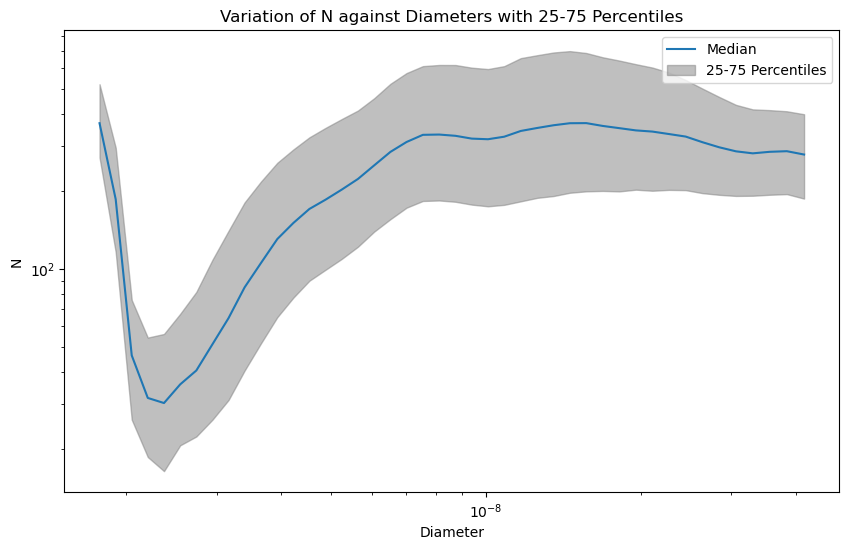

In [5]:
import matplotlib.pyplot as plt

# Calculate the 25th and 75th percentiles
percentiles_25 = dN.quantile(0.25)
percentiles_75 = dN.quantile(0.75)

# Plot the median and the percentiles
plt.figure(figsize=(10, 6))
plt.plot(dN.median(), label='Median')
plt.fill_between(dN.columns, percentiles_25, percentiles_75, color='gray', alpha=0.5, label='25-75 Percentiles')
plt.xlabel('Diameter')
plt.ylabel('N')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Variation of N against Diameters with 25-75 Percentiles')
plt.show()

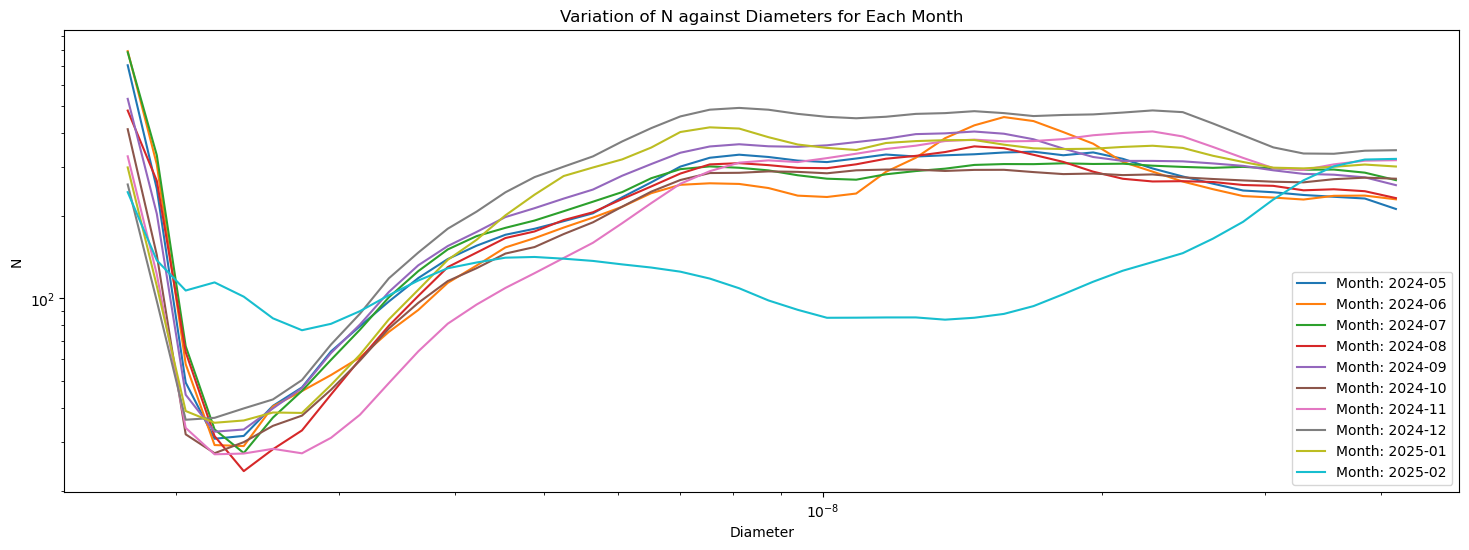

In [9]:
# Calculate the monthly median
monthly_median = dN.resample('M').median()

plt.figure(figsize=(18, 6))

# Iterate over each month in the monthly_median dataframe
for month, data in monthly_median.iterrows():
    plt.plot(data.index, data.values, label=f'Month: {month.strftime("%Y-%m")}')

plt.xlabel('Diameter')
plt.ylabel('N')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Variation of N against Diameters for Each Month')
plt.show()

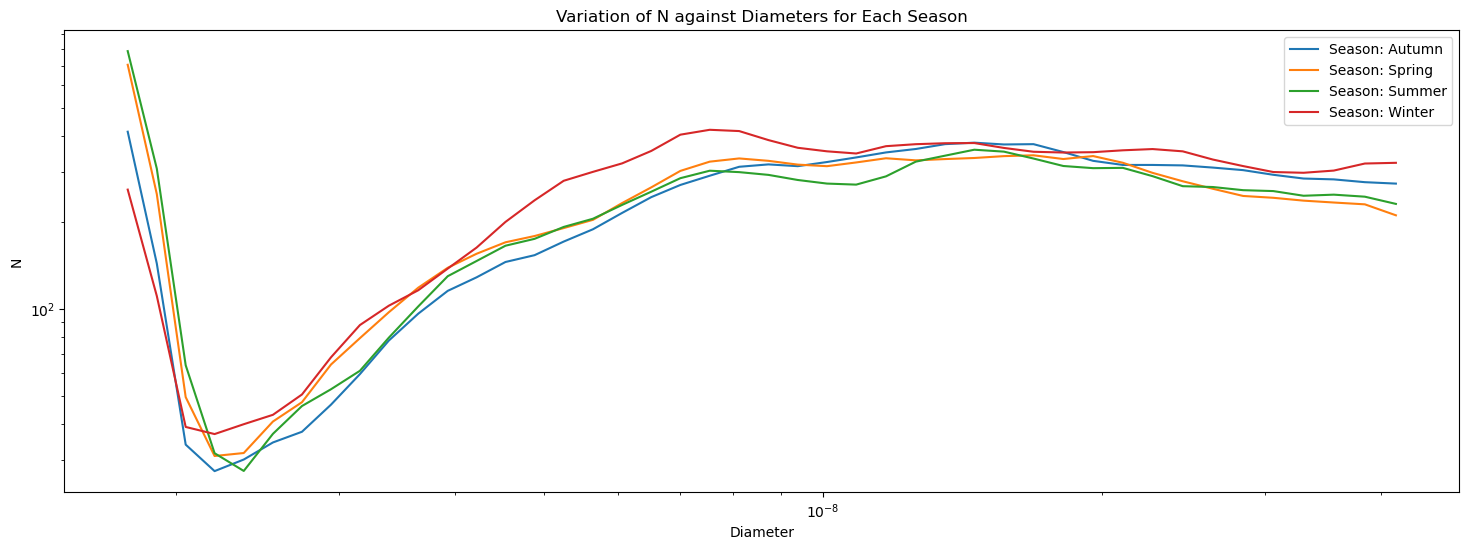

In [10]:
# Define the seasons
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

# Add a 'season' column to the dataframe
monthly_median['season'] = monthly_median.index.month.map(seasons)

# Calculate the median for each season
seasonal_median = monthly_median.groupby('season').median()

plt.figure(figsize=(18, 6))

# Iterate over each season in the seasonal_median dataframe
for season, data in seasonal_median.iterrows():
    plt.plot(data.index, data.values, label=f'Season: {season}')

plt.xlabel('Diameter')
plt.ylabel('N')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Variation of N against Diameters for Each Season')
plt.show()

In [11]:
total_number = af.calc_conc(nais_neg_particles,0.8e-9, 42e-9,frac=0.5)
total_number

0
time                             
2024-05-16 00:00:00           NaN
2024-05-16 01:00:00           NaN
2024-05-16 02:00:00           NaN
2024-05-16 03:00:00           NaN
2024-05-16 04:00:00           NaN
...                           ...
2025-01-31 20:00:00  25428.334951
2025-01-31 21:00:00  19622.244653
2025-01-31 22:00:00  21145.360201
2025-01-31 23:00:00   6485.996641
2025-02-01 00:00:00   5999.755246

[6265 rows x 1 columns]

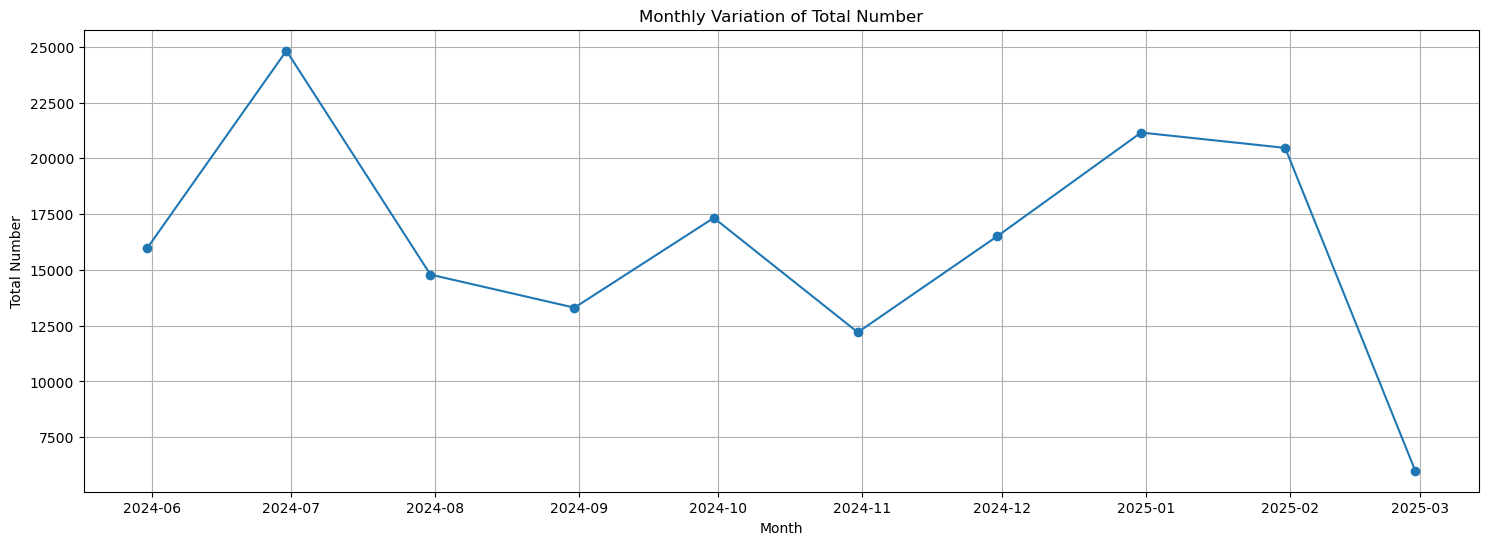

In [12]:
# Resample the total_number to monthly frequency and calculate the mean
monthly_total_number = total_number.resample('M').mean()

plt.figure(figsize=(18, 6))

# Plot the monthly total number
plt.plot(monthly_total_number.index, monthly_total_number.values, marker='o')

plt.xlabel('Month')
plt.ylabel('Total Number')
plt.title('Monthly Variation of Total Number')
plt.grid(True)
plt.show()

                  0
count      4.000000
mean   16932.073247
std     2464.157493
min    14789.776604
25%    15670.286888
50%    16234.910417
75%    17496.696776
max    20468.695549


<Figure size 1000x600 with 0 Axes>

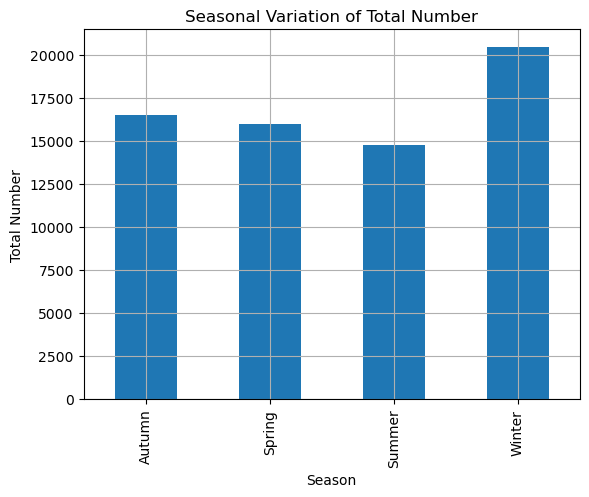

In [15]:
# Calculate the seasonal total number
seasonal_total_number = monthly_total_number.groupby(monthly_total_number.index.month.map(seasons)).median()

# Calculate basic statistics for each season
seasonal_stats = seasonal_total_number.describe()
print(seasonal_stats)

# Plot the seasonal total number variation
plt.figure(figsize=(10, 6))
seasonal_total_number.plot(kind='bar', legend=False)
plt.xlabel('Season')
plt.ylabel('Total Number')
plt.title('Seasonal Variation of Total Number')
plt.grid(True)
plt.show()

In [18]:
monthly_total_number

0
time                    
2024-05-31  15963.790316
2024-06-30  24823.450553
2024-07-31  14789.776604
2024-08-31  13307.109654
2024-09-30  17330.826414
2024-10-31  12202.535841
2024-11-30  16506.030519
2024-12-31  21156.351000
2025-01-31  20468.695549
2025-02-28   5999.755246

In [19]:
seasonal_total_number

0
time                
Autumn  16506.030519
Spring  15963.790316
Summer  14789.776604
Winter  20468.695549

#### Divide the N to Nucleation and Aitken mode

In [20]:
dN_1_20 = dN.loc[:, (dN.columns >= 1e-9) & (dN.columns < 20e-9)]
dN_20_42 = dN.loc[:, (dN.columns >= 20e-9) & (dN.columns < 42e-9)]

#### Identify the diameters with max N for each day, in each mode

In [21]:
import pandas as pd

nuc_max = pd.DataFrame({
    'max_dim_nuc': dN_1_20.idxmax(axis=1),
    'max_conc_nuc': dN_1_20.max(axis=1)
})
nuc_max

/tmp/ipykernel_5799/2227497800.py:4: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'max_dim_nuc': dN_1_20.idxmax(axis=1),


max_dim_nuc  max_conc_nuc
time                                           
2024-05-16 00:00:00           NaN           NaN
2024-05-16 01:00:00           NaN           NaN
2024-05-16 02:00:00           NaN           NaN
2024-05-16 03:00:00           NaN           NaN
2024-05-16 04:00:00           NaN           NaN
...                           ...           ...
2025-01-31 20:00:00  3.931458e-09   1240.970564
2025-01-31 21:00:00  3.931458e-09    914.459018
2025-01-31 22:00:00  3.931458e-09   1128.211029
2025-01-31 23:00:00  1.773835e-09    271.706487
2025-02-01 00:00:00  1.773835e-09    243.725832

[6265 rows x 2 columns]

In [22]:
ait_max = pd.DataFrame({
    'max_dim_ait': dN_20_42.idxmax(axis=1),
    'max_conc_ait': dN_20_42.max(axis=1)
})
ait_max

/tmp/ipykernel_5799/3812928736.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'max_dim_ait': dN_20_42.idxmax(axis=1),


max_dim_ait  max_conc_ait
time                                           
2024-05-16 00:00:00           NaN           NaN
2024-05-16 01:00:00           NaN           NaN
2024-05-16 02:00:00           NaN           NaN
2024-05-16 03:00:00           NaN           NaN
2024-05-16 04:00:00           NaN           NaN
...                           ...           ...
2025-01-31 20:00:00  3.846420e-08    441.369759
2025-01-31 21:00:00  4.155270e-08    551.842251
2025-01-31 22:00:00  3.560527e-08    587.821010
2025-01-31 23:00:00  3.846420e-08    359.691640
2025-02-01 00:00:00  4.155270e-08    322.173857

[6265 rows x 2 columns]

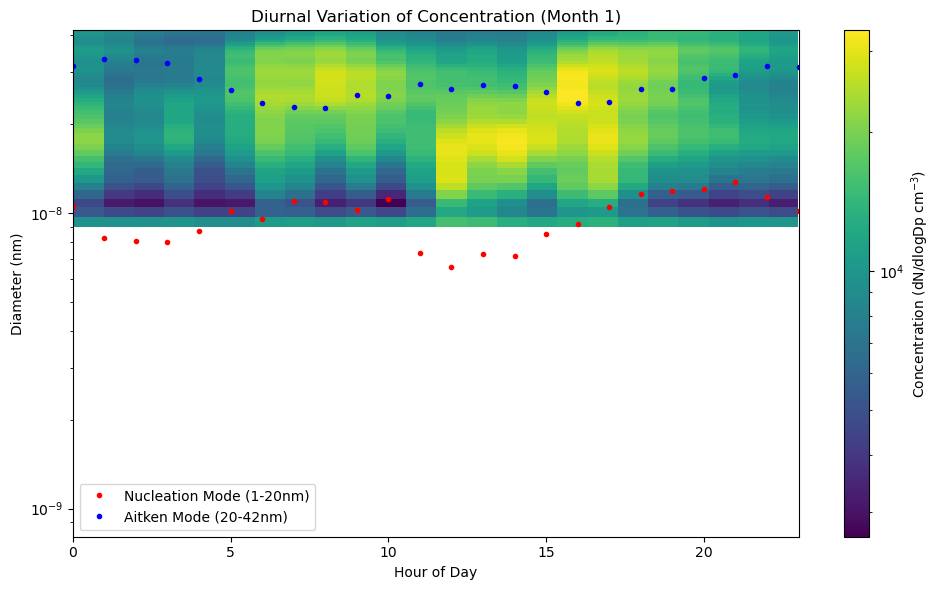

/tmp/ipykernel_5799/451535669.py:17: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im = ax.imshow(conc_matrix.T, aspect='auto', origin='lower',


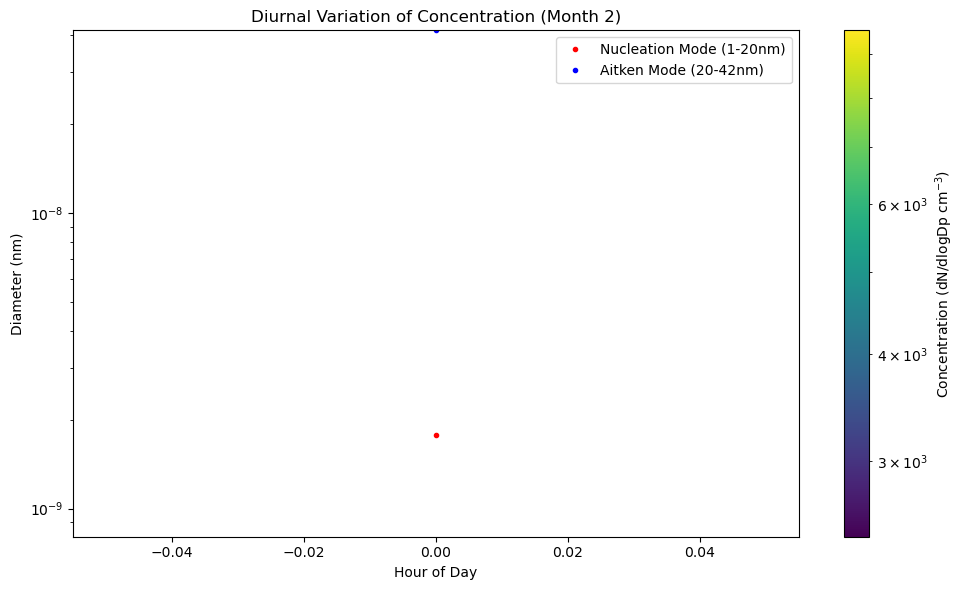

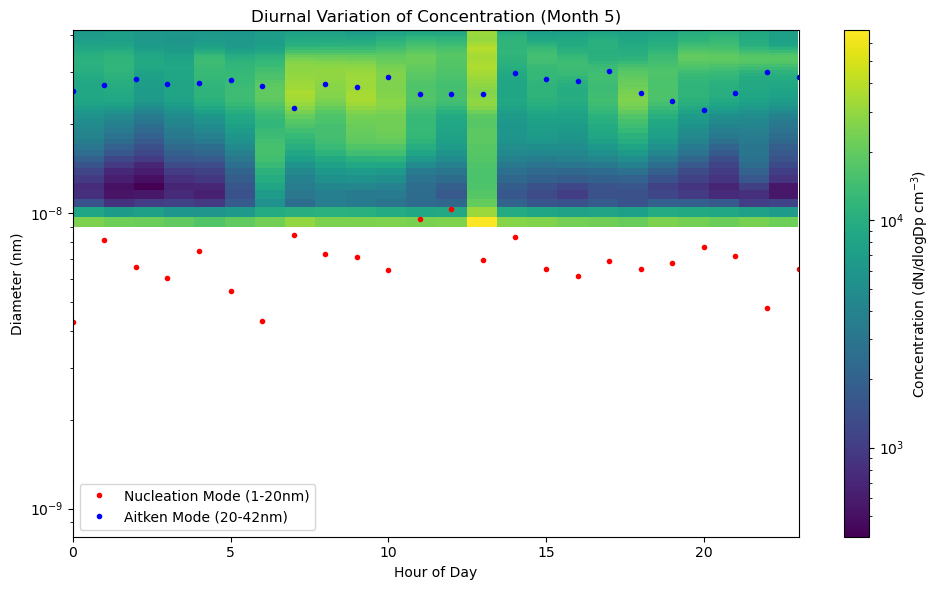

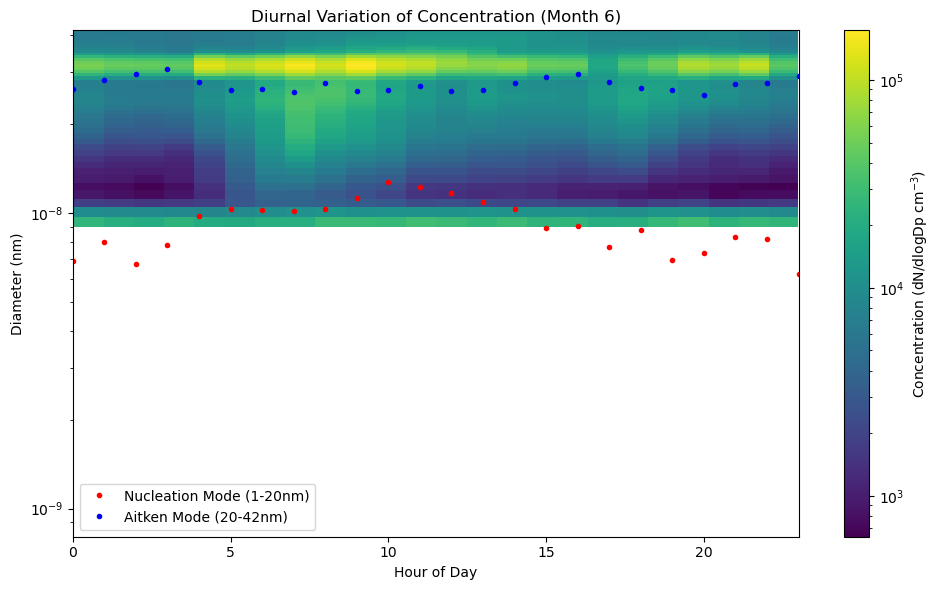

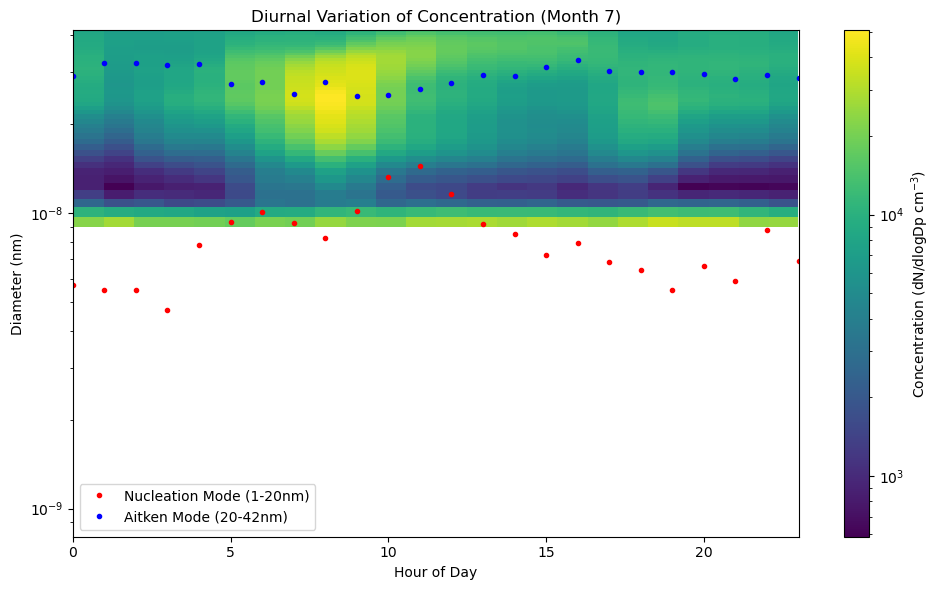

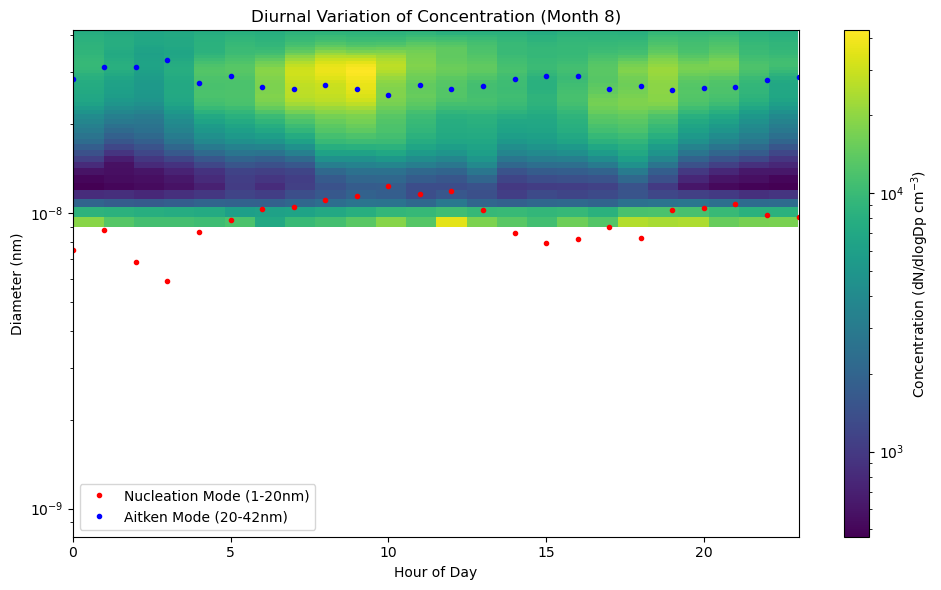

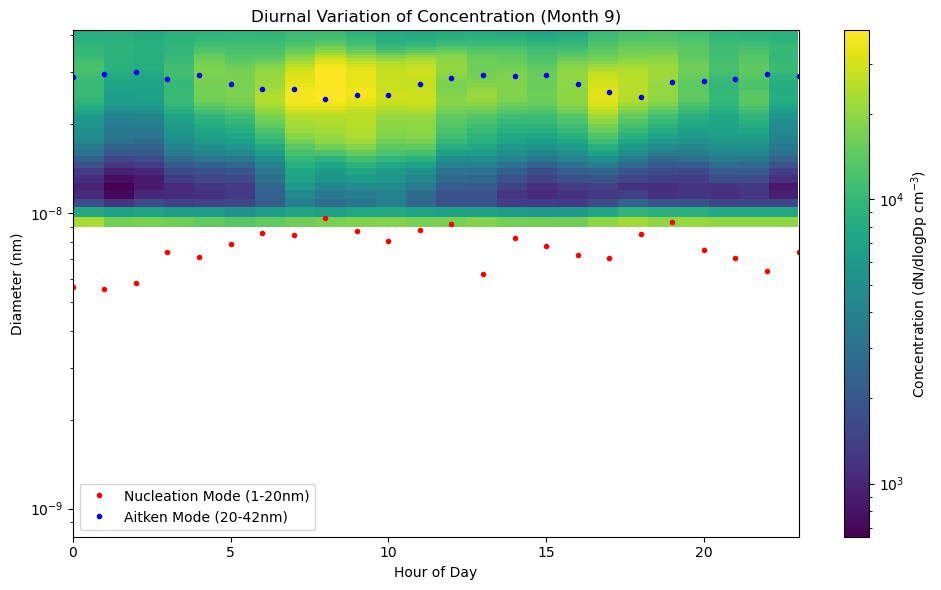

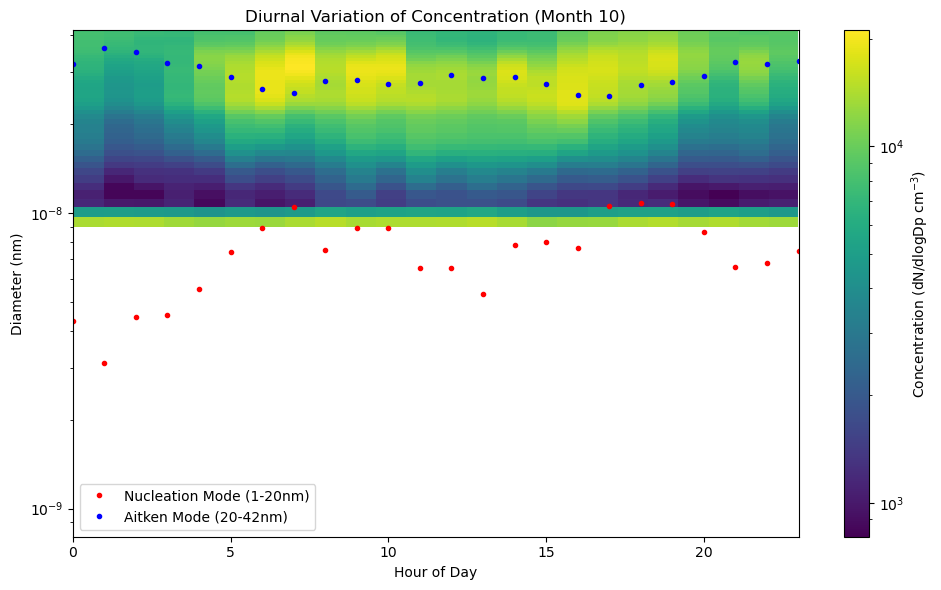

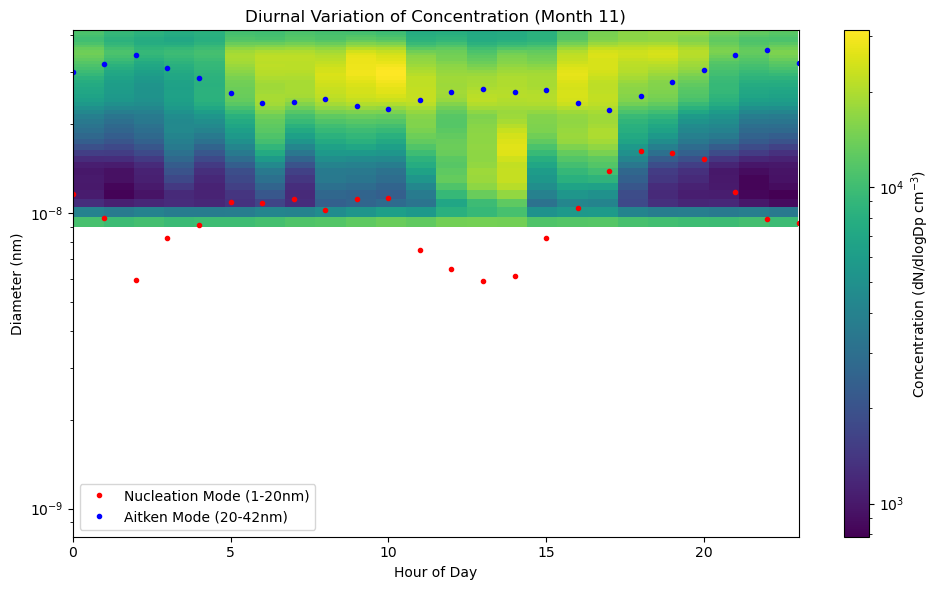

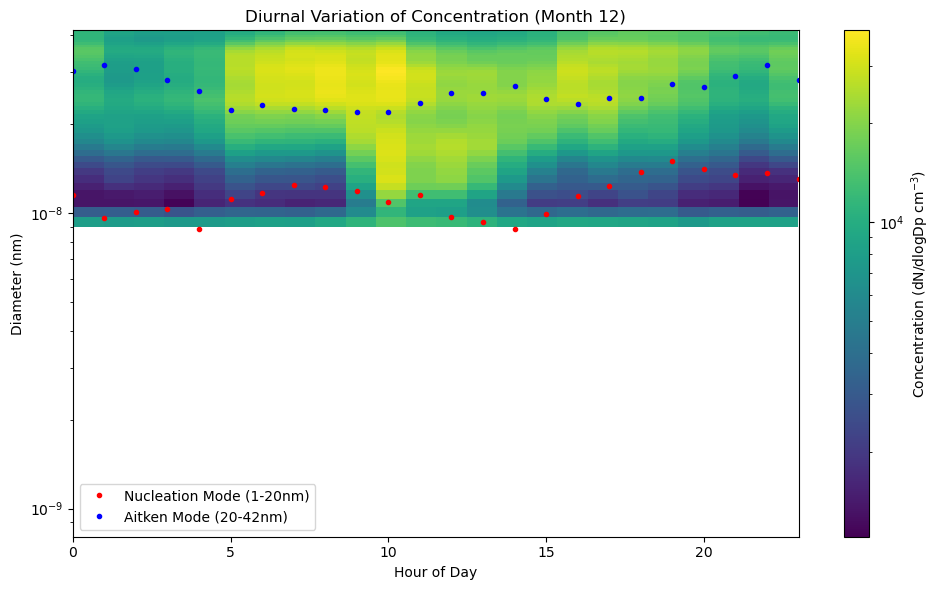

In [ ]:
from matplotlib import ticker
import matplotlib.colors as colors
diameter_cols = nais_neg_particles.columns

# Loop over each month using the datetime index
for m in sorted(nais_neg_particles.index.month.unique()):
    # Filter rows for the current month using the index month
    df_month = nais_neg_particles[nais_neg_particles.index.month == m]
    # Group by hour (extracted from the index) and compute mean concentration profile
    diurnal_conc = df_month.groupby(df_month.index.hour).mean()

    hours = diurnal_conc.index.values
    diameters = diurnal_conc.columns.values.astype(float)
    conc_matrix = diurnal_conc.values  # shape: (n_hours, n_diameters)

    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(conc_matrix.T, aspect='auto', origin='lower',
                   extent=[hours.min(), hours.max(), diameters.min(), diameters.max()],
                   norm=colors.LogNorm(),cmap='viridis')
    cbar = plt.colorbar(im, ax=ax,ticks=[1,1e1,1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
    cbar.set_label('Concentration (dN/dlogDp cm$^{-3}$)')
    
    ax.set_xlabel('Hour of Day')
    ax.set_yscale('log')
    ax.set_ylabel('Diameter (nm)')
    ax.set_title(f'Diurnal Variation of Concentration (Month {m})')
    
    # For overlay data, use similar filtering based on the datetime index:
    #nuc_month = nuc_max[nuc_max.index.month == m].groupby(nuc_max.index.hour).mean()
    # Filter for the current month
    nuc_month = nuc_max[nuc_max.index.month == m]
    # Group by the hour of the filtered index and compute the mean
    nuc_grouped = nuc_month.groupby(nuc_month.index.hour).mean()

    aitk_month = ait_max[ait_max.index.month == m]
    aitk_grouped = aitk_month.groupby(aitk_month.index.hour).mean()

    #aitk_month = ait_max[ait_max.index.month == m].groupby(ait_max.index.hour).mean()
    
    ax.plot(nuc_grouped.index, nuc_grouped['max_dim_nuc'], 'r.', label='Nucleation Mode (1-20nm)')
    ax.plot(aitk_grouped.index, aitk_grouped['max_dim_ait'], 'b.', label='Aitken Mode (20-42nm)')
    ax.legend()
    
    plt.tight_layout()
    plt.show()


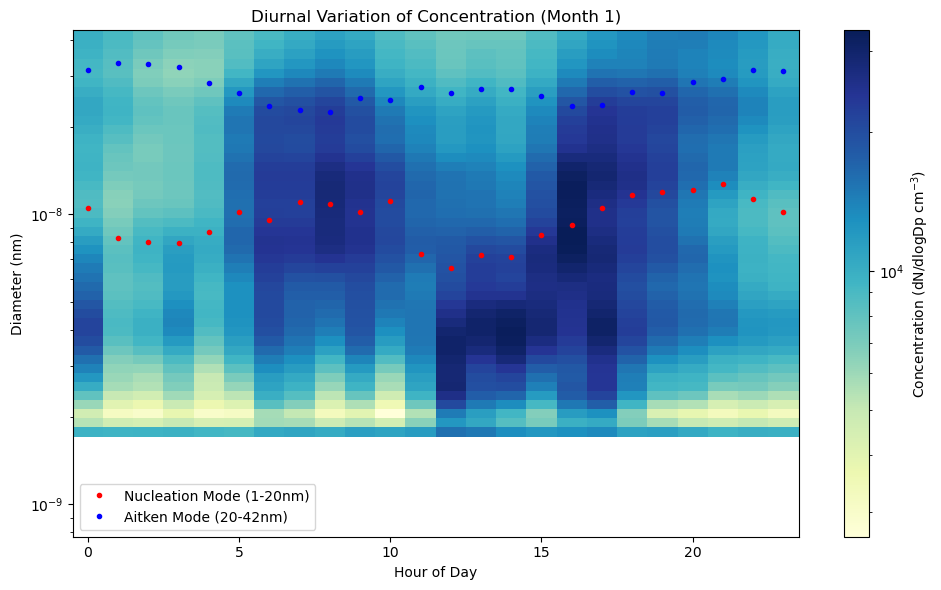

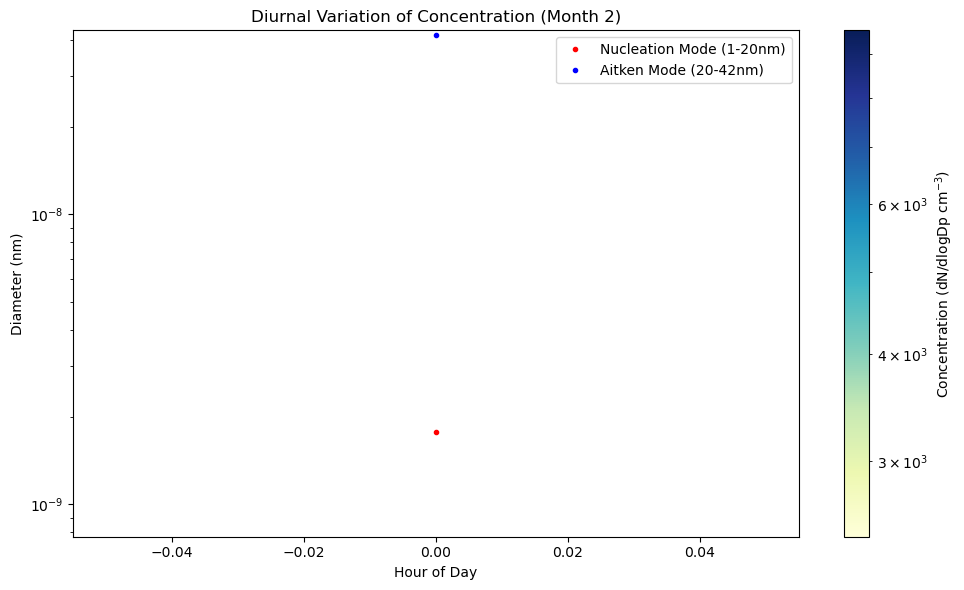

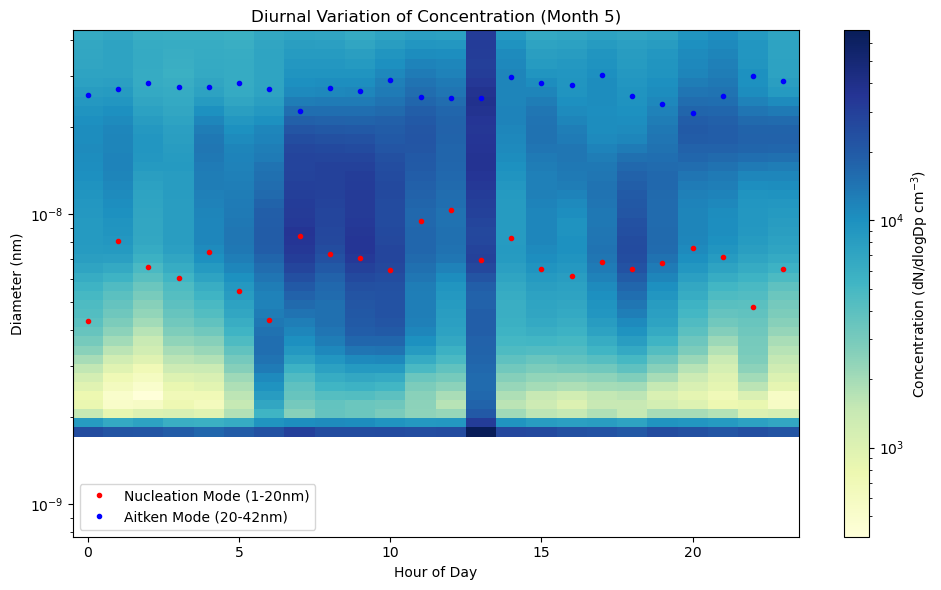

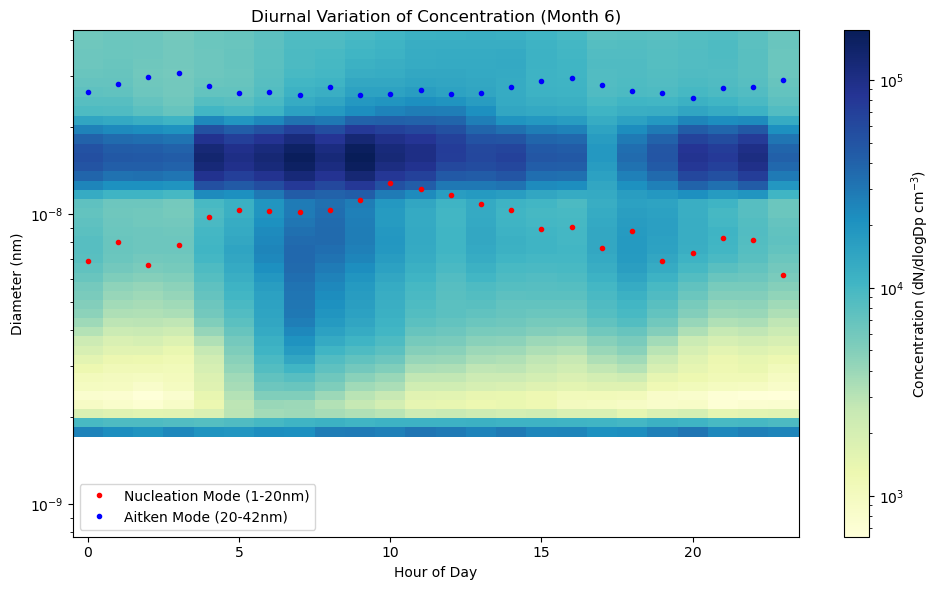

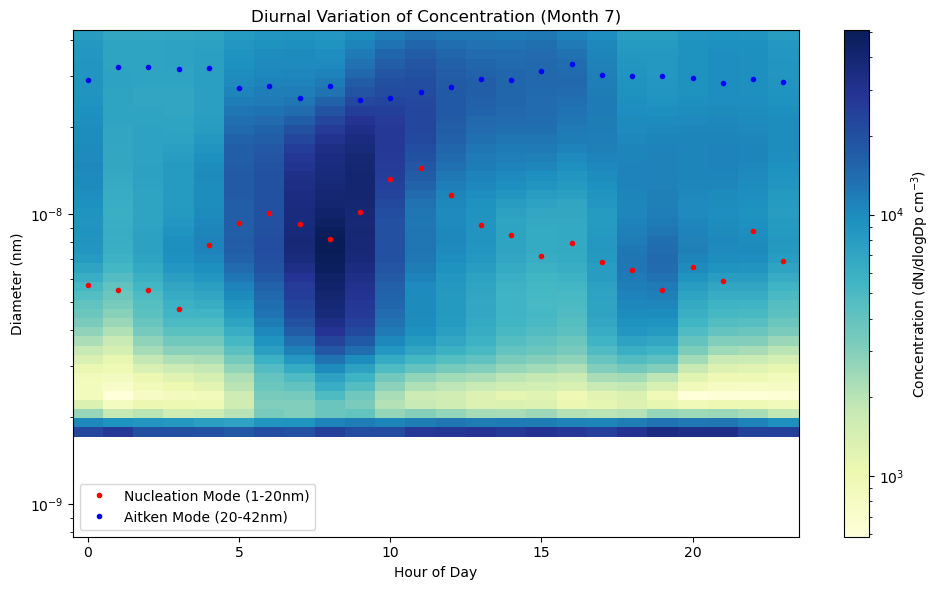

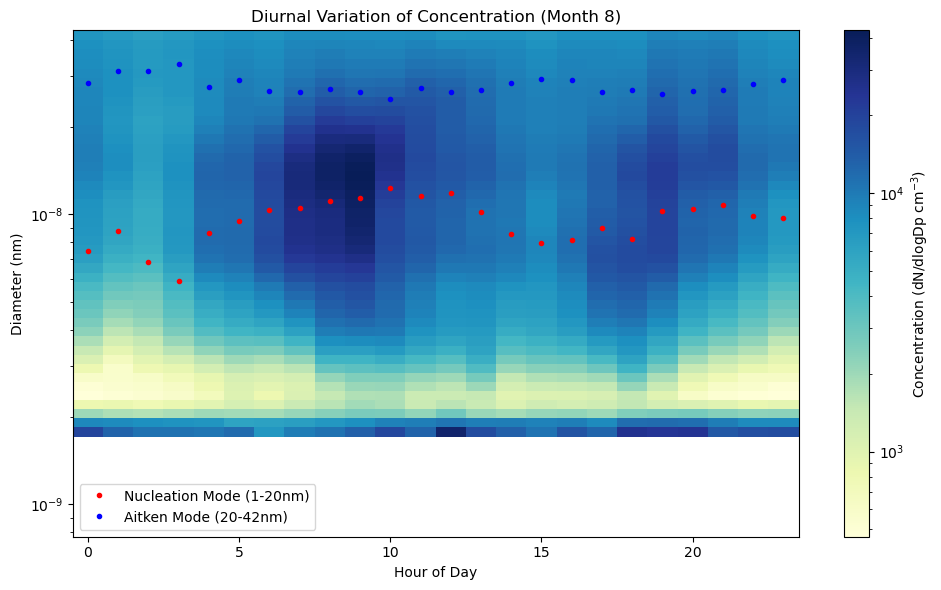

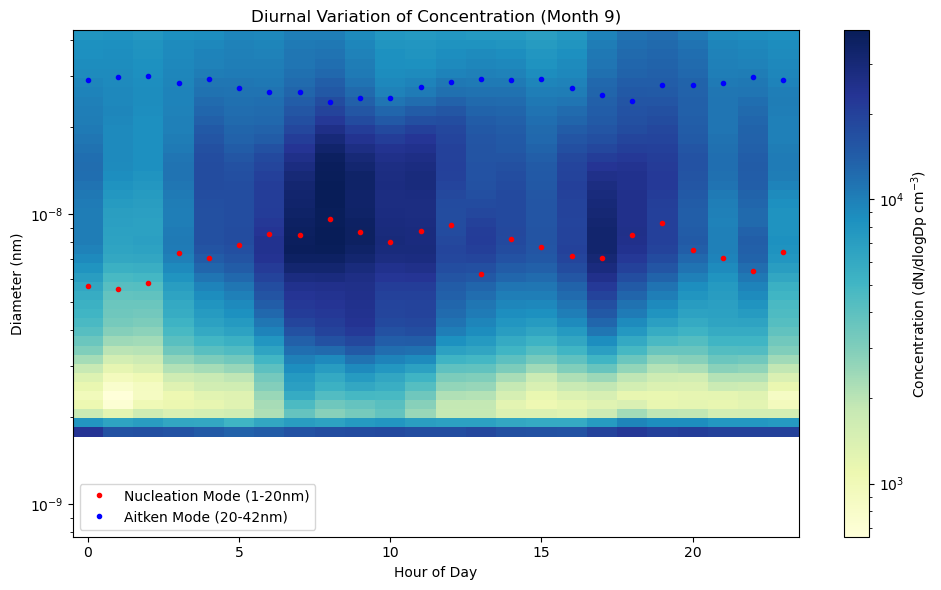

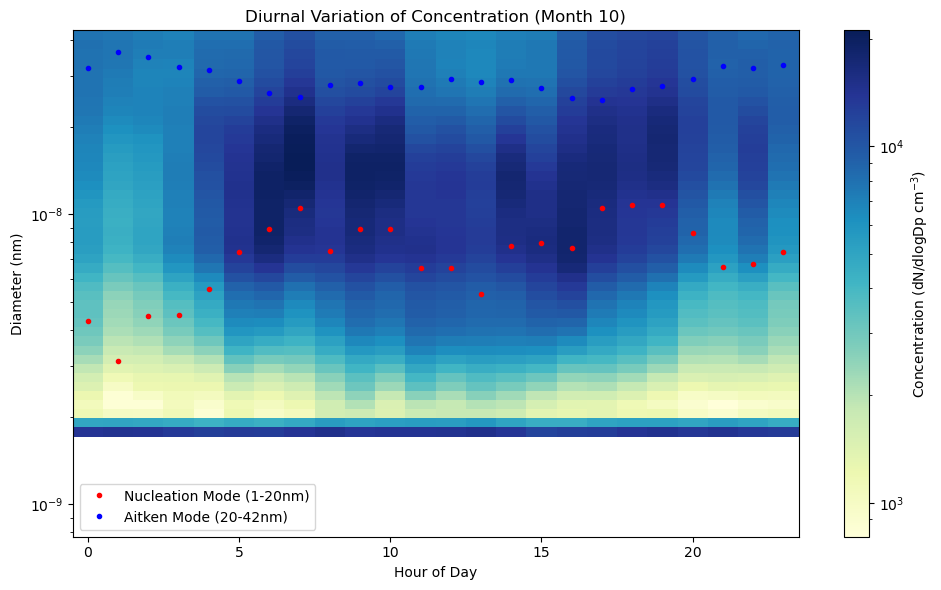

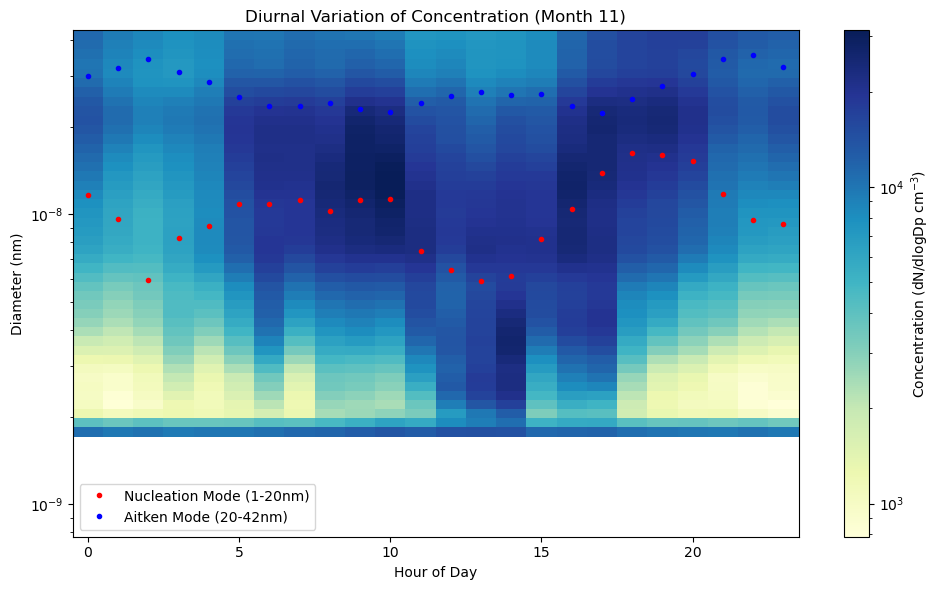

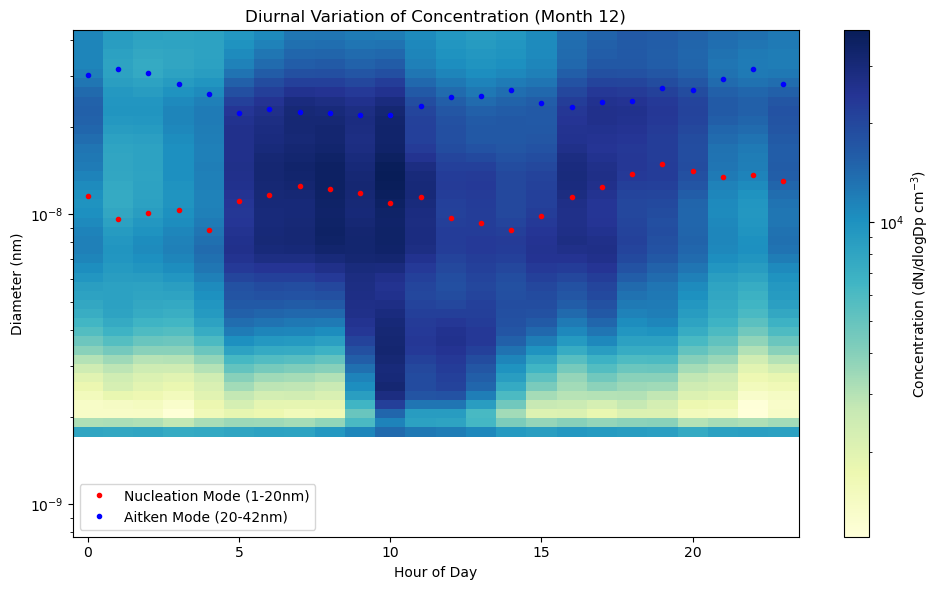

In [109]:
from matplotlib import ticker
import matplotlib.colors as colors
diameter_cols = nais_neg_particles.columns

# Loop over each month using the datetime index
for m in sorted(nais_neg_particles.index.month.unique()):
    # Filter rows for the current month using the index month
    df_month = nais_neg_particles[nais_neg_particles.index.month == m]
    # Group by hour (extracted from the index) and compute mean concentration profile
    diurnal_conc = df_month.groupby(df_month.index.hour).mean()

    hours = diurnal_conc.index.values
    diameters = diurnal_conc.columns.values.astype(float)
    conc_matrix = diurnal_conc.values  # shape: (n_hours, n_diameters)

    fig, ax = plt.subplots(figsize=(10, 6))
    c = ax.pcolormesh(hours, diameters, conc_matrix.T, norm=colors.LogNorm(), cmap='YlGnBu', shading='auto')
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
    cbar.set_label('Concentration (dN/dlogDp cm$^{-3}$)')
    
    ax.set_xlabel('Hour of Day')
    ax.set_yscale('log')
    ax.set_ylabel('Diameter (nm)')
    ax.set_title(f'Diurnal Variation of Concentration (Month {m})')
    
    # For overlay data, use similar filtering based on the datetime index:
    #nuc_month = nuc_max[nuc_max.index.month == m].groupby(nuc_max.index.hour).mean()
    # Filter for the current month
    nuc_month = nuc_max[nuc_max.index.month == m]
    # Group by the hour of the filtered index and compute the mean
    nuc_grouped = nuc_month.groupby(nuc_month.index.hour).mean()

    aitk_month = ait_max[ait_max.index.month == m]
    aitk_grouped = aitk_month.groupby(aitk_month.index.hour).mean()

    #aitk_month = ait_max[ait_max.index.month == m].groupby(ait_max.index.hour).mean()
    
    ax.plot(nuc_grouped.index, nuc_grouped['max_dim_nuc'], 'r.', label='Nucleation Mode (1-20nm)')
    ax.plot(aitk_grouped.index, aitk_grouped['max_dim_ait'], 'b.', label='Aitken Mode (20-42nm)')
    ax.legend()
    
    plt.tight_layout()
    plt.show()


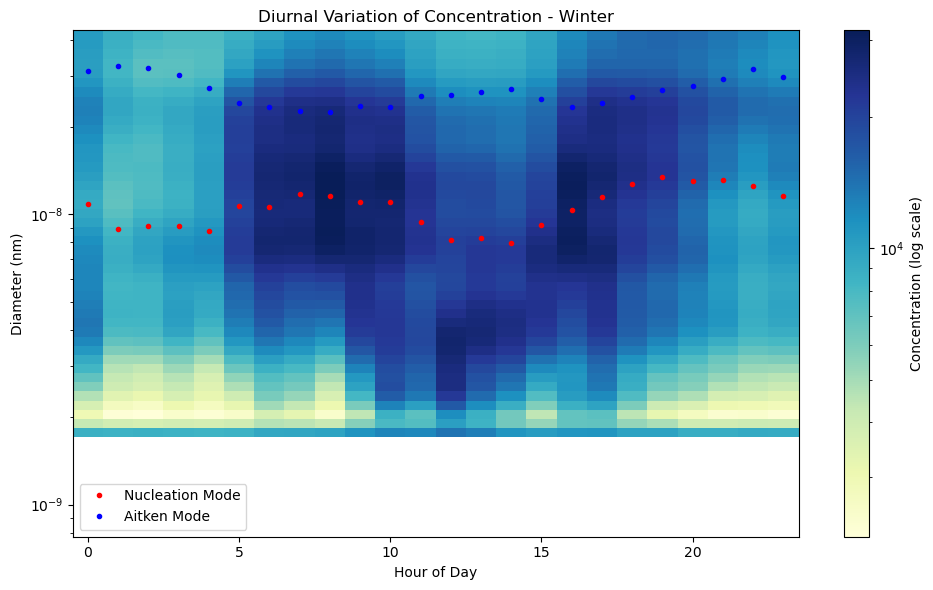

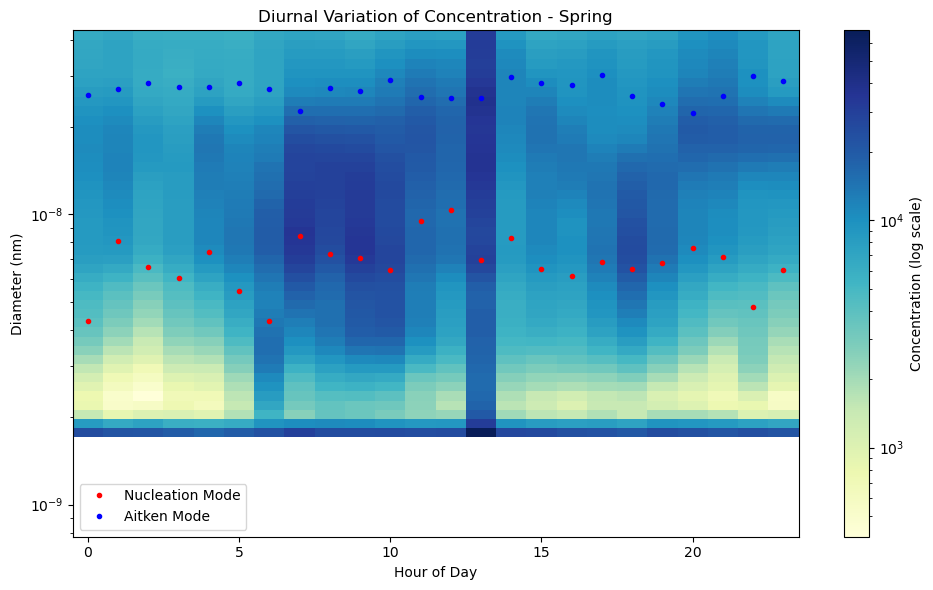

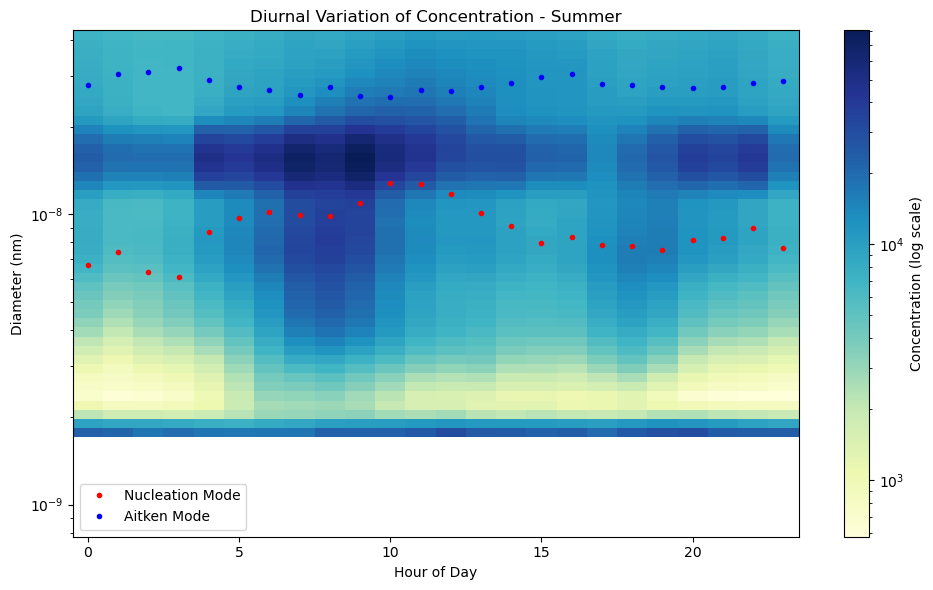

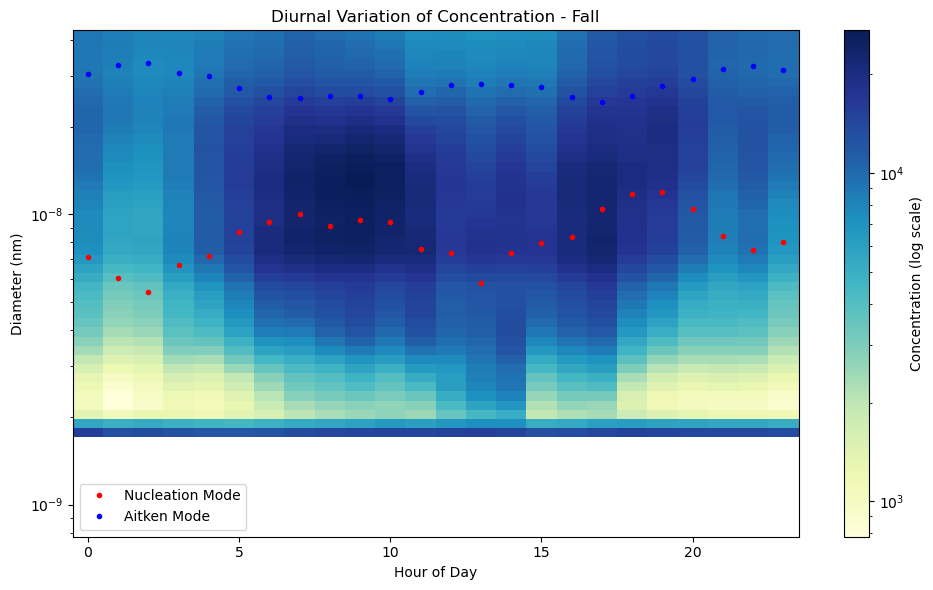

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.ticker as ticker

# Define a helper function to determine season based on month
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# List seasons in the desired order
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

for season in seasons:
    # --- Prepare the concentration data for the season without modifying nais_neg_particles ---
    mask_conc = nais_neg_particles.index.map(lambda dt: month_to_season(dt.month)) == season
    df_season = nais_neg_particles[mask_conc]
    
    # Group the filtered data by the hour extracted from the index (without adding a column)
    diurnal_conc = df_season.groupby(df_season.index.hour).mean()
    
    # Assume the remaining columns are the diameter values; filter non-numeric if needed.
    numeric_cols = diurnal_conc.columns[pd.to_numeric(diurnal_conc.columns, errors='coerce').notnull()]
    diurnal_conc = diurnal_conc[numeric_cols]
    
    # x-axis: hours (from grouping index)
    hours = diurnal_conc.index.values  
    # y-axis: diameters (converted to floats)
    diameters = numeric_cols.astype(float).values
    
    # Data matrix: rows correspond to hours and columns to diameters.
    # We need to create a grid that matches the actual x and y coordinates.
    conc_matrix = diurnal_conc.values  # shape: (n_hours, n_diameters)
    # pcolormesh expects the data shape to be (n_y-1, n_x-1) if you supply grid edges,
    # so we generate grid edges from our center coordinates.
    # Here we'll assume hours are evenly spaced so we can compute edges.
    
    # Compute hour edges (assuming hours are sorted and unique)
    hour_edges = np.concatenate(([hours[0] - (hours[1]-hours[0])/2],
                                 (hours[:-1] + hours[1:]) / 2,
                                 [hours[-1] + (hours[1]-hours[0])/2]))
    
    # For diameters, since they're likely not uniformly spaced,
    # we compute logarithmically spaced edges.
    log_diams = np.log10(diameters)
    d_edges = np.concatenate(([10**(log_diams[0] - (log_diams[1]-log_diams[0])/2)],
                               10**((log_diams[:-1] + log_diams[1:]) / 2),
                               [10**(log_diams[-1] + (log_diams[1]-log_diams[0])/2)]))
    
    # Create a meshgrid for pcolormesh edges
    X, Y = np.meshgrid(hour_edges, d_edges)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    # Use pcolormesh to display the concentration matrix
    c = ax.pcolormesh(X, Y, conc_matrix.T, norm=colors.LogNorm(), cmap=cm.YlGnBu, shading='auto')
    
    # Set the y-axis to logarithmic scale
    ax.set_yscale('log')
    
    # Add a colorbar with logarithmic ticks
    cbar = plt.colorbar(c, ax=ax, ticks=[1, 10, 100, 1000, 1e4, 1e5, 1e6])
    cbar.set_label("Concentration (log scale)")
    
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Diameter (nm)")
    ax.set_title(f"Diurnal Variation of Concentration - {season}")
    
    # --- Overlay the mode diameters for nucleation and aitken modes ---
    mask_nuc = nuc_max.index.map(lambda dt: month_to_season(dt.month)) == season
    nuc_season = nuc_max[mask_nuc]
    nuc_grouped = nuc_season.groupby(nuc_season.index.hour).mean()
    
    mask_ait = ait_max.index.map(lambda dt: month_to_season(dt.month)) == season
    ait_season = ait_max[mask_ait]
    ait_grouped = ait_season.groupby(ait_season.index.hour).mean()
    
    ax.plot(nuc_grouped.index, nuc_grouped['max_dim_nuc'], 'r.', label='Nucleation Mode')
    ax.plot(ait_grouped.index, ait_grouped['max_dim_ait'], 'b.', label='Aitken Mode')
    ax.legend()
    
    plt.tight_layout()
    plt.show()


### Nanoparticle Ranking Analysis

In [111]:
import pandas as pd
import numpy as np

def calc_bin_edges(dp):
    """
    Calculate bin edges given bin centers
    
    Parameters
    ----------
    
    dp : pandas series of lenght n
        bin center diameters

    Returns
    -------

    pandas series of lenght n+1
        log bin edges

    """
    dp_arr = dp.values
    logdp_mid = np.log10(dp_arr)
    logdp = (logdp_mid[:-1]+logdp_mid[1:])/2.0
    maxval = [logdp_mid.max()+(logdp_mid.max()-logdp.max())]
    minval = [logdp_mid.min()-(logdp.min()-logdp_mid.min())]
    logdp = np.concatenate((minval,logdp,maxval))
    
    return pd.Series(logdp)

def calc_conc_interp(df,dmin,dmax):
    """
    Calculate particle number concentration from aerosol
    number-size distribution by interpolating between bins 

    Parameters
    ----------

    df : dataframe
        Aerosol number-size distribution
    dmin : float or series of length n
        Size range lower diameter(s), unit: m
    dmax : float or series of length n
        Size range upper diameter(s), unit: m

    Returns
    -------

    dataframe
        Number concentration in the given size range(s), unit: cm-3

    """

    dmin = pd.Series(dmin)
    dmax = pd.Series(dmax)

    dp = df.columns.values.astype(float)

    # Create dense diameter grid
    dp_grid = np.logspace(np.log10(dp).min(),np.log10(dp).max(),1000)

    # Interpolate to dense diameter grid
    df_interp = df.reindex(
        dp_grid,
        axis=1,
        method="nearest",
        tolerance=dp_grid[1]-dp_grid[0]).interpolate(
            axis=1,
            limit_area="inside",
            method="linear").dropna(
                axis=1,
                how="all")

    # Update the diameter grid
    dp_grid = df_interp.columns.values.astype(float)

    # Calculate bin widths in log scale 
    dlogdp_grid = np.diff(calc_bin_edges(pd.Series(dp_grid)))

    # Transform dN/dlogDp -> dN
    dn_interp = df_interp * dlogdp_grid

    conc_df = pd.DataFrame(index = df.index, columns = np.arange(len(dmin)))

    for i in range(len(dmin)):
        dp1 = np.max([dp_grid.min(), dmin.values[i]])
        dp2 = np.min([dp_grid.max(), dmax.values[i]])
        findex = np.argwhere((dp_grid<dp2)&(dp_grid>=dp1)).flatten()
        conc = dn_interp.iloc[:,findex].sum(axis=1,min_count=1)
        conc_df.iloc[:,i] = conc

    return conc_df

In [112]:
N_2_5_5 = calc_conc_interp(nais_neg_particles, 2.5e-9, 5e-9)
N_2_5_5[N_2_5_5 < 0] = np.nan    # Set negative values to NaN
N_2_5_5.rename(columns={0: 'concentration'}, inplace=True)
N_2_5_5

concentration
time                             
2024-05-16 00:00:00           NaN
2024-05-16 01:00:00           NaN
2024-05-16 02:00:00           NaN
2024-05-16 03:00:00           NaN
2024-05-16 04:00:00           NaN
...                           ...
2025-01-31 20:00:00  10080.968792
2025-01-31 21:00:00   7406.416455
2025-01-31 22:00:00   7819.420487
2025-01-31 23:00:00     678.93696
2025-02-01 00:00:00   1051.511736

[6265 rows x 1 columns]

In [113]:
# Apply a rolling median over a 2-hour interval
# This uses the datetime index for a time-based rolling window.
N_2_5_5['smoothed'] = N_2_5_5.rolling('2h').median()
N_2_5_5

concentration     smoothed
time                                          
2024-05-16 00:00:00           NaN          NaN
2024-05-16 01:00:00           NaN          NaN
2024-05-16 02:00:00           NaN          NaN
2024-05-16 03:00:00           NaN          NaN
2024-05-16 04:00:00           NaN          NaN
...                           ...          ...
2025-01-31 20:00:00  10080.968792  9759.139919
2025-01-31 21:00:00   7406.416455  8743.692623
2025-01-31 22:00:00   7819.420487  7612.918471
2025-01-31 23:00:00     678.93696  4249.178724
2025-02-01 00:00:00   1051.511736   865.224348

[6265 rows x 2 columns]

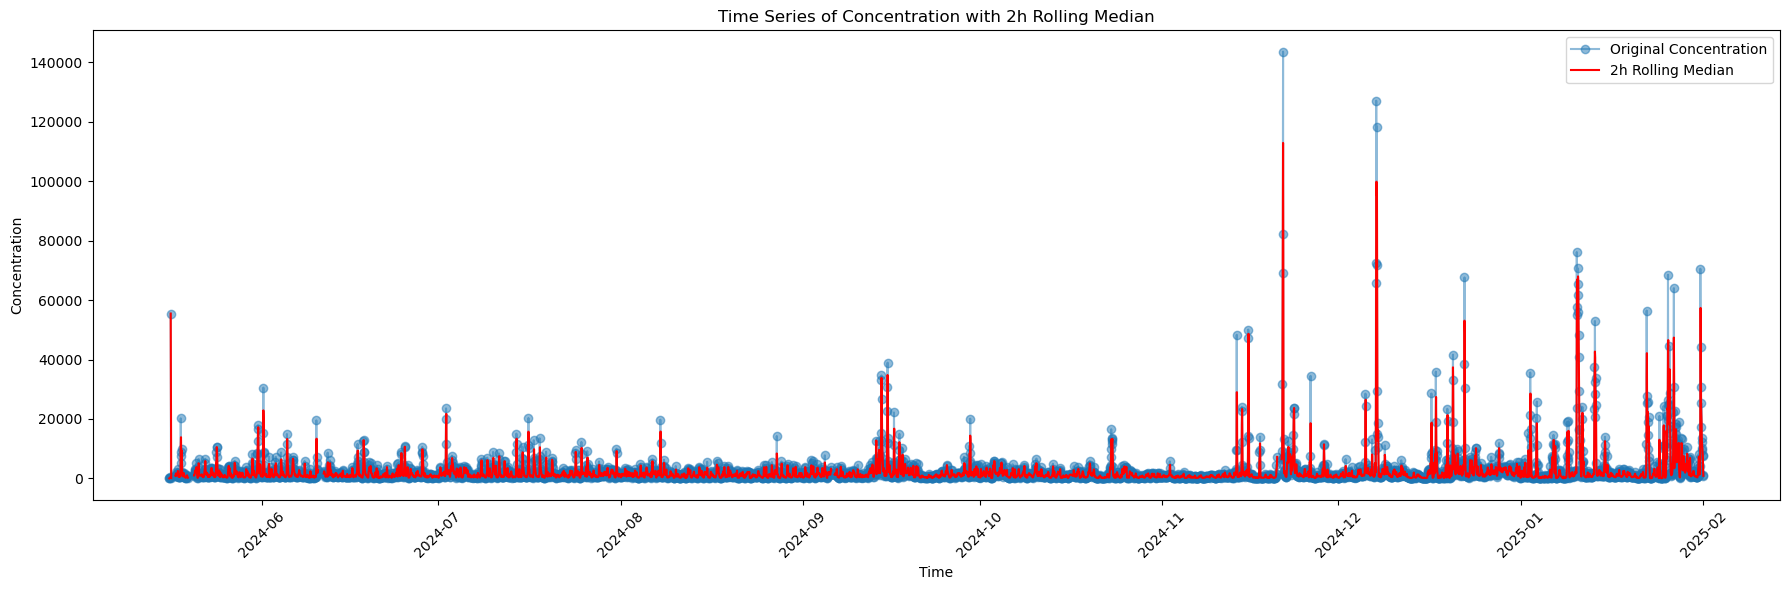

In [114]:
plt.figure(figsize=(18, 6))

# Plot the original concentration data
plt.plot(N_2_5_5.index, N_2_5_5['concentration'], marker='o', linestyle='-', 
         label='Original Concentration', alpha=0.5)

# Plot the smoothed data using a rolling median over a 2h window
plt.plot(N_2_5_5.index, N_2_5_5['smoothed'], linestyle='-', color='red', 
         label='2h Rolling Median')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Time Series of Concentration with 2h Rolling Median')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [117]:
N_2_5_5

concentration     smoothed season  hour
time                                                       
2024-05-16 00:00:00           NaN          NaN   Fall     0
2024-05-16 01:00:00           NaN          NaN   Fall     1
2024-05-16 02:00:00           NaN          NaN   Fall     2
2024-05-16 03:00:00           NaN          NaN   Fall     3
2024-05-16 04:00:00           NaN          NaN   Fall     4
...                           ...          ...    ...   ...
2025-01-31 20:00:00  10080.968792  9759.139919   Fall    20
2025-01-31 21:00:00   7406.416455  8743.692623   Fall    21
2025-01-31 22:00:00   7819.420487  7612.918471   Fall    22
2025-01-31 23:00:00     678.93696  4249.178724   Fall    23
2025-02-01 00:00:00   1051.511736   865.224348   Fall     0

[6265 rows x 4 columns]

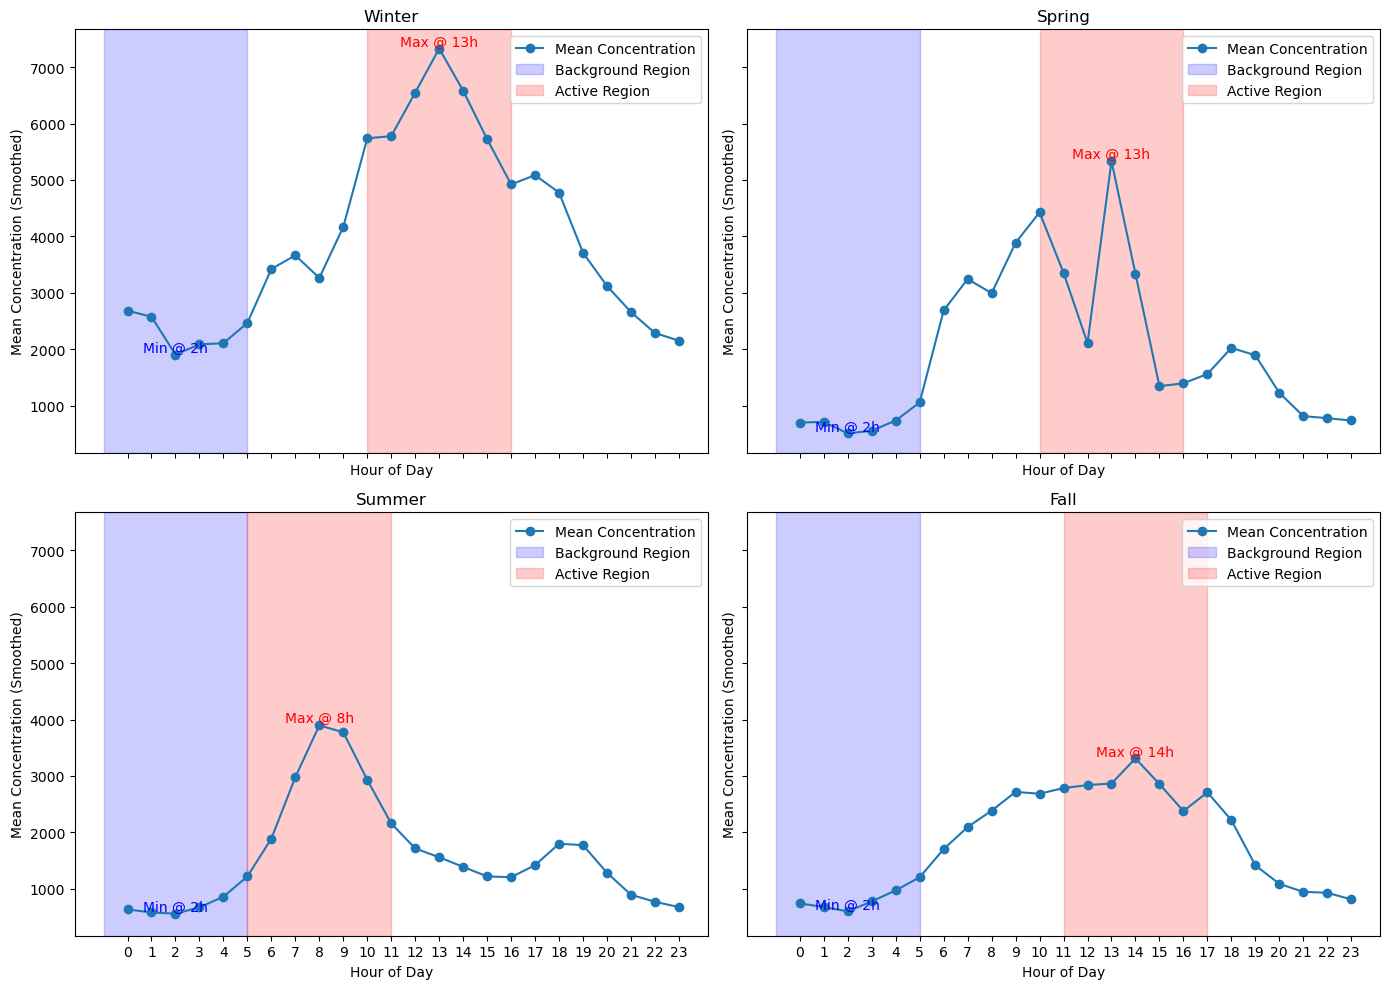

In [118]:
# --- 4. Set Up Plotting Parameters ---

# 3. Compute the diurnal cycle for each season using the original values.
#    Group by season and hour and compute the mean concentration.
# Apply the season function and extract hour of day
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'
    
N_2_5_5['season'] = N_2_5_5.index.map(get_season)
N_2_5_5['hour'] = N_2_5_5.index.hour

diurnal = N_2_5_5.groupby(['season', 'hour'])['smoothed'].mean().reset_index()

seasons_order = ['winter', 'spring', 'summer', 'fall']
window = 3 # ±1 hour window around the extreme hour

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

# --- 5. Loop Through Each Season and Plot ---
for ax, season in zip(axes, seasons_order):
    # Filter data for the current season
    season_data = diurnal[diurnal['season'] == season]
    
    if season_data.empty:
        ax.set_title(f"{season.capitalize()} (No Data)")
        continue

    # Plot the mean diurnal cycle as a line with markers.
    ax.plot(season_data['hour'], season_data['smoothed'], marker='o', linestyle='-', label='Mean Concentration')
    
    # Identify background (minimum mean) and active (maximum mean) hours.
    background_hour = season_data.loc[season_data['smoothed'].idxmin(), 'hour']
    active_hour = season_data.loc[season_data['smoothed'].idxmax(), 'hour']
    
    # Shade ±1 hour around the background and active hours.
    ax.axvspan(background_hour - window, background_hour + window, color='blue', alpha=0.2, label='Background Region')
    ax.axvspan(active_hour - window, active_hour + window, color='red', alpha=0.2, label='Active Region')
    
    # Annotate the extreme points without any vertical offset.
    bg_value = season_data.loc[season_data['hour'] == background_hour, 'smoothed'].values[0]
    act_value = season_data.loc[season_data['hour'] == active_hour, 'smoothed'].values[0]
    
    ax.annotate(f"Min @ {int(background_hour)}h", 
                xy=(background_hour, bg_value),
                xycoords='data',
                color='blue', ha='center', va='bottom')
    
    ax.annotate(f"Max @ {int(active_hour)}h", 
                xy=(active_hour, act_value),
                xycoords='data',
                color='red', ha='center', va='bottom')
    
    # Set title and labels for each subplot.
    ax.set_title(season.capitalize())
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Mean Concentration (Smoothed)')
    ax.set_xticks(range(0, 24))
    ax.legend()

plt.tight_layout()
plt.show()


Winter season:
  Background hour: 2, window: [0, 1, 2, 3, 4, 5, 23]
  Active hour: 13, window: [10, 11, 12, 13, 14, 15, 16]

Spring season:
  Background hour: 2, window: [0, 1, 2, 3, 4, 5, 23]
  Active hour: 13, window: [10, 11, 12, 13, 14, 15, 16]

Summer season:
  Background hour: 2, window: [0, 1, 2, 3, 4, 5, 23]
  Active hour: 8, window: [5, 6, 7, 8, 9, 10, 11]

Fall season:
  Background hour: 2, window: [0, 1, 2, 3, 4, 5, 23]
  Active hour: 14, window: [11, 12, 13, 14, 15, 16, 17]

Daily Background (N_B) and Active (N_A) Concentrations:
        date  season          N_B           N_A
0 2024-05-16  spring          NaN  55464.064999
1 2024-05-17  spring   506.999044   1675.773555
2 2024-05-18  spring   880.237580   9315.303695
3 2024-05-19  spring   346.060757    322.175231
4 2024-05-20  spring  3482.836234   2488.202653


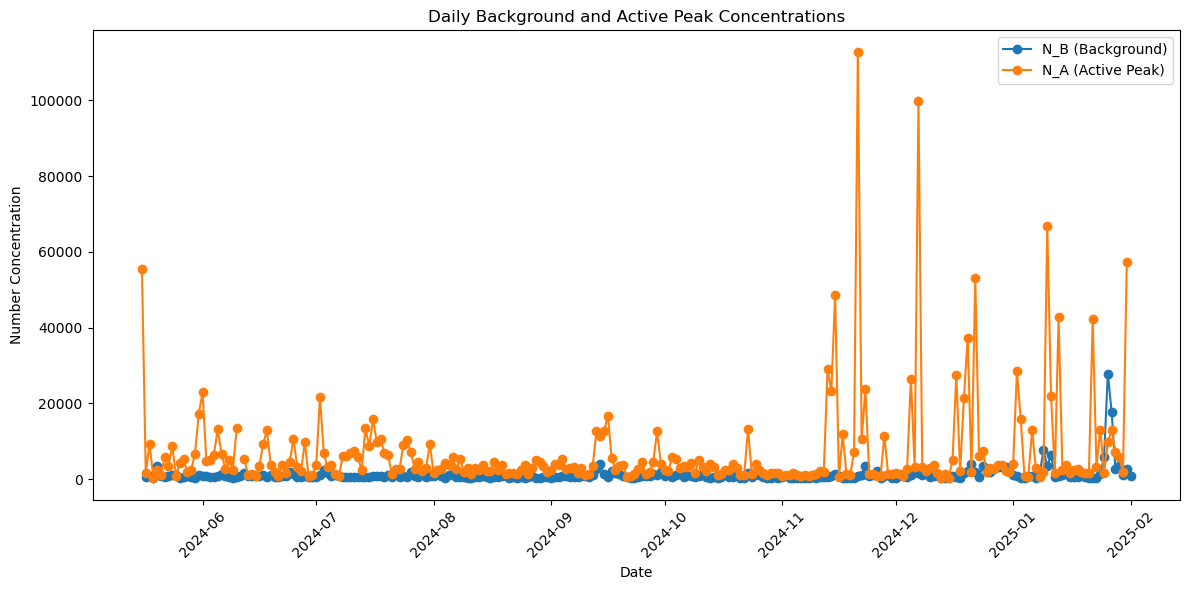

In [119]:

# === 3. Compute the Median Diurnal Cycle per Season ===
# Group by season and hour to compute the mean smoothed.
diurnal = N_2_5_5.groupby(['season', 'hour'])['smoothed'].mean().reset_index()

# Define a window (in hours) around the extreme hour.
window = 3  # ±1 hour

# For each season, identify the extreme hours and the window ranges.
seasons_order = ['winter', 'spring', 'summer', 'fall']
seasons_info = {}

for season in seasons_order:
    season_diurnal = diurnal[diurnal['season'] == season]
    if season_diurnal.empty:
        continue
    # Identify the hour (0-23) where the mean is minimum (background) and maximum (active)
    bg_hour = season_diurnal.loc[season_diurnal['smoothed'].idxmin(), 'hour']
    active_hour = season_diurnal.loc[season_diurnal['smoothed'].idxmax(), 'hour']
    # Create sets of hours for the background and active windows.
    # We use modulo 24 in case the window crosses midnight.
    bg_hours_set = {(bg_hour + h) % 24 for h in range(-window, window + 1)}
    active_hours_set = {(active_hour + h) % 24 for h in range(-window, window + 1)}
    seasons_info[season] = {
        'bg_hour': bg_hour,
        'active_hour': active_hour,
        'bg_hours_set': bg_hours_set,
        'active_hours_set': active_hours_set
    }
    
    # (Optional) Print the identified hours for debugging:
    print(f"{season.capitalize()} season:")
    print(f"  Background hour: {bg_hour}, window: {sorted(bg_hours_set)}")
    print(f"  Active hour: {active_hour}, window: {sorted(active_hours_set)}\n")

# === 4. Compute Daily N_B and N_A ===
# Create a new column for the date.
N_2_5_5['date'] = N_2_5_5.index.date

# Prepare a list to collect daily results.
daily_results = []

# Group the data by date.
for date, group in N_2_5_5.groupby('date'):
    # All rows in a day should belong to the same season (based on month)
    season = group['season'].iloc[0]
    # Get the background/active window info for this season.
    info = seasons_info.get(season, None)
    if info is None:
        # If no diurnal info is available for this season, skip this day.
        continue

    # For background (N_B): take the mean of concentrations when the hour is in the background window.
    bg_data = group[group['hour'].isin(info['bg_hours_set'])]['smoothed']
    N_B = bg_data.mean() if not bg_data.empty else np.nan

    # For active (N_A): take the maximum of concentrations when the hour is in the active window.
    active_data = group[group['hour'].isin(info['active_hours_set'])]['smoothed']
    N_A = active_data.max() if not active_data.empty else np.nan

    daily_results.append({'date': date, 'season': season, 'N_B': N_B, 'N_A': N_A})

# Create a DataFrame with the daily background and active concentrations.
daily_results_df = pd.DataFrame(daily_results)
daily_results_df['date'] = pd.to_datetime(daily_results_df['date'])  # Convert back to datetime if desired

print("Daily Background (N_B) and Active (N_A) Concentrations:")
print(daily_results_df.head())

# === 5. (Optional) Plot the Daily N_B and N_A Values ===
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_results_df['date'], daily_results_df['N_B'], marker='o', linestyle='-', label='N_B (Background)')
ax.plot(daily_results_df['date'], daily_results_df['N_A'], marker='o', linestyle='-', label='N_A (Active Peak)')
ax.set_xlabel('Date')
ax.set_ylabel('Number Concentration')
ax.set_title('Daily Background and Active Peak Concentrations')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [120]:
daily_results_df

date  season          N_B           N_A
0   2024-05-16  spring          NaN  55464.064999
1   2024-05-17  spring   506.999044   1675.773555
2   2024-05-18  spring   880.237580   9315.303695
3   2024-05-19  spring   346.060757    322.175231
4   2024-05-20  spring  3482.836234   2488.202653
..         ...     ...          ...           ...
257 2025-01-28  winter  2613.776005   7056.940493
258 2025-01-29  winter  3420.195697   5833.552533
259 2025-01-30  winter  1112.437796   1736.405048
260 2025-01-31  winter  2724.950806  57361.517851
261 2025-02-01  winter   865.224348           NaN

[262 rows x 4 columns]

In [121]:
# Calculate the difference for each day
daily_results_df['N_diff'] = daily_results_df['N_A'] - daily_results_df['N_B']

daily_results_df


date  season          N_B           N_A        N_diff
0   2024-05-16  spring          NaN  55464.064999           NaN
1   2024-05-17  spring   506.999044   1675.773555   1168.774511
2   2024-05-18  spring   880.237580   9315.303695   8435.066115
3   2024-05-19  spring   346.060757    322.175231    -23.885526
4   2024-05-20  spring  3482.836234   2488.202653   -994.633581
..         ...     ...          ...           ...           ...
257 2025-01-28  winter  2613.776005   7056.940493   4443.164488
258 2025-01-29  winter  3420.195697   5833.552533   2413.356835
259 2025-01-30  winter  1112.437796   1736.405048    623.967252
260 2025-01-31  winter  2724.950806  57361.517851  54636.567045
261 2025-02-01  winter   865.224348           NaN           NaN

[262 rows x 5 columns]

Daily differences with quantile ranking:
        date       N_diff diff_quantile
0 2024-05-16          NaN           NaN
1 2024-05-17  1168.774511        30-35%
2 2024-05-18  8435.066115        80-85%
3 2024-05-19   -23.885526         5-10%
4 2024-05-20  -994.633581          0-5%


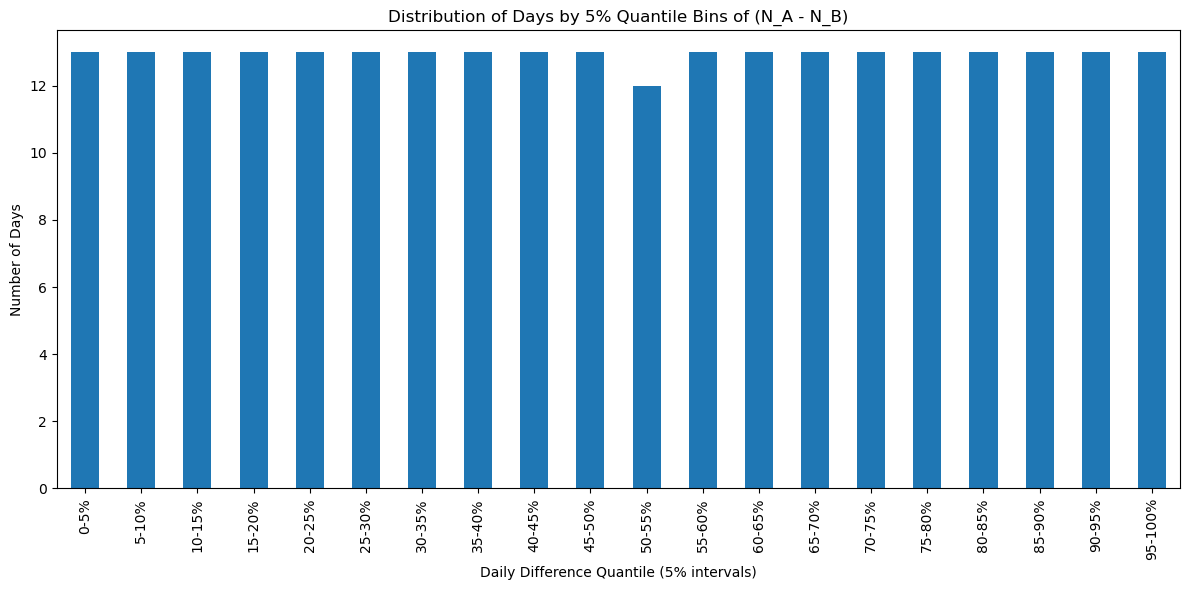

In [122]:
# Create labels for each bin (e.g., "0-5%", "5-10%", ..., "95-100%")
labels = [f"{i*5}-{(i+1)*5}%" for i in range(20)]
daily_results_df['diff_quantile'] = pd.qcut(daily_results_df['N_diff'], q=20, labels=labels)

# Check the first few rows to verify the ranking:
print("Daily differences with quantile ranking:")
print(daily_results_df[['date', 'N_diff', 'diff_quantile']].head())

# --- 2. (Optional) Plot a Histogram of the Ranked Days ---
plt.figure(figsize=(12, 6))
daily_results_df['diff_quantile'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Daily Difference Quantile (5% intervals)')
plt.ylabel('Number of Days')
plt.title('Distribution of Days by 5% Quantile Bins of (N_A - N_B)')
plt.tight_layout()
plt.show()

In [123]:
# Function to return the median day for a given quantile group
def get_median_day(group):
    # Calculate the median N_diff value for this quantile group
    median_val = group['N_diff'].median()
    # Find the index of the row where N_diff is closest to the median
    idx = (group['N_diff'] - median_val).abs().idxmin()
    return group.loc[idx]

# Group by the quantile and apply the function to get one representative median day per group
median_days = daily_results_df.groupby('diff_quantile').apply(get_median_day).reset_index(drop=True)

# Display the median day per quantile group (showing date, quantile, and N_diff)
print("Median day for each 5% quantile group:")
print(median_days[['date', 'diff_quantile', 'N_diff']])


Median day for each 5% quantile group:
         date diff_quantile        N_diff
0  2024-11-26          0-5%  -1209.321487
1  2024-12-13         5-10%     75.517504
2  2024-12-12        10-15%    367.797141
3  2024-10-02        15-20%    544.418652
4  2024-10-28        20-25%    716.314911
5  2024-12-06        25-30%    917.584578
6  2024-10-31        30-35%   1108.778031
7  2024-12-01        35-40%   1293.955374
8  2024-09-05        40-45%   1675.158904
9  2024-08-18        45-50%   1954.070184
10 2024-06-09        50-55%   2116.773689
11 2025-01-07        55-60%   2634.095543
12 2024-10-06        60-65%   2995.272978
13 2024-10-19        65-70%   3577.912757
14 2024-10-10        70-75%   4437.308014
15 2024-07-20        75-80%   5248.977582
16 2024-07-15        80-85%   8133.829277
17 2024-09-15        85-90%  11381.954823
18 2024-09-16        90-95%  16125.859677
19 2025-01-13       95-100%  41986.952427


/tmp/ipykernel_5799/4008519197.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_days = daily_results_df.groupby('diff_quantile').apply(get_median_day).reset_index(drop=True)


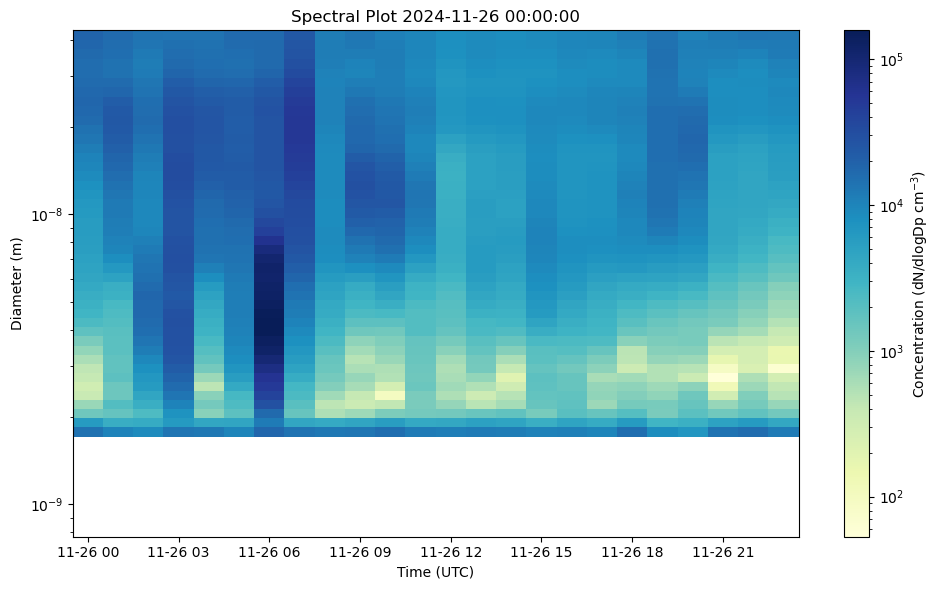

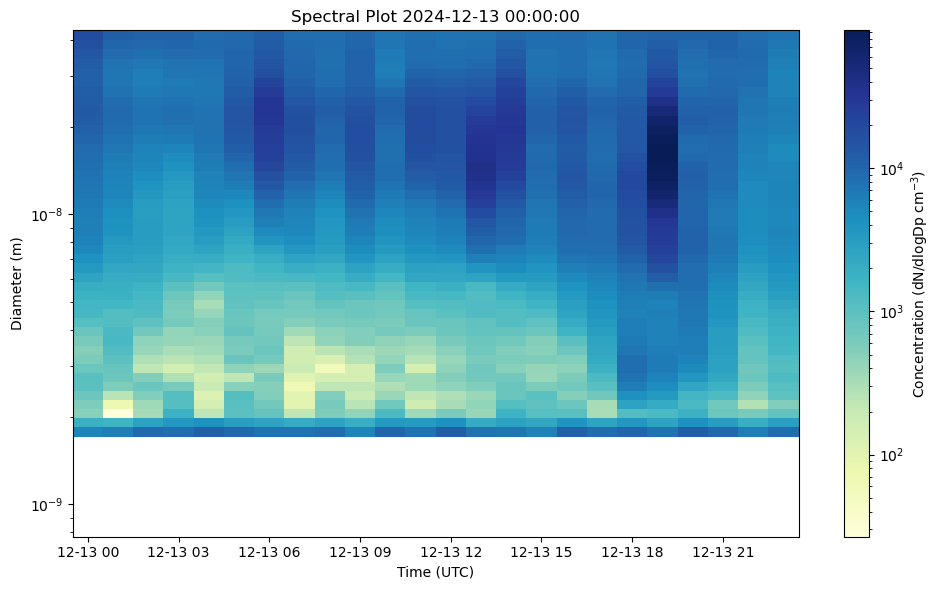

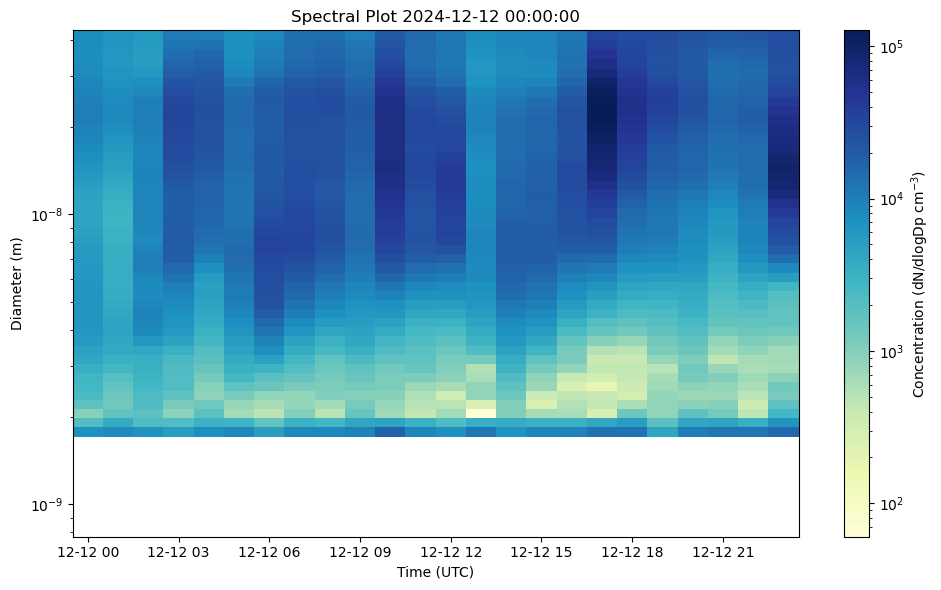

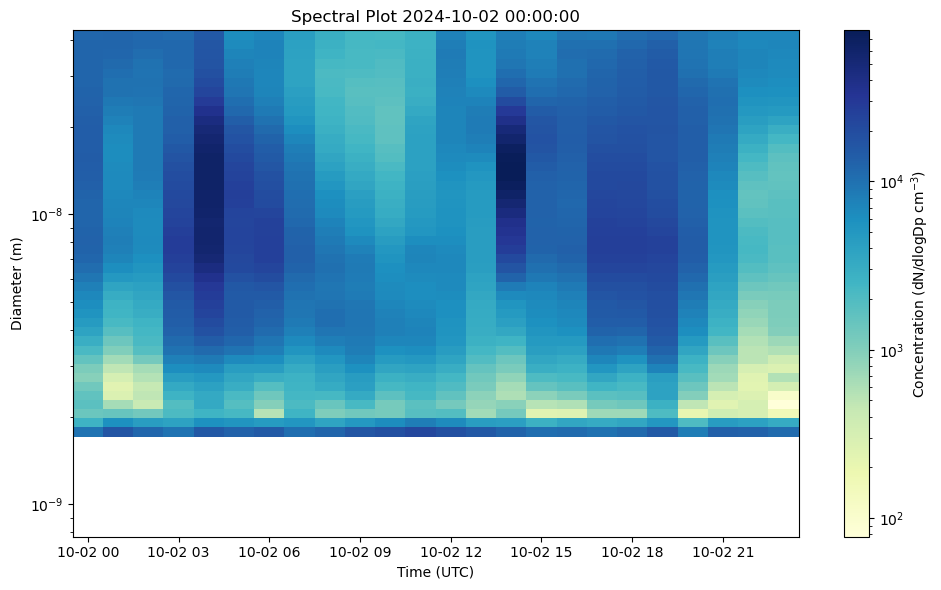

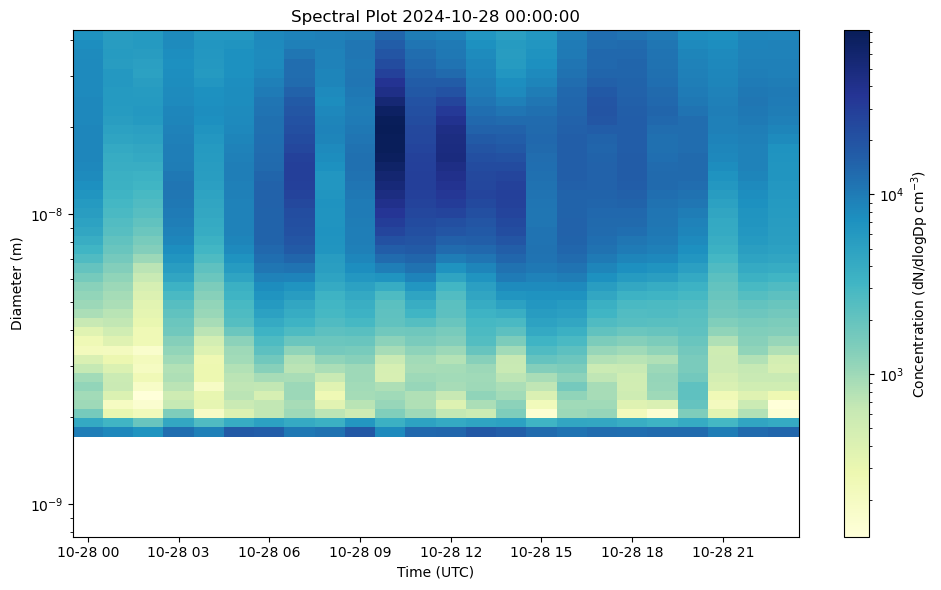

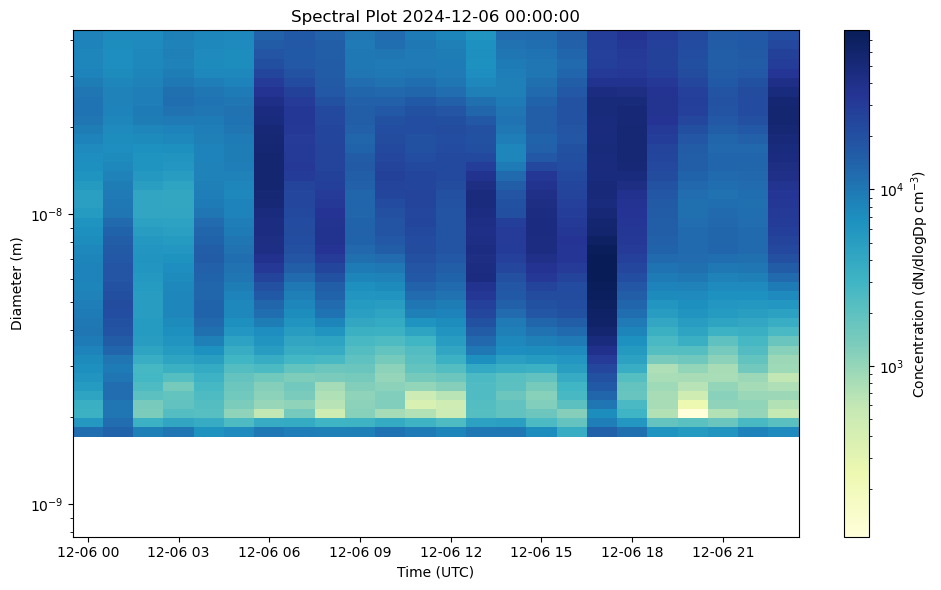

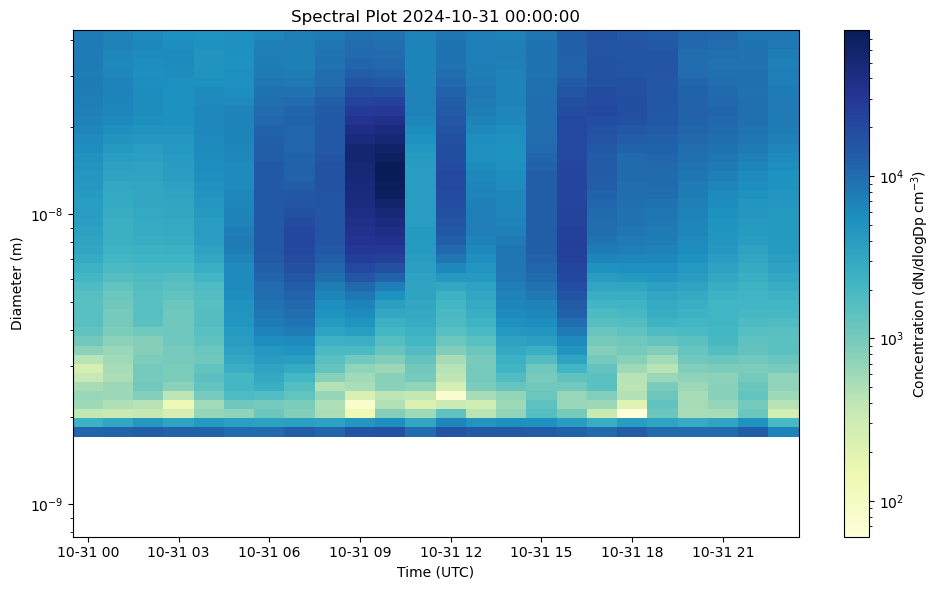

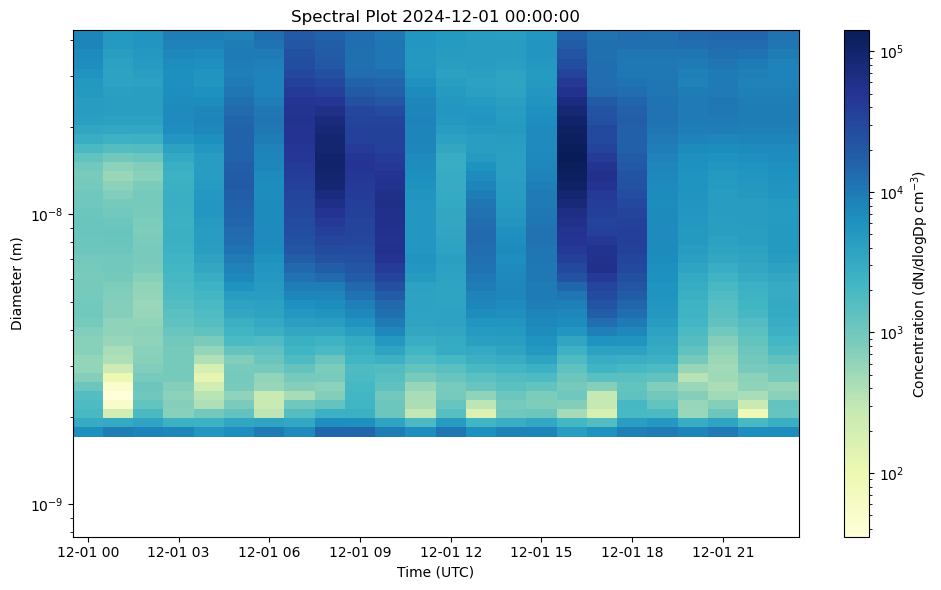

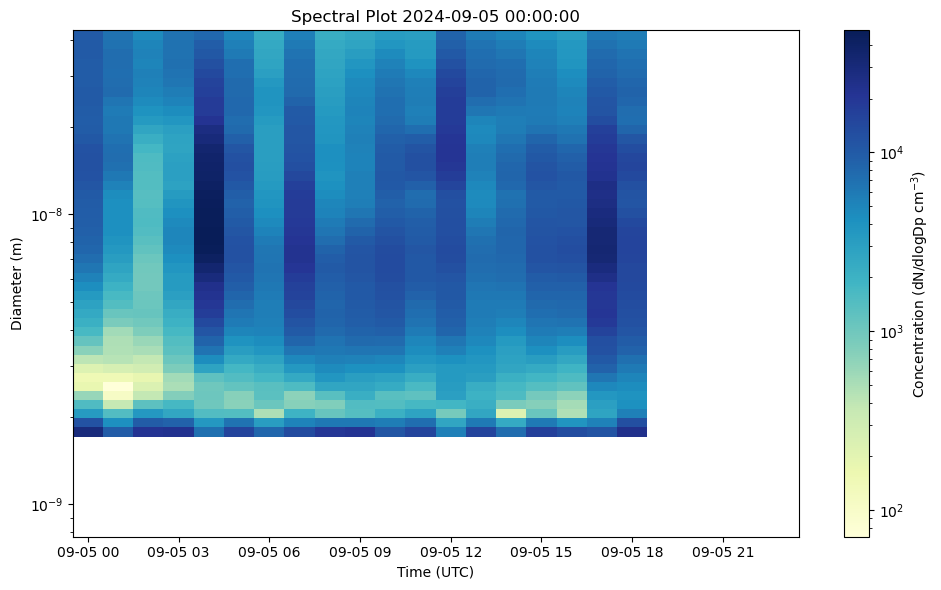

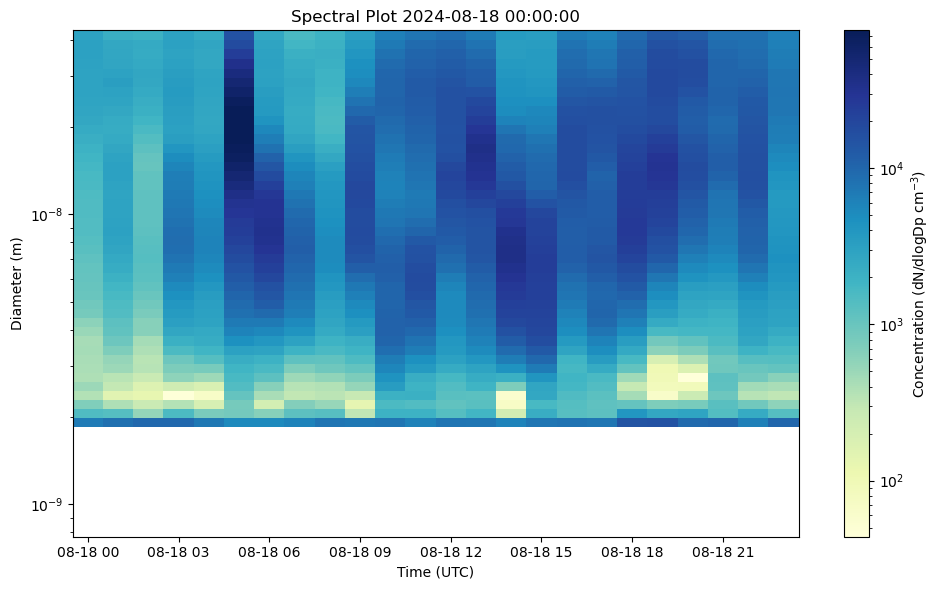

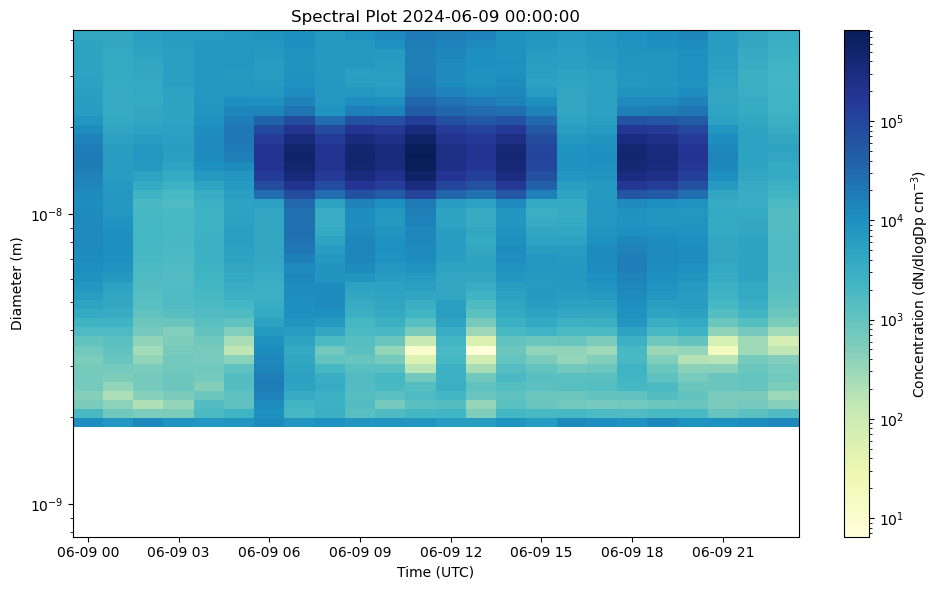

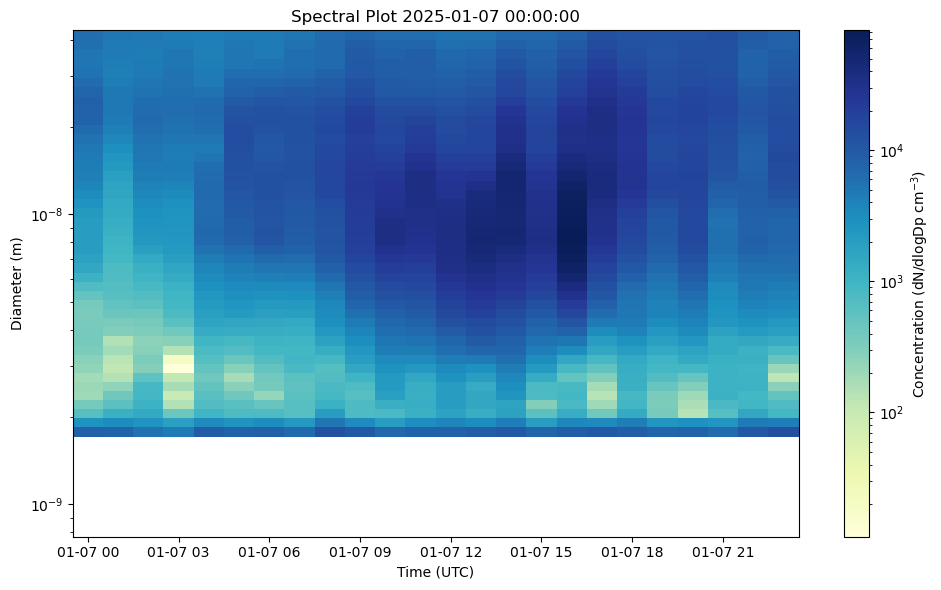

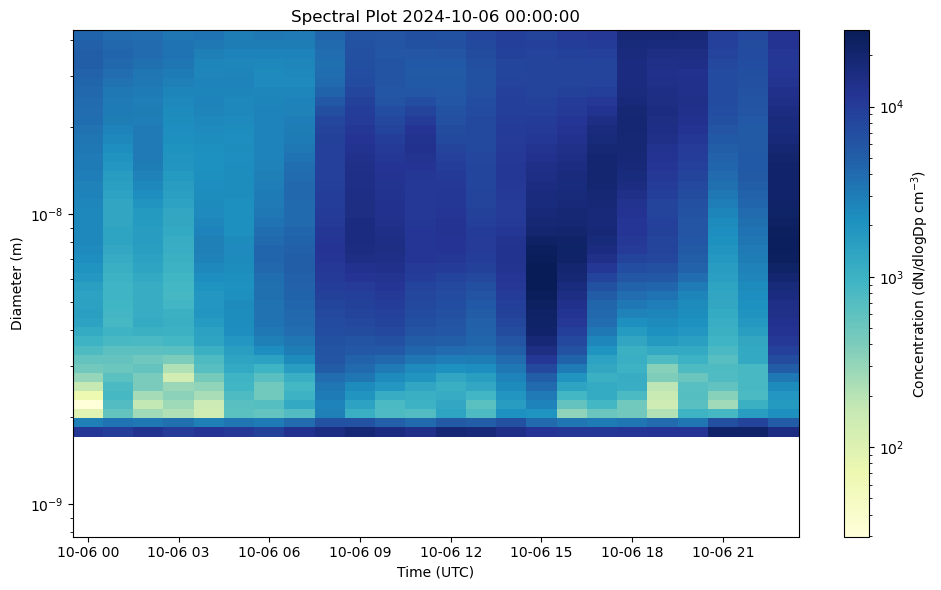

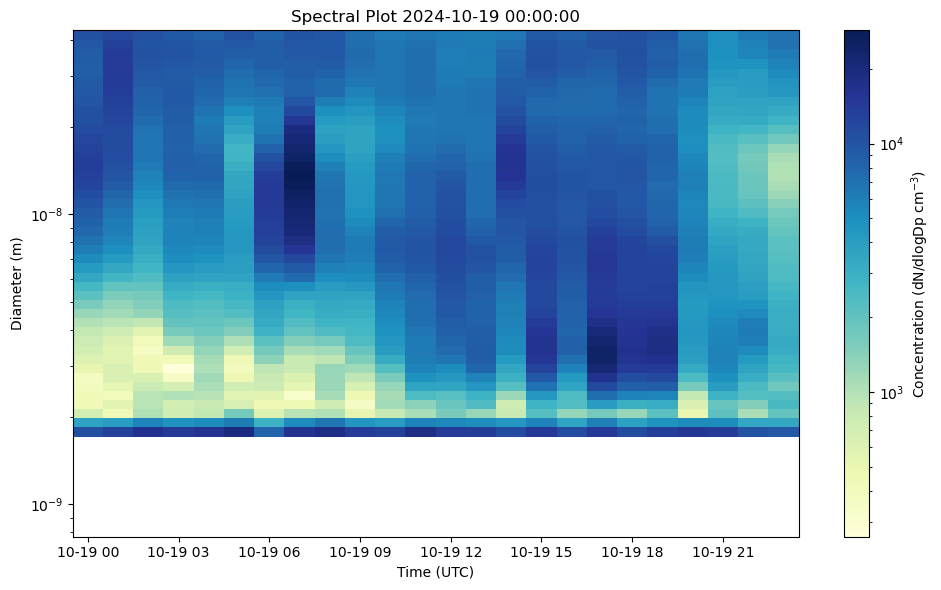

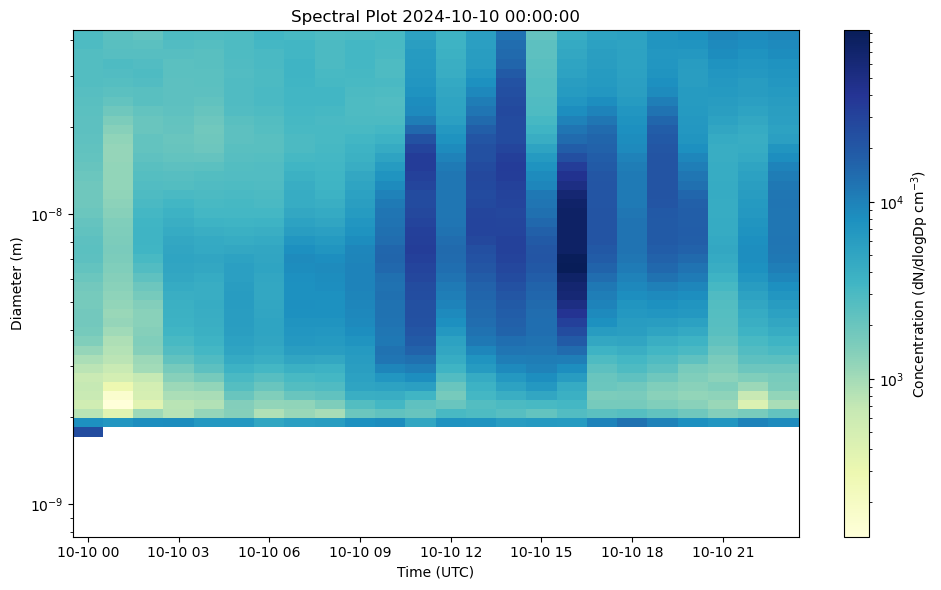

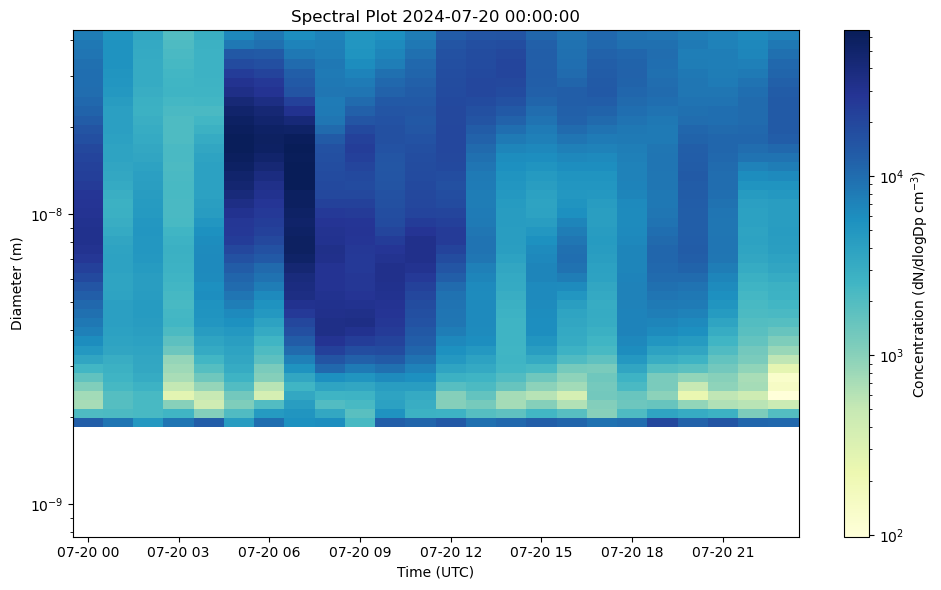

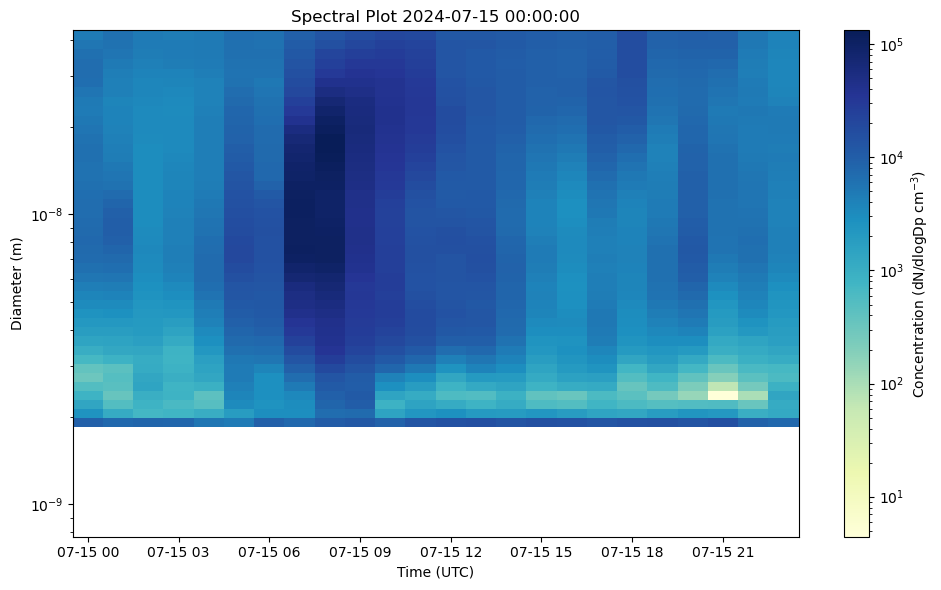

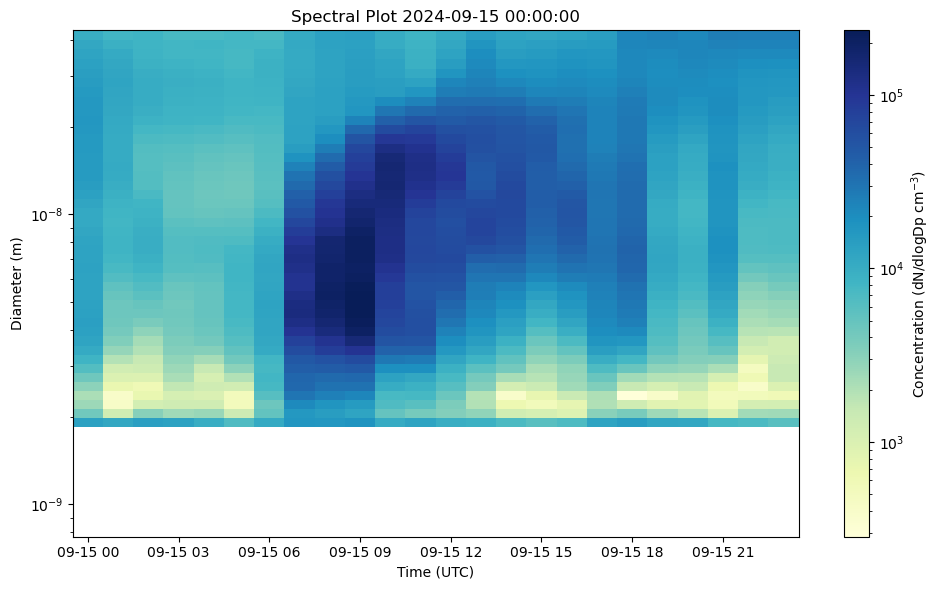

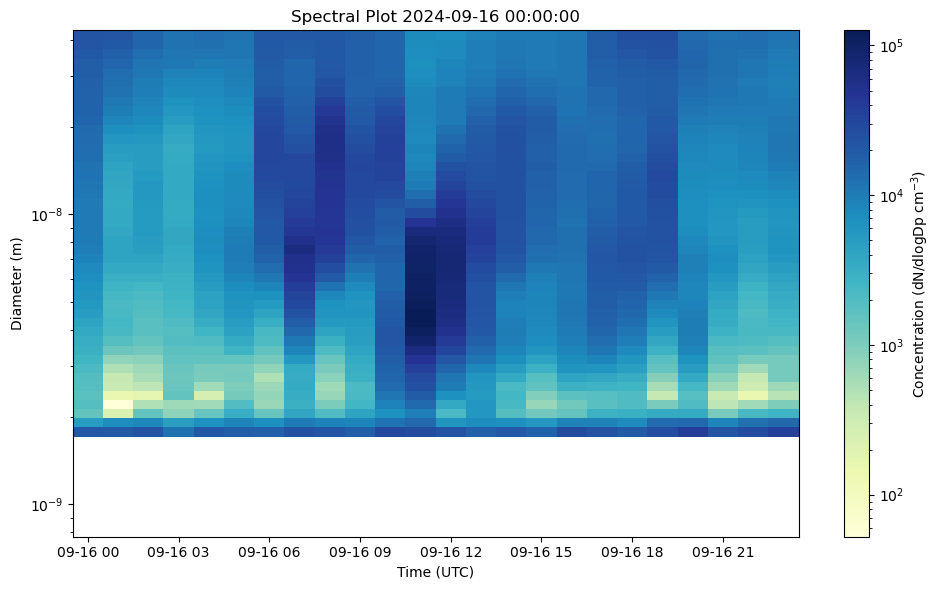

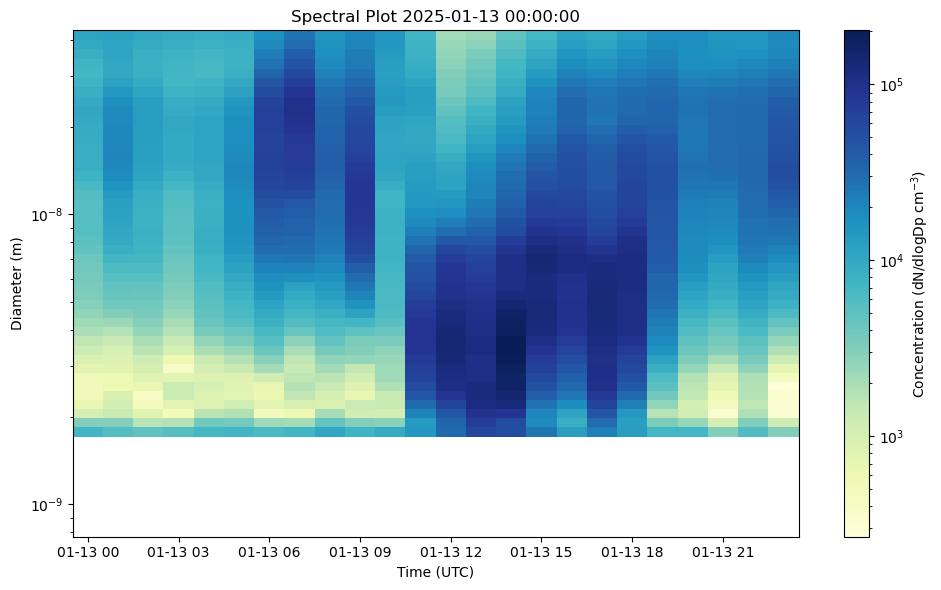

In [138]:
# Loop over each month using the datetime index
for day in median_days['date']:
    # Filter rows for the current month using the index month
    df = nais_neg_particles[nais_neg_particles.index.normalize() == day]

    time = df.index.values
    diameters = df.columns.values.astype(float)
    conc_matrix = df.values 

    fig, ax = plt.subplots(figsize=(10, 6))
    c = ax.pcolormesh(time, diameters, conc_matrix.T, norm=colors.LogNorm(), cmap='YlGnBu', shading='auto')
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
    cbar.set_label('Concentration (dN/dlogDp cm$^{-3}$)')
    
    ax.set_xlabel('Time (UTC)')
    #ax.xticks(rotation=45)
    ax.set_yscale('log')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(f'Spectral Plot {day}')
    
    plt.tight_layout()
    plt.show()


In [184]:
from numpy import ma
from matplotlib import ticker, cm
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    #masked_data = np.ma.masked_less(var, 0) #has error message
    masked_data = ma.masked_where(var <= 0, var)
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T,levels=np.arange(1,var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('dN/dlogDp (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time (UTC)')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)
    #plt.xticks(rotation=45)


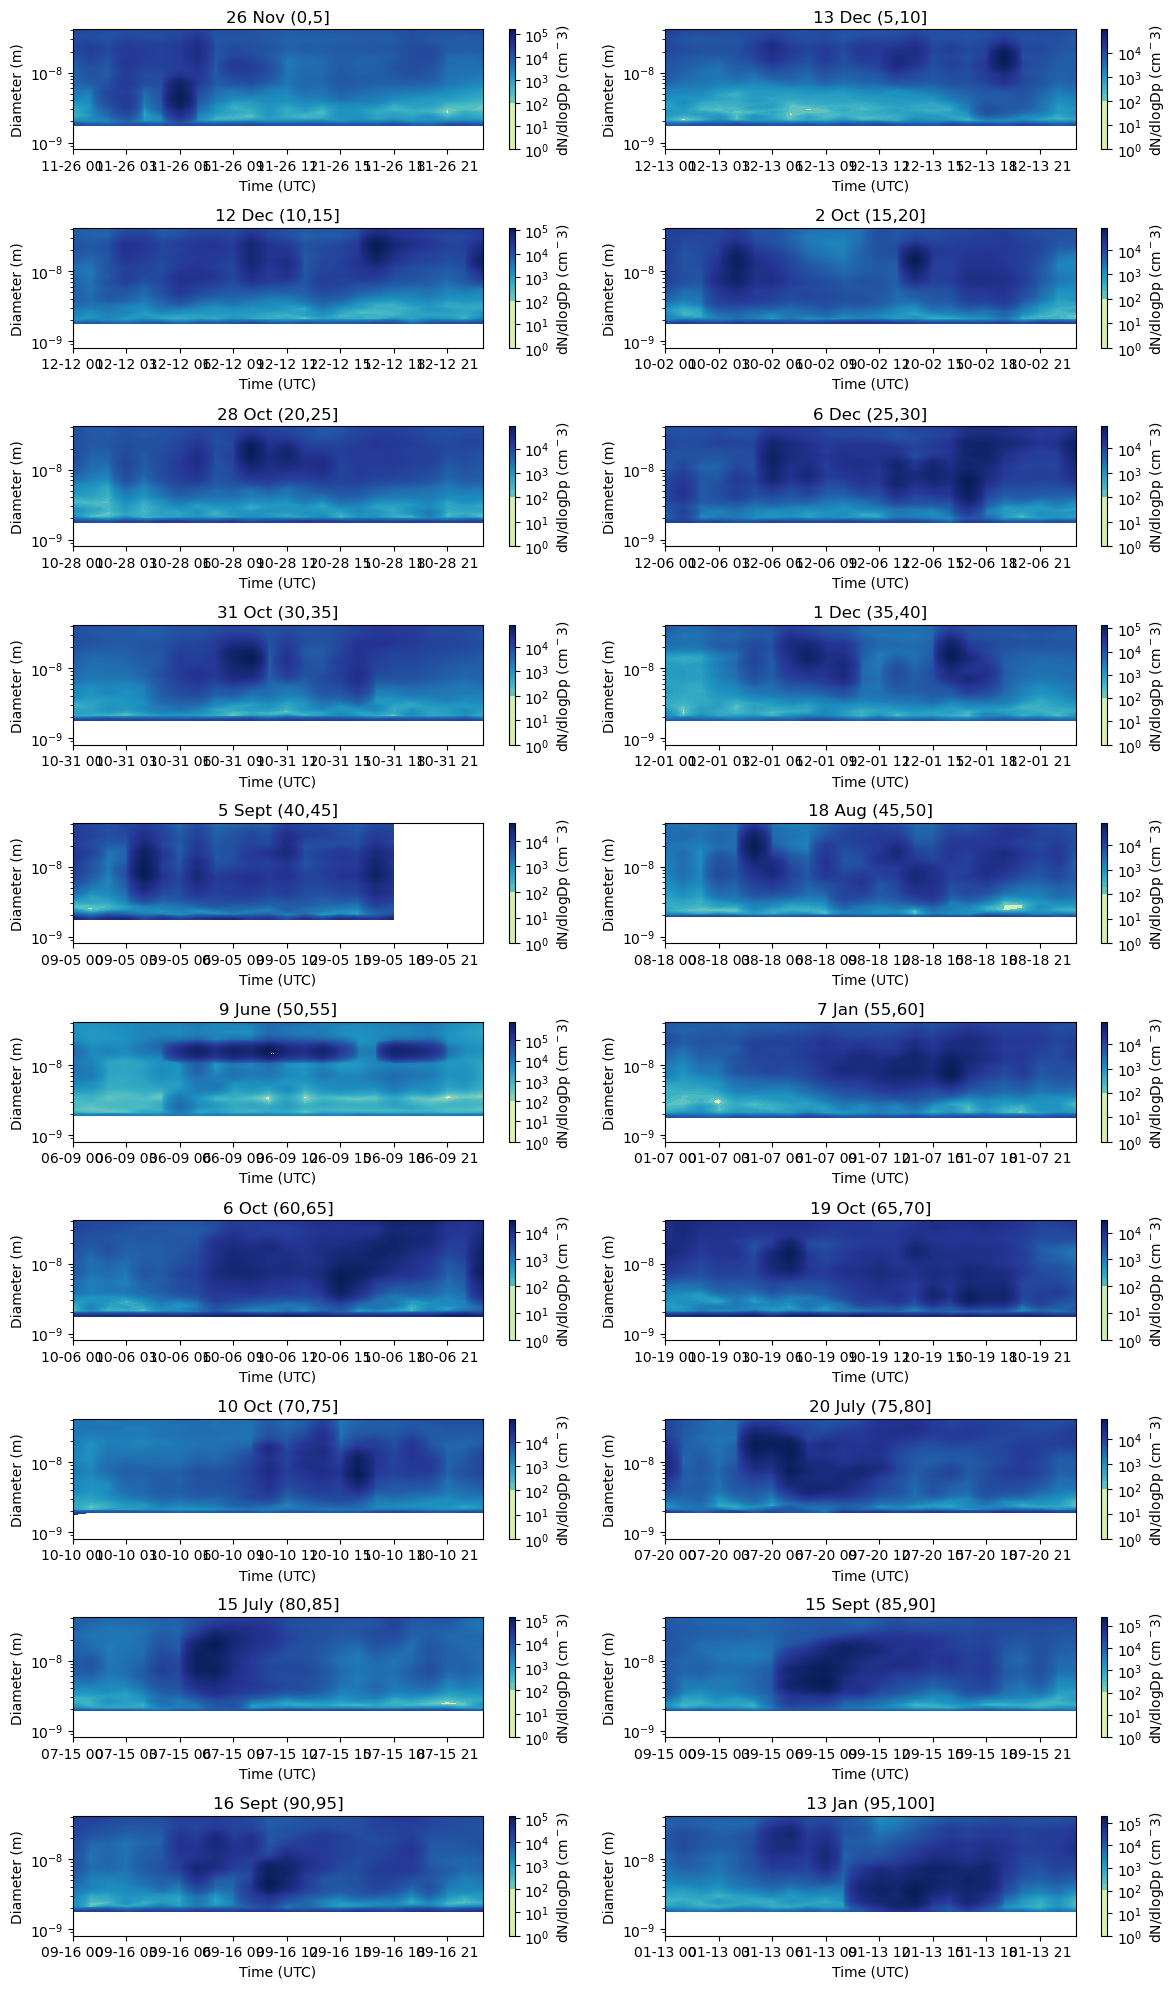

In [144]:
# Set up the plots
fig, axs = plt.subplots(10, 2, figsize=(12, 20))
axs = axs.ravel()

plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-11-26','2024-11-26')), '26 Nov (0,5]', axs[0])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-12-13','2024-12-13')), '13 Dec (5,10]', axs[1])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-12-12','2024-12-12')), '12 Dec (10,15]', axs[2])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-10-02','2024-10-02')), '2 Oct (15,20]', axs[3])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-10-28','2024-10-28')), '28 Oct (20,25]', axs[4])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-12-06','2024-12-06')), '6 Dec (25,30]', axs[5])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-10-31','2024-10-31')), '31 Oct (30,35]', axs[6])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-12-01','2024-12-01')), '1 Dec (35,40]', axs[7])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-09-05','2024-09-05')), '5 Sept (40,45]', axs[8])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-08-18','2024-08-18')), '18 Aug (45,50]', axs[9])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-06-09','2024-06-09')), '9 June (50,55]', axs[10])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2025-01-07','2025-01-07')), '7 Jan (55,60]', axs[11])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-10-06','2024-10-06')), '6 Oct (60,65]', axs[12])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-10-19','2024-10-19')), '19 Oct (65,70]', axs[13])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-10-10','2024-10-10')), '10 Oct (70,75]', axs[14])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-07-20','2024-07-20')), '20 July (75,80]', axs[15])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-07-15','2024-07-15')), '15 July (80,85]', axs[16])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-09-15','2024-09-15')), '15 Sept (85,90]', axs[17])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-09-16','2024-09-16')), '16 Sept (90,95]', axs[18])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2025-01-13','2025-01-13')), '13 Jan (95,100]', axs[19])

plt.tight_layout()
plt.show()

#### Complementary data

In [145]:
met_data = pd.read_csv('/home/coliewo/Documents/Data Analysis/NPF/Data/Met/met_jan_dec.csv')
met_data['datetime'] = pd.to_datetime(met_data['date'] + ' ' + met_data['time'])
met_data.drop(['date', 'time'], axis=1, inplace=True)  # drop date and time columns
met_data.index = met_data['datetime']
met_data

day_dec  WD_min[Deg]  WD_ave[Deg]  WD_max[Deg]  \
datetime                                                                 
2024-01-01 00:00:00    0.000000        252.0        224.5        218.0   
2024-01-01 00:01:00    0.000694        273.0        232.9        222.0   
2024-01-01 00:02:00    0.001389        185.0        243.0        227.0   
2024-01-01 00:03:00    0.002083        337.0        236.1        243.0   
2024-01-01 00:04:00    0.002778        248.0        233.8        224.0   
...                         ...          ...          ...          ...   
2024-12-31 23:55:00  365.996528        225.0        244.2        302.0   
2024-12-31 23:56:00  365.997222        221.0        205.2         39.0   
2024-12-31 23:57:00  365.997917        186.0        223.3        326.0   
2024-12-31 23:58:00  365.998611        245.0        233.8        320.0   
2024-12-31 23:59:00  365.999306        237.0        229.3        243.0   

                     WS_min[m/s]  WS_ave[m/s]  WS_max[m/s]  T_air[C]  \
datetime                                                               
2024-01-01 00:00:00          0.9          3.2          5.1       8.8   
2024-01-01 00:01:00          0.6          1.7          3.4       8.8   
2024-01-01 00:02:00          0.7          3.1          6.5       8.8   
2024-01-01 00:03:00          1.1          4.0          7.2       8.8   
2024-01-01 00:04:00          1.5          3.4          5.8       8.8   
...                          ...          ...          ...       ...   
2024-12-31 23:55:00          0.6          1.2          1.8       4.6   
2024-12-31 23:56:00          0.3          1.0          1.9       4.6   
2024-12-31 23:57:00          0.4          1.0          2.1       4.7   
2024-12-31 23:58:00          0.5          0.9          1.4       4.7   
2024-12-31 23:59:00          0.8          1.3          1.5       4.8   

                     T_internal[C]  RH[%%]  ...  Hail_acc[hits/cm2]  \
datetime                                    ...                       
2024-01-01 00:00:00            8.9    87.8  ...                 0.0   
2024-01-01 00:01:00            8.9    87.8  ...                 0.0   
2024-01-01 00:02:00            8.9    87.8  ...                 0.0   
2024-01-01 00:03:00            8.9    87.8  ...                 0.0   
2024-01-01 00:04:00            8.9    87.8  ...                 0.0   
...                            ...     ...  ...                 ...   
2024-12-31 23:55:00            4.6    75.5  ...                 0.0   
2024-12-31 23:56:00            4.6    75.5  ...                 0.0   
2024-12-31 23:57:00            4.6    75.6  ...                 0.0   
2024-12-31 23:58:00            4.7    75.0  ...                 0.0   
2024-12-31 23:59:00            4.7    75.2  ...                 0.0   

                     Hail_duration[s]  Hail_intensity[hits/cm2]  \
datetime                                                          
2024-01-01 00:00:00               0.0                       0.0   
2024-01-01 00:01:00               0.0                       0.0   
2024-01-01 00:02:00               0.0                       0.0   
2024-01-01 00:03:00               0.0                       0.0   
2024-01-01 00:04:00               0.0                       0.0   
...                               ...                       ...   
2024-12-31 23:55:00               0.0                       0.0   
2024-12-31 23:56:00               0.0                       0.0   
2024-12-31 23:57:00               0.0                       0.0   
2024-12-31 23:58:00               0.0                       0.0   
2024-12-31 23:59:00               0.0                       0.0   

                     Rain_peak_int[mm/h]  Hail_peak_int[hits/cm2]  T_heat[C]  \
datetime                                                                       
2024-01-01 00:00:00                 86.0                      6.0        7.7   
2024-01-01 00:01:00                 86.0                      6.0        7.9   
2024-01-

In [146]:
met_data = met_data.resample('1h').mean()

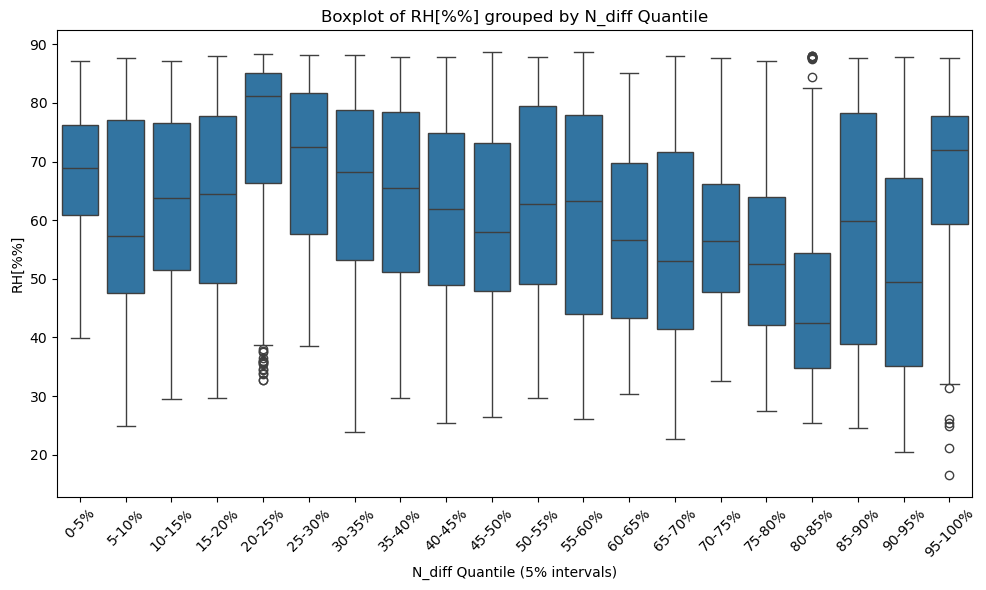

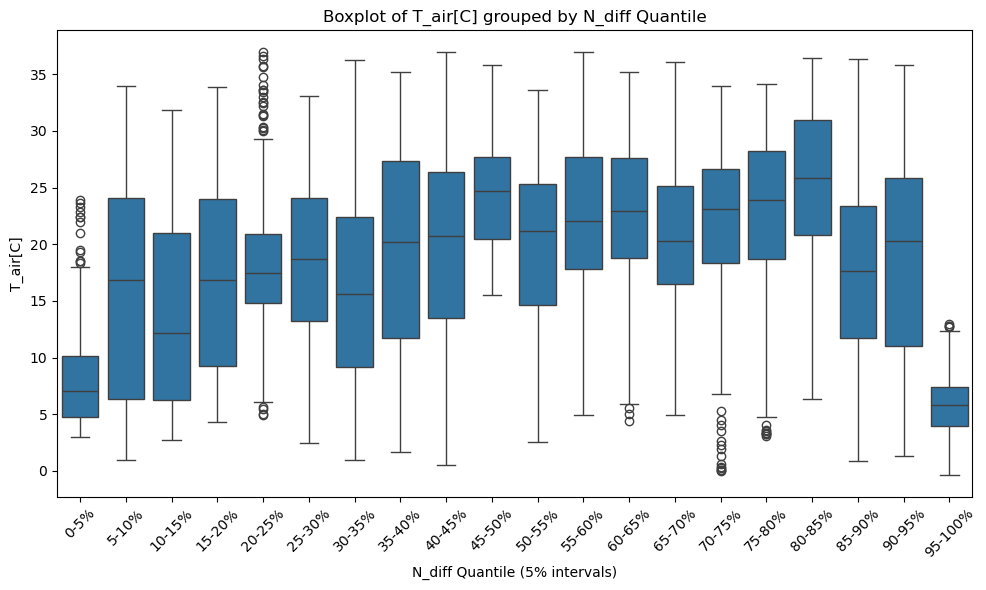

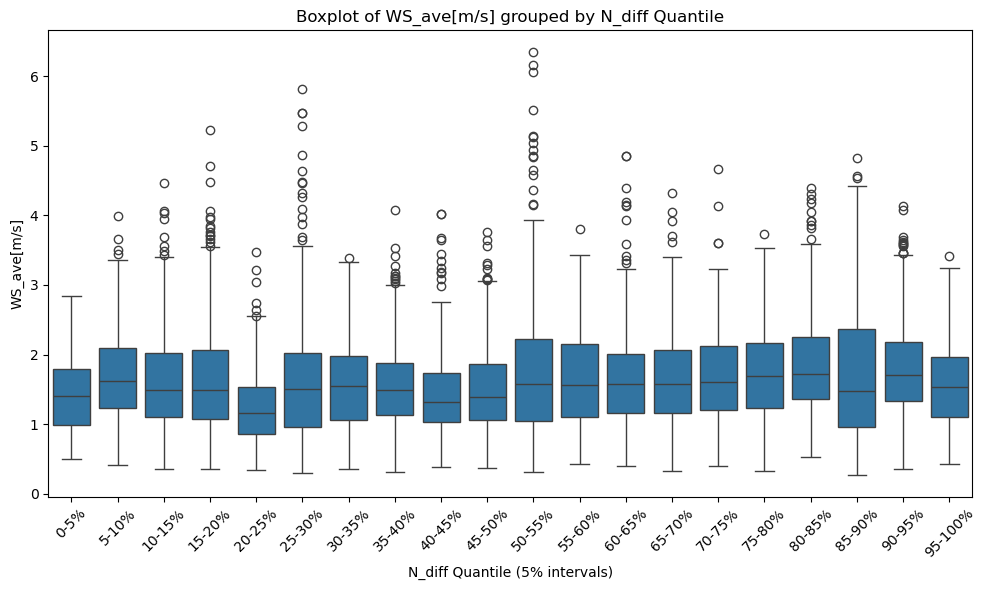

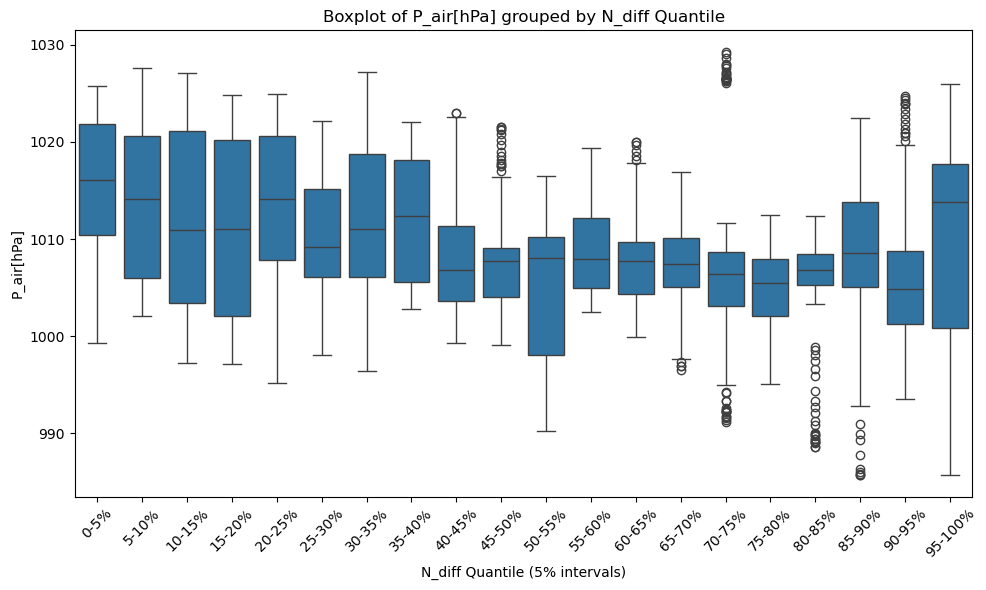

In [147]:
import seaborn as sns

# ...

# --- 2. Create a 'date' Column in met_data from the Datetime Index ---
met_data['date'] = met_data.index.date

# --- 3. Ensure the daily_results_df 'date' Column is Compatible ---
# daily_results_df comes from previous steps and should have a 'date' column.
# Convert it to the same type (datetime.date) if necessary.
daily_results_df['date'] = pd.to_datetime(daily_results_df['date']).dt.date

# --- 4. Merge the Meteorological Data with the Daily Results ---
# This adds the diff_quantile for each day to every hourly observation.
met_df_merged = met_data.merge(daily_results_df[['date', 'diff_quantile']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
met_vars = ['RH[%%]', 'T_air[C]', 'WS_ave[m/s]', 'P_air[hPa]']  # Adjust the variable names as needed

for var in met_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diff_quantile', y=var, data=met_df_merged)
    plt.xlabel('N_diff Quantile (5% intervals)')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped by N_diff Quantile')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [148]:
# NOx data
nox_data = pd.read_csv('/home/coliewo/Documents/Data Analysis/NPF/Data/Pollutants/nox_2024.csv')
nox_data['datetime'] = pd.to_datetime(nox_data['date'] + ' ' + nox_data['time'])
nox_data.drop(['date', 'time'], axis=1, inplace=True)  # drop date and time columns
nox_data.index = nox_data['datetime']
nox_data

daydec  NO[ppb]  NO2[ppb]  NOx[ppb]  Pre  Pre_low  \
datetime                                                                     
2024-01-01 00:00:00    0.000000    0.413     1.341     1.754 -999     -999   
2024-01-01 00:01:00    0.000694    0.437     1.333     1.770 -999     -999   
2024-01-01 00:02:00    0.001389    0.458     1.331     1.789 -999     -999   
2024-01-01 00:03:00    0.002083    0.467     1.338     1.805 -999     -999   
2024-01-01 00:04:00    0.002778    0.470     1.356     1.825 -999     -999   
...                         ...      ...       ...       ...  ...      ...   
2024-12-31 23:55:00  365.996528    1.094    10.400    11.493 -999     -999   
2024-12-31 23:56:00  365.997222    1.060    10.441    11.501 -999     -999   
2024-12-31 23:57:00  365.997917    1.065    10.431    11.495 -999     -999   
2024-12-31 23:58:00  365.998611    1.040    10.346    11.386 -999     -999   
2024-12-31 23:59:00  365.999306    1.009    10.488    11.497 -999     -999   

                     Pre_High   T_int  ReactCellT[C]  T_Cooler    PMT_V  \
datetime                                                                  
2024-01-01 00:00:00      -999  32.847         39.994     5.133  483.438   
2024-01-01 00:01:00      -999  32.837         39.991     5.132  483.445   
2024-01-01 00:02:00      -999  32.814         39.994     5.130  483.460   
2024-01-01 00:03:00      -999  32.848         39.994     5.130  483.445   
2024-01-01 00:04:00      -999  32.890         39.991     5.131  483.437   
...                       ...     ...            ...       ...      ...   
2024-12-31 23:55:00      -999  32.176         39.985    -1.194  483.255   
2024-12-31 23:56:00      -999  32.150         39.986    -1.209  483.097   
2024-12-31 23:57:00      -999  32.143         39.985    -1.211  483.247   
2024-12-31 23:58:00      -999  32.132         39.986    -1.203  483.263   
2024-12-31 23:59:00      -999  32.121         39.989    -1.212  483.263   

                     T_NO2_conv  ReactCellP[incHg]  O3_flow[cc/m]  \
datetime                                                            
2024-01-01 00:00:00           0              1.314         88.842   
2024-01-01 00:01:00           0              1.315         89.122   
2024-01-01 00:02:00           0              1.314         88.848   
2024-01-01 00:03:00           0              1.314         89.010   
2024-01-01 00:04:00           0              1.314         88.743   
...                         ...                ...            ...   
2024-12-31 23:55:00           0              1.381         90.525   
2024-12-31 23:56:00           0              1.381         90.516   
2024-12-31 23:57:00           0              1.380         90.396   
2024-12-31 23:58:00           0              1.381         90.361   
2024-12-31 23:59:00           0              1.383         90.371   

                     SampleFlow[cc/m]  status      warning            datetime  
datetime                                                                        
2024-01-01 00:00:00          1119.423  SAMPLE            0 2024-01-01 00:00:00  
2024-01-01 00:01:00          1118.973  SAMPLE            0 2024-01-01 00:01:00  
2024-01-01 00:02:00          1118.337  SAMPLE            0 2024-01-01 00:02:00  
2024-01-01 00:03:00          1118.262  SAMPLE            0 2024-01-01 00:03:00  
2024-01-01 00:04:00          1118.179  SAMPLE            0 2024-01-01 00:04:00  
...                               ...     ...          ...                 ...  
2024-12-31 23:55:00          1138.667  SAMPLE  10000000000 2024-12-31 23:55:00  
2024-12-31 23:56:00          1138.421  SAMPLE  10000000000 2024-12-31 23:56:00  
2024-12-31 23:57:00          1139.758  SAMPLE  10000000000 2024-12-31 23:57:00  
2024-12-31 23:58:00          1139.915  SAMPLE  10000000000 2024-12-31 23:58:00  
2024-12-31 23:59:00          1139.194  SAMPLE  10000000000 2024-12-31 23:59:00  

[523792 rows x 18 columns]

In [149]:
# Replace values with NaN where 'status' is 'SPAN'
nox_data.loc[nox_data['status'] == 'SPAN', ['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']] = np.nan

# Replace values less than 0 with NaN in specific columns (if physically impossible)
nox_data[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']] = nox_data[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']].map(lambda x: np.nan if x < 0 else x)

In [150]:
nox_data = nox_data[['NO2[ppb]','NO[ppb]','NOx[ppb]']].resample('1h').mean()

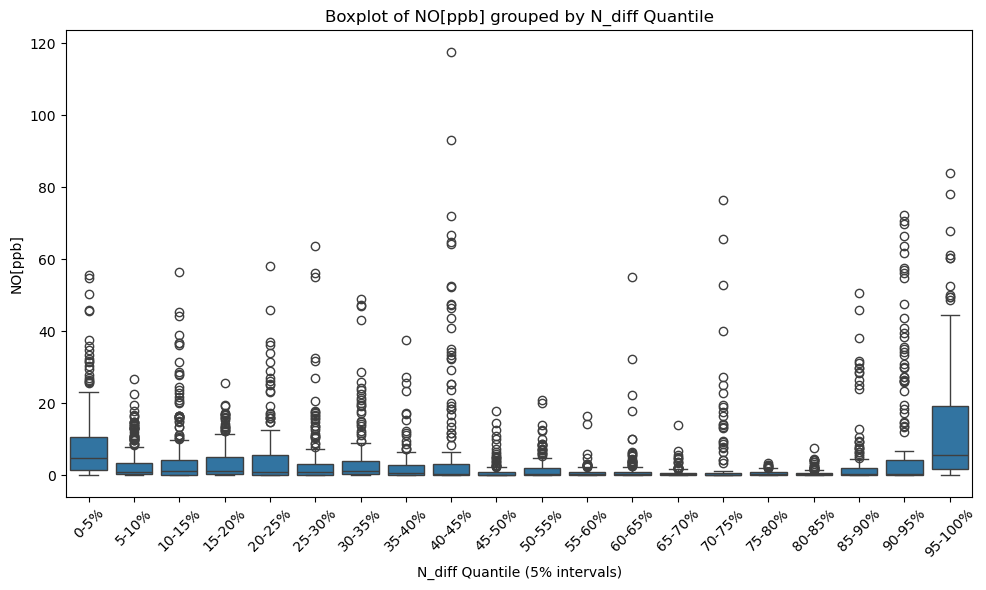

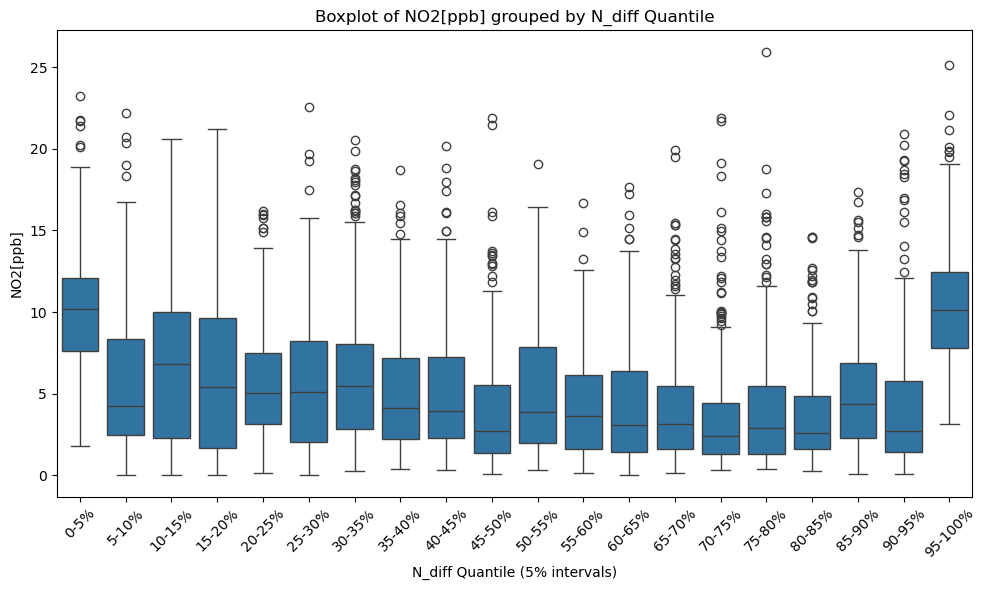

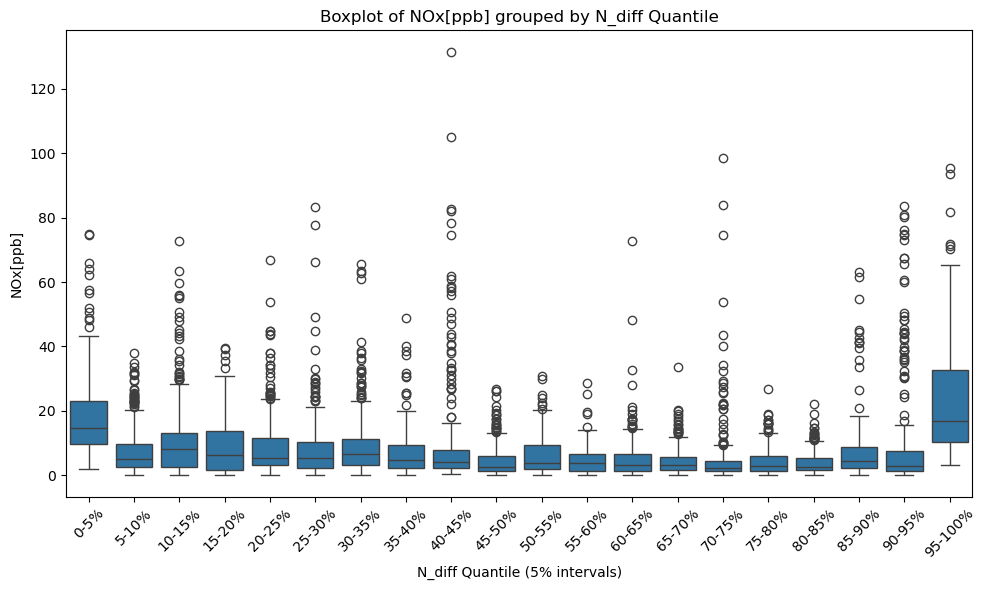

In [151]:
import seaborn as sns

# ...

# --- 2. Create a 'date' Column in nox_data from the Datetime Index ---
nox_data['date'] = nox_data.index.date

# --- 3. Ensure the daily_results_df 'date' Column is Compatible ---
# daily_results_df comes from previous steps and should have a 'date' column.
# Convert it to the same type (datetime.date) if necessary.
daily_results_df['date'] = pd.to_datetime(daily_results_df['date']).dt.date

# --- 4. Merge the Meteorological Data with the Daily Results ---
# This adds the diff_quantile for each day to every hourly observation.
nox_df_merged = nox_data.merge(daily_results_df[['date', 'diff_quantile']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
nox_vars = ['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']  # Adjust the variable names as needed

for var in nox_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diff_quantile', y=var, data=nox_df_merged)
    plt.xlabel('N_diff Quantile (5% intervals)')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped by N_diff Quantile')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [152]:
# O3 data
o3_data = pd.read_csv('/home/coliewo/Documents/Data Analysis/NPF/Data/Pollutants/ozone_2024.csv')
o3_data['datetime'] = pd.to_datetime(o3_data['date'] + ' ' + o3_data['time'])
o3_data.drop(['date', 'time'], axis=1, inplace=True)  # drop date and time columns
o3_data.index = o3_data['datetime']
o3_data

daydec      O3  Intensity_A  Intensity_B  T_bench  \
datetime                                                                     
2024-01-01 00:00:00    0.000000   3.331        73855        79488     37.3   
2024-01-01 00:01:00    0.000694   3.241        73862        79496     37.3   
2024-01-01 00:02:00    0.001389   3.589        73864        79498     37.3   
2024-01-01 00:03:00    0.002083   3.344        73849        79481     37.3   
2024-01-01 00:04:00    0.002778   3.003        73856        79490     37.3   
...                         ...     ...          ...          ...      ...   
2024-12-31 23:55:00  365.996528   7.626        66541        71232     36.6   
2024-12-31 23:56:00  365.997222   6.827        66533        71219     36.6   
2024-12-31 23:57:00  365.997917   8.185        66536        71226     36.6   
2024-12-31 23:58:00  365.998611   6.299        66534        71224     36.5   
2024-12-31 23:59:00  365.999306  10.180        66541        71231     36.6   

                     T_lamp  T_03_lamp  Flow_A  Flow_B      P  status  \
datetime                                                                
2024-01-01 00:00:00    53.3       42.4   0.706   0.709  746.4  sample   
2024-01-01 00:01:00    53.3       42.4   0.706   0.709  746.4  sample   
2024-01-01 00:02:00    53.4       42.4   0.705   0.709  746.4  sample   
2024-01-01 00:03:00    53.4       42.4   0.705   0.708  746.4  sample   
2024-01-01 00:04:00    53.4       42.4   0.706   0.710  746.4  sample   
...                     ...        ...     ...     ...    ...     ...   
2024-12-31 23:55:00    53.4       42.4   0.646   0.646  769.0  sample   
2024-12-31 23:56:00    53.4       42.4   0.642   0.641  769.0  sample   
2024-12-31 23:57:00    53.4       42.4   0.638   0.642  768.7  sample   
2024-12-31 23:58:00    53.5       42.4   0.643   0.651  769.0  sample   
2024-12-31 23:59:00    53.3       42.4   0.643   0.647  768.7  sample   

                        flags            datetime  
datetime                                           
2024-01-01 00:00:00  0C100000 2024-01-01 00:00:00  
2024-01-01 00:01:00  0C100000 2024-01-01 00:01:00  
2024-01-01 00:02:00  0C100000 2024-01-01 00:02:00  
2024-01-01 00:03:00  0C100000 2024-01-01 00:03:00  
2024-01-01 00:04:00  0C100000 2024-01-01 00:04:00  
...                       ...                 ...  
2024-12-31 23:55:00  0C100000 2024-12-31 23:55:00  
2024-12-31 23:56:00  0C100000 2024-12-31 23:56:00  
2024-12-31 23:57:00  0C100000 2024-12-31 23:57:00  
2024-12-31 23:58:00  0C100000 2024-12-31 23:58:00  
2024-12-31 23:59:00  0C100000 2024-12-31 23:59:00  

[518872 rows x 13 columns]

In [154]:
# Replace values less than 0 with NaN in specific columns (if physically impossible)
o3_data[['O3']] = o3_data[['O3']].map(lambda x: np.nan if x < 0 else x)

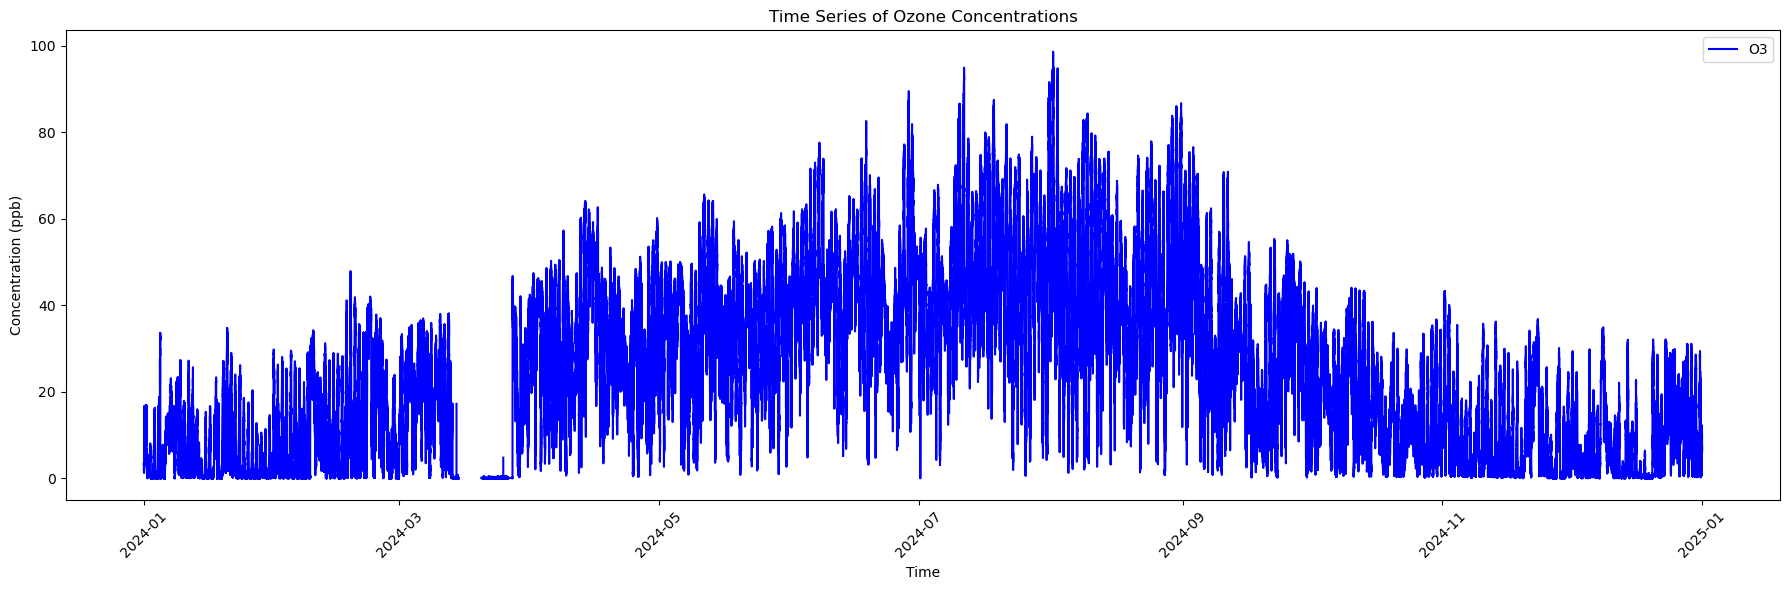

In [155]:
plt.figure(figsize=(18, 6))

# Plot O3 data
plt.plot(o3_data.index, o3_data['O3'], label='O3', color='blue')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Concentration (ppb)')
plt.title('Time Series of Ozone Concentrations')
plt.legend()

# Improve formatting for the x-axis (rotating date labels)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

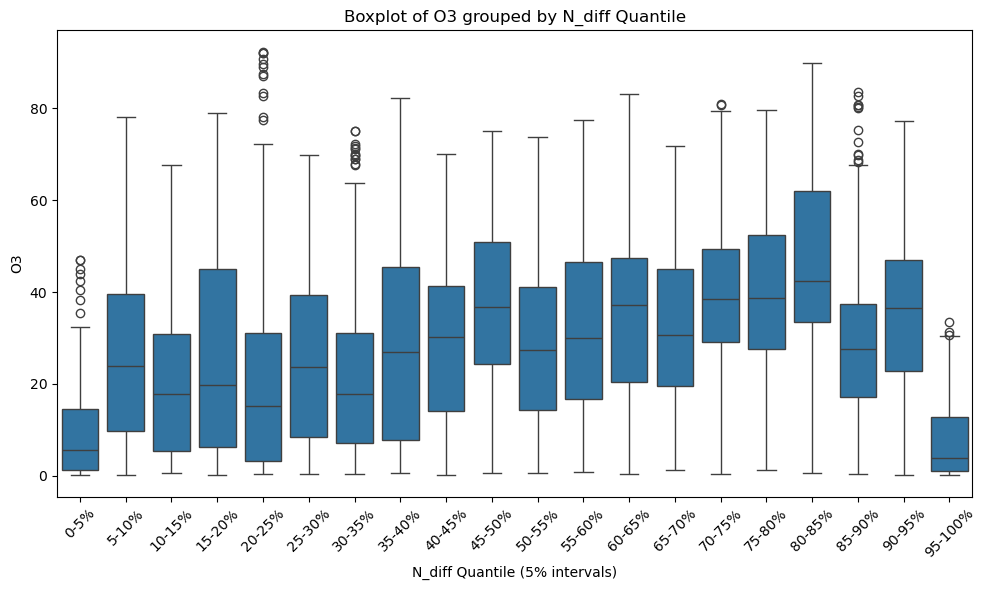

In [156]:
import seaborn as sns

# ...
o3_data = o3_data[['O3']].resample('1h').mean()
# --- 2. Create a 'date' Column in o3_data from the Datetime Index ---
o3_data['date'] = o3_data.index.date

# --- 3. Ensure the daily_results_df 'date' Column is Compatible ---
# daily_results_df comes from previous steps and should have a 'date' column.
# Convert it to the same type (datetime.date) if necessary.
daily_results_df['date'] = pd.to_datetime(daily_results_df['date']).dt.date

# --- 4. Merge the Meteorological Data with the Daily Results ---
# This adds the diff_quantile for each day to every hourly observation.
o3_df_merged = o3_data.merge(daily_results_df[['date', 'diff_quantile']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
o3_vars = ['O3']  # Adjust the variable names as needed

for var in o3_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diff_quantile', y=var, data=o3_df_merged)
    plt.xlabel('N_diff Quantile (5% intervals)')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped by N_diff Quantile')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [161]:
# BC data
bc_data = pd.read_csv('/home/coliewo/Documents/Data Analysis/NPF/Data/Pollutants/bc_2024.csv')
bc_data['datetime'] = pd.to_datetime(bc_data['date'] + ' ' + bc_data['time'])
bc_data.drop(['date', 'time'], axis=1, inplace=True)  # drop date and time columns
bc_data.index = bc_data['datetime']
bc_data

day_dec  Timebase[s]  RefCh1  Sen1Ch1  Sen2Ch1  RefCh2  \
datetime                                                                      
2024-01-01 00:00:49      NaN           60       0        0        0       0   
2024-01-01 00:01:49      NaN           60       0        0        0       0   
2024-01-01 00:02:49      NaN           60       0        0        0       0   
2024-01-01 00:03:49      NaN           60       0        0        0       0   
2024-01-01 00:04:49      NaN           60       0        0        0       0   
...                      ...          ...     ...      ...      ...     ...   
2024-12-31 23:55:05      NaN           60  946048   638885   761441  950146   
2024-12-31 23:56:05      NaN           60  946186   632951   759269  950229   
2024-12-31 23:57:05      NaN           60  946156   627239   757093  950074   
2024-12-31 23:58:05      NaN            1       0        0        0       0   
2024-12-31 23:59:05      NaN            1  912715   803974   772882  923719   

                     Sen1Ch2  Sen2Ch2  RefCh3  Sen1Ch3  ...        K3  \
datetime                                                ...             
2024-01-01 00:00:49        0        0       0        0  ...  0.004248   
2024-01-01 00:01:49        0        0       0        0  ...  0.004248   
2024-01-01 00:02:49        0        0       0        0  ...  0.004248   
2024-01-01 00:03:49        0        0       0        0  ...  0.004248   
2024-01-01 00:04:49        0        0       0        0  ...  0.004248   
...                      ...      ...     ...      ...  ...       ...   
2024-12-31 23:55:05   669267   781188  944298   681003  ...  0.003295   
2024-12-31 23:56:05   665327   779795  944360   677780  ...  0.003295   
2024-12-31 23:57:05   661409   778272  944246   674577  ...  0.003295   
2024-12-31 23:58:05        0        0       0        0  ...  0.003295   
2024-12-31 23:59:05   768285   786048  920186   762708  ...  0.003295   

                           K4        K5        K6        K7  TapeAdvCount  \
datetime                                                                    
2024-01-01 00:00:49  0.003763  0.003389  0.002372  0.002270          1338   
2024-01-01 00:01:49  0.003763  0.003389  0.002372  0.002270          1338   
2024-01-01 00:02:49  0.003763  0.003389  0.002372  0.002270          1338   
2024-01-01 00:03:49  0.003763  0.003389  0.002372  0.002270          1338   
2024-01-01 00:04:49  0.003763  0.003389  0.002372  0.002270          1338   
...                       ...       ...       ...       ...           ...   
2024-12-31 23:55:05  0.002886  0.002032 -0.000365 -0.000289          2915   
2024-12-31 23:56:05  0.002886  0.002032 -0.000365 -0.000289          2915   
2024-12-31 23:57:05  0.002886  0.002032 -0.000365 -0.000289          2915   
2024-12-31 23:58:05  0.002886  0.002032 -0.000365 -0.000289          2915   
2024-12-31 23:59:05  0.002886  0.002032 -0.000365 -0.000289          2916   

                     ID_com1  ID_com2  ID_com3            datetime  
datetime                                                            
2024-01-01 00:00:49        0        0        5 2024-01-01 00:00:49  
2024-01-01 00:01:49        0        0        5 2024-01-01 00:01:49  
2024-01-01 00:02:49        0        0        5 2024-01-01 00:02:49  
2024-01-01 00:03:49        0        0        5 2024-01-01 00:03:49  
2024-01-01 00:04:49        0        0        5 2024-01-01 00:04:49  
...                      ...      ...      ...                 ...  
2024-12-31 23:55:05        5        0        0 2024-12-31 23:55:05  
2024-12-31 23:56:05        5        0        0 2024-12-31 23:56:05  
2024-12-31 23:57:05        5        0        0 2024-12-31 23:57:05  
2024-12-31 23:58:05        5        0        0 2024-12-31 23:58:05  
2024-12-31 23:59:05        5        0        0 2024-12-31 23:59:05  

[391476 rows x 70 columns]

In [162]:
# Replace values less than 0 with NaN in specific columns (if physically impossible)
bc_data[['BC6[ng/m3]']] = bc_data[['BC6[ng/m3]']].map(lambda x: np.nan if x < 0 else x)

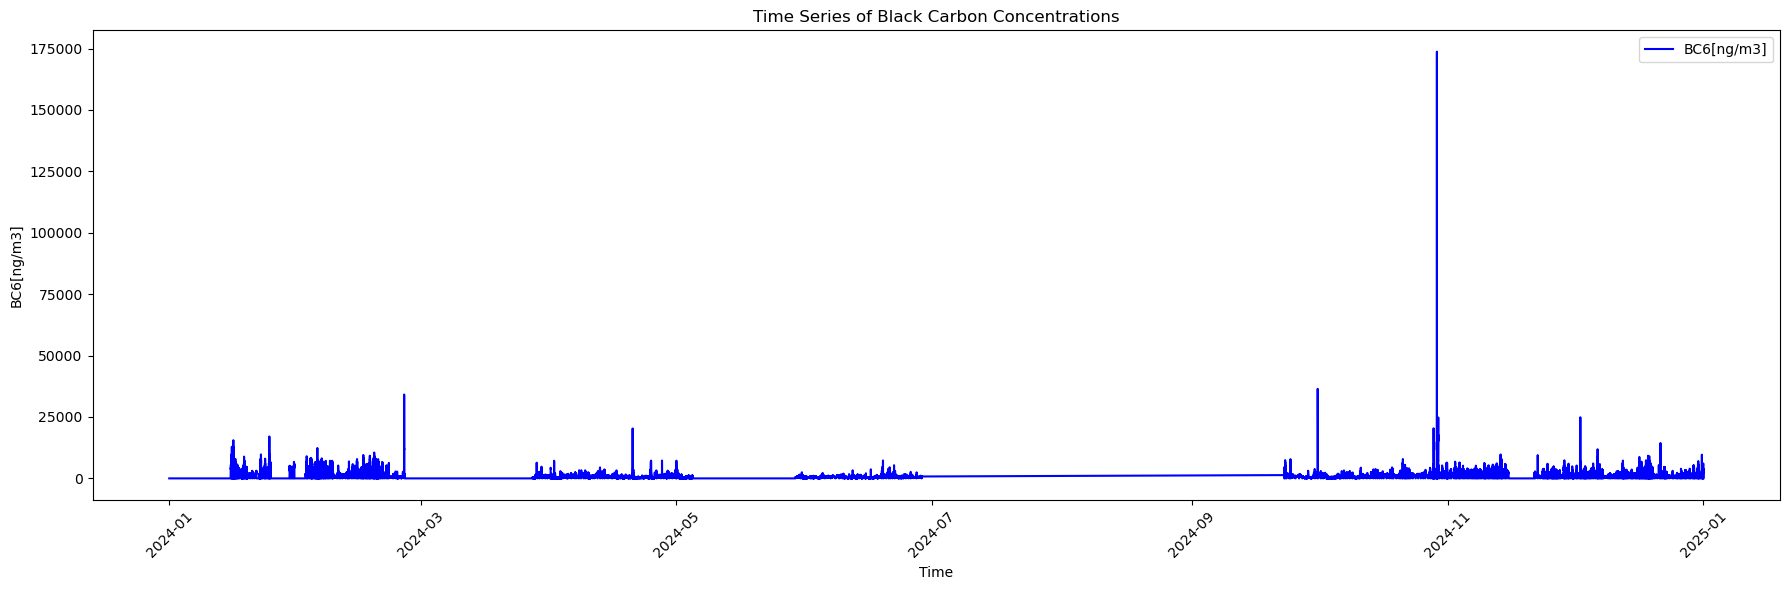

In [163]:
plt.figure(figsize=(18, 6))

# Plot O3 data
plt.plot(bc_data.index, bc_data['BC6[ng/m3]'], label='BC6[ng/m3]', color='blue')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('BC6[ng/m3]')
plt.title('Time Series of Black Carbon Concentrations')
plt.legend()

# Improve formatting for the x-axis (rotating date labels)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

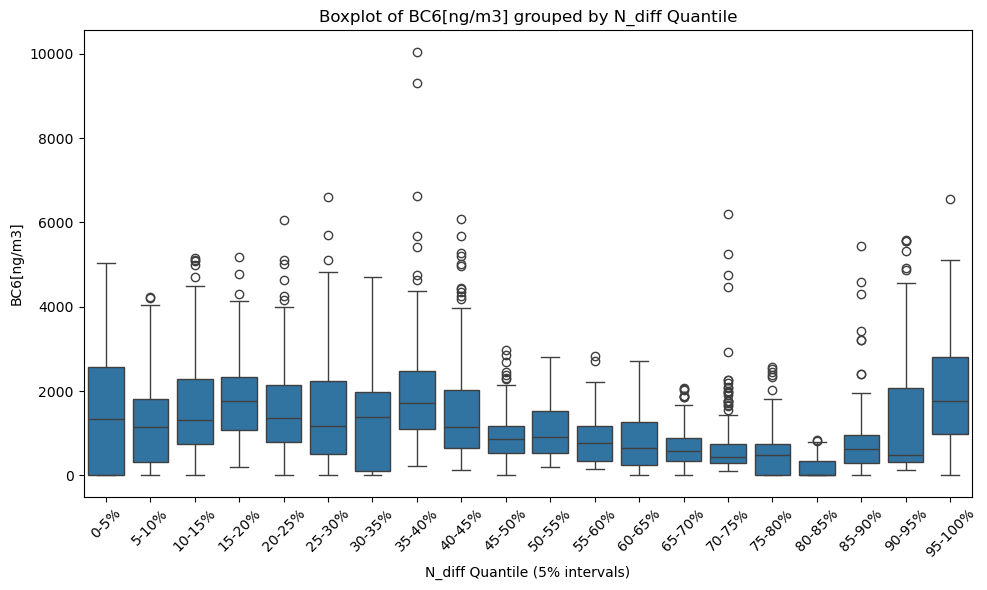

In [164]:
import seaborn as sns

# ...
bc_data = bc_data[['BC6[ng/m3]']].resample('1h').mean()
# --- 2. Create a 'date' Column in bc_data from the Datetime Index ---
bc_data['date'] = bc_data.index.date

# --- 3. Ensure the daily_results_df 'date' Column is Compatible ---
# daily_results_df comes from previous steps and should have a 'date' column.
# Convert it to the same type (datetime.date) if necessary.
daily_results_df['date'] = pd.to_datetime(daily_results_df['date']).dt.date

# --- 4. Merge the Meteorological Data with the Daily Results ---
# This adds the diff_quantile for each day to every hourly observation.
bc_df_merged = bc_data.merge(daily_results_df[['date', 'diff_quantile']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
bc_vars = ['BC6[ng/m3]']  # Adjust the variable names as needed

for var in bc_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diff_quantile', y=var, data=bc_df_merged)
    plt.xlabel('N_diff Quantile (5% intervals)')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped by N_diff Quantile')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Mode Fitting

In [165]:
daily_results_df

date  season          N_B           N_A        N_diff diff_quantile
0    2024-05-16  spring          NaN  55464.064999           NaN           NaN
1    2024-05-17  spring   506.999044   1675.773555   1168.774511        30-35%
2    2024-05-18  spring   880.237580   9315.303695   8435.066115        80-85%
3    2024-05-19  spring   346.060757    322.175231    -23.885526         5-10%
4    2024-05-20  spring  3482.836234   2488.202653   -994.633581          0-5%
..          ...     ...          ...           ...           ...           ...
257  2025-01-28  winter  2613.776005   7056.940493   4443.164488        70-75%
258  2025-01-29  winter  3420.195697   5833.552533   2413.356835        55-60%
259  2025-01-30  winter  1112.437796   1736.405048    623.967252        15-20%
260  2025-01-31  winter  2724.950806  57361.517851  54636.567045       95-100%
261  2025-02-01  winter   865.224348           NaN           NaN           NaN

[262 rows x 6 columns]

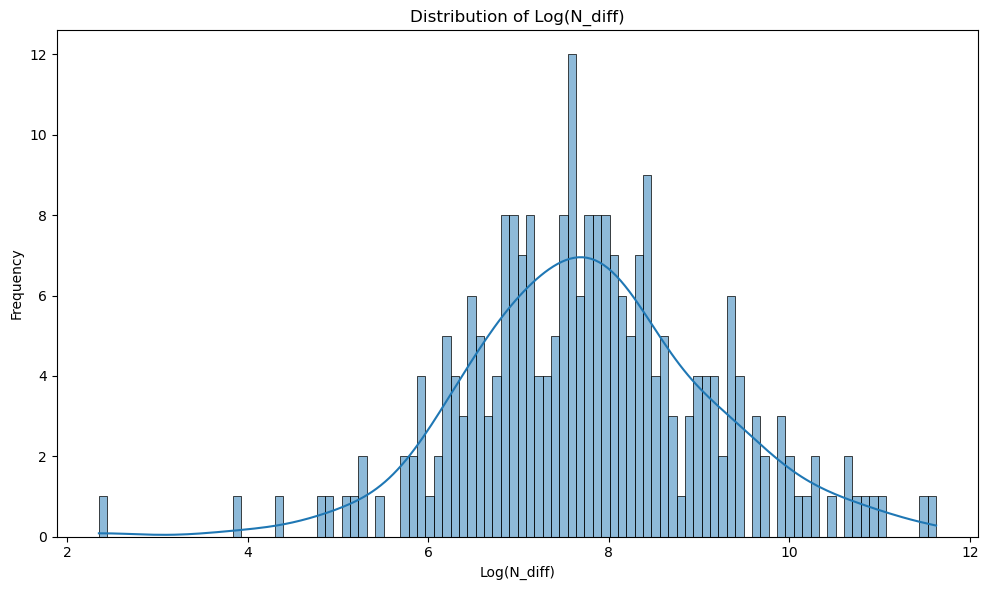

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Calculate the log of N_diff ---
# Ensure that all N_diff values are positive before taking the log.
# If necessary, you could filter out or adjust non-positive values.
daily_results_df_pos = daily_results_df[daily_results_df['N_diff'] > 0].copy()

# Calculate the natural logarithm; you could also use np.log10() for base-10
daily_results_df_pos['log_N_diff'] = np.log(daily_results_df_pos['N_diff'])

# --- 2. Plot the Distribution of log(N_diff) ---
plt.figure(figsize=(10, 6))
sns.histplot(daily_results_df_pos['log_N_diff'], bins=100, kde=True)
plt.xlabel('Log(N_diff)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(N_diff)')
plt.tight_layout()
plt.show()


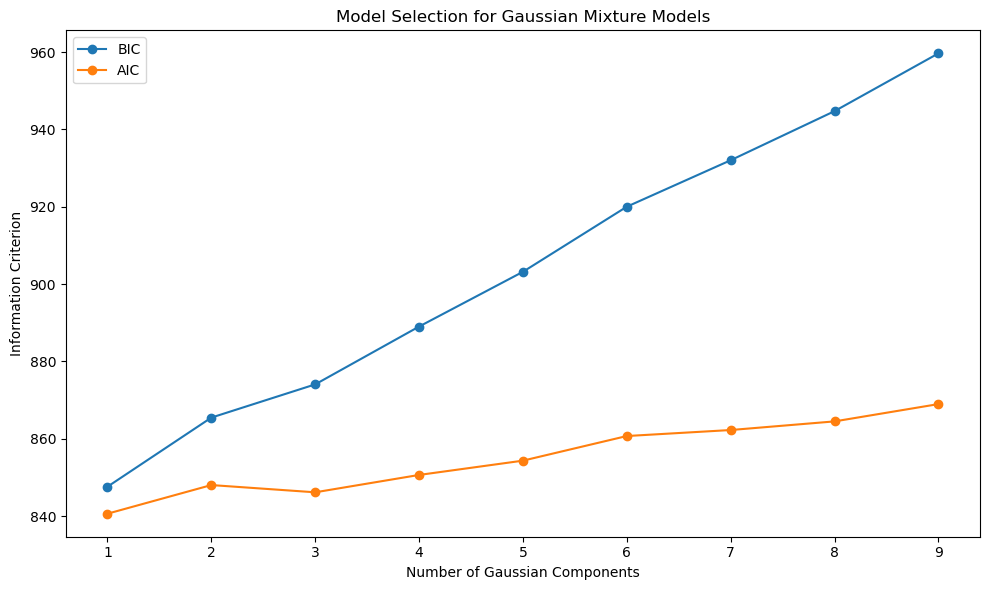

Optimal number of Gaussian components based on BIC: 1


In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Use the log-transformed N_diff values (reshape to a 2D array for sklearn)
X = daily_results_df_pos['log_N_diff'].values.reshape(-1, 1)

# Define a range of components to test, e.g., from 1 to 9 components.
n_components_range = range(1, 10)

# Lists to store the computed BIC and AIC values for each model.
bics = []
aics = []

for n in n_components_range:
    # Fit the Gaussian Mixture Model with n components
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    # Append the BIC and AIC for the current model.
    bics.append(gmm.bic(X))
    aics.append(gmm.aic(X))

# Plot the BIC and AIC values as a function of the number of components.
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of Gaussian Components')
plt.ylabel('Information Criterion')
plt.title('Model Selection for Gaussian Mixture Models')
plt.legend()
plt.tight_layout()
plt.show()

# Determine the optimal number of components (minimizes BIC)
optimal_components = n_components_range[np.argmin(bics)]
print("Optimal number of Gaussian components based on BIC:", optimal_components)


In [169]:
N_2_5_5

concentration     smoothed  season  hour        date
time                                                                    
2024-05-16 00:00:00           NaN          NaN  spring     0  2024-05-16
2024-05-16 01:00:00           NaN          NaN  spring     1  2024-05-16
2024-05-16 02:00:00           NaN          NaN  spring     2  2024-05-16
2024-05-16 03:00:00           NaN          NaN  spring     3  2024-05-16
2024-05-16 04:00:00           NaN          NaN  spring     4  2024-05-16
...                           ...          ...     ...   ...         ...
2025-01-31 20:00:00  10080.968792  9759.139919  winter    20  2025-01-31
2025-01-31 21:00:00   7406.416455  8743.692623  winter    21  2025-01-31
2025-01-31 22:00:00   7819.420487  7612.918471  winter    22  2025-01-31
2025-01-31 23:00:00     678.93696  4249.178724  winter    23  2025-01-31
2025-02-01 00:00:00   1051.511736   865.224348  winter     0  2025-02-01

[6265 rows x 5 columns]

gmm_label
0    153
2     48
1     41
Name: count, dtype: int64


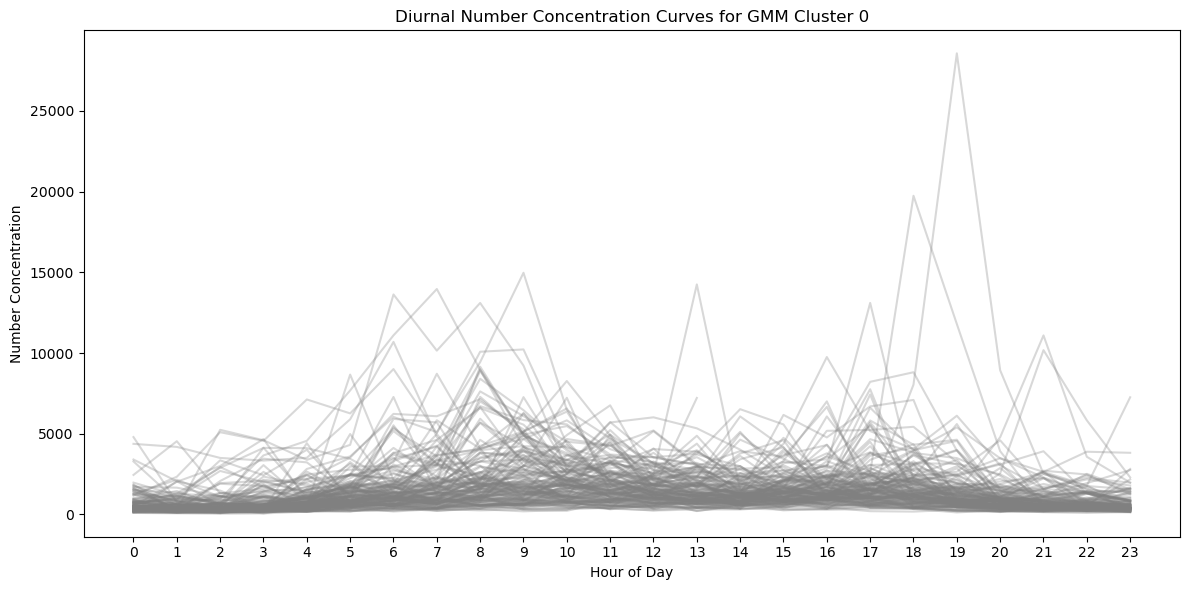

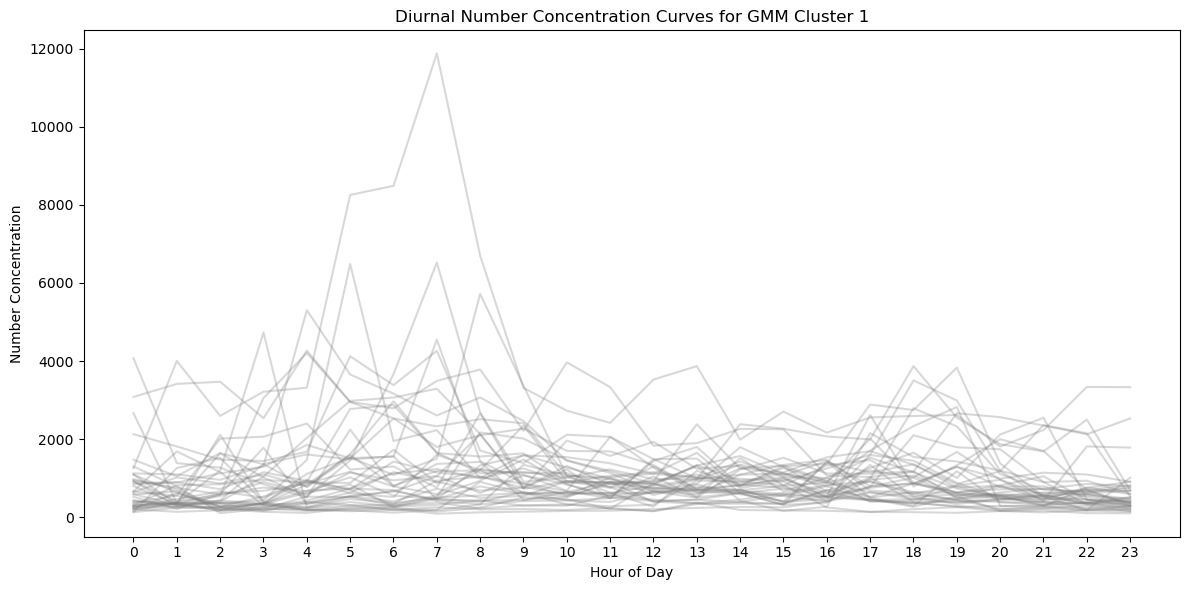

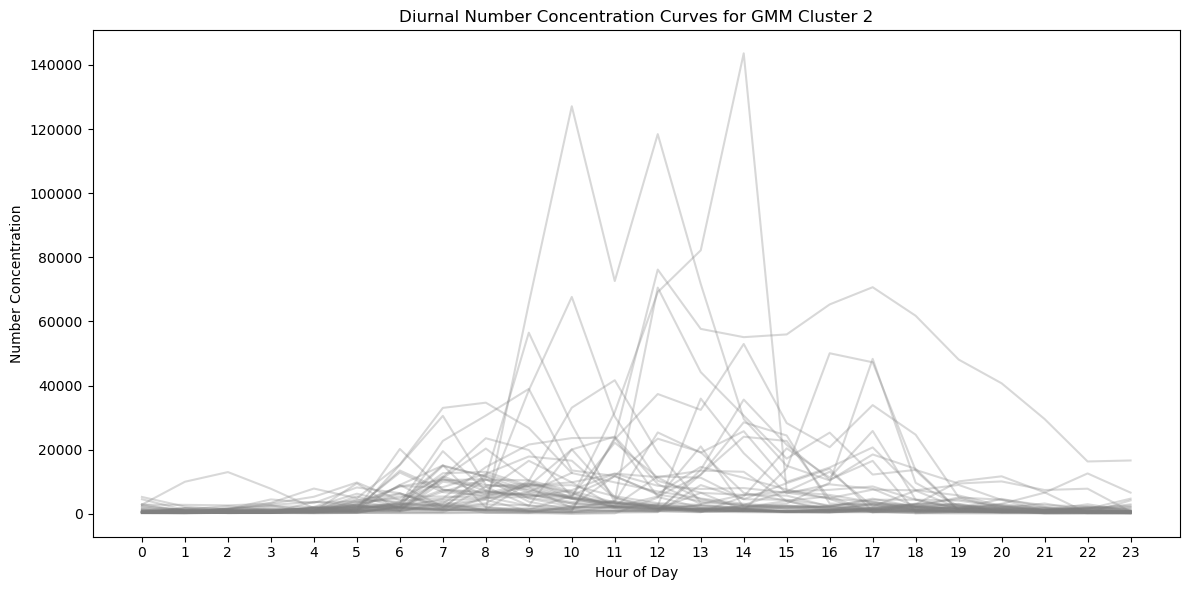

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# ----------------------------------------------------------
# 1. Fit a GMM with 3 components on the log-transformed N_diff data.
#    Assume daily_results_df_pos already has a column 'log_N_diff' and 'date'.
#    (Make sure that daily_results_df_pos contains only days where N_diff > 0.)
# ----------------------------------------------------------
gmm = GaussianMixture(n_components=3, random_state=42)
# Reshape the data to a 2D array as required by scikit-learn.
X = daily_results_df_pos['log_N_diff'].values.reshape(-1, 1)
daily_results_df_pos['gmm_label'] = gmm.fit_predict(X)

# Optional: Print the number of days in each cluster
print(daily_results_df_pos['gmm_label'].value_counts())

# ----------------------------------------------------------
# 2. Ensure the hourly number concentration DataFrame has a date column.
#    We assume N_2_5_5 is your original DataFrame with hourly number concentrations.
# ----------------------------------------------------------

# ----------------------------------------------------------
# 3. For each GMM cluster, plot the diurnal number concentration curves.
#    Each curve represents one day.
# ----------------------------------------------------------
unique_labels = sorted(daily_results_df_pos['gmm_label'].unique())

for label in unique_labels:
    # Get the list of dates for days belonging to the current GMM cluster.
    dates_in_cluster = daily_results_df_pos[daily_results_df_pos['gmm_label'] == label]['date'].unique()
    
    plt.figure(figsize=(12, 6))
    plt.title(f'Diurnal Number Concentration Curves for GMM Cluster {label}')
    
    # For each day, extract the hourly data and plot the curve.
    for d in dates_in_cluster:
        day_data = N_2_5_5[N_2_5_5['date'] == d]
        if day_data.empty:
            continue
        # Extract hour of day and concentration.
        # (Assuming N_2_5_5 has a 'concentration' column.)
        hours = day_data.index.hour
        concentration = day_data['concentration']
        plt.plot(hours, concentration, color='gray', alpha=0.3)  # Plot with transparency
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Number Concentration')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()


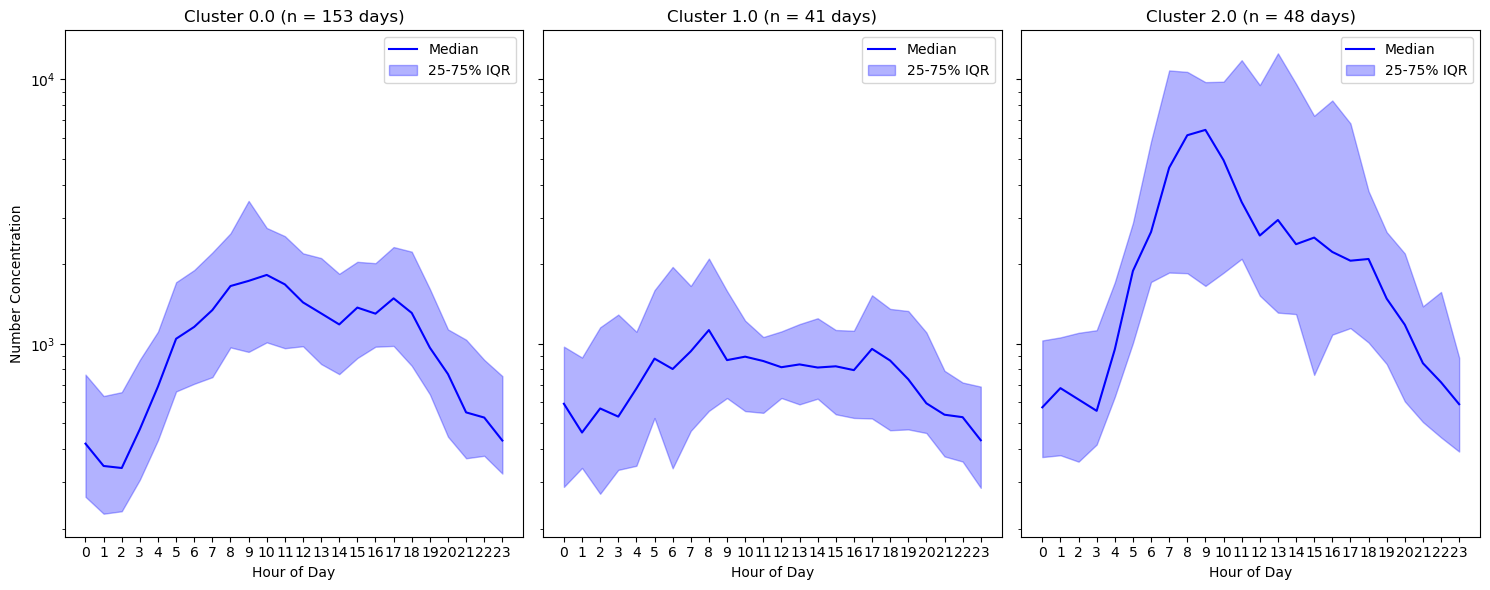

In [173]:
import matplotlib.pyplot as plt

# --- 1. Count the number of days for each cluster from daily_results_df_pos ---
counts = daily_results_df_pos.groupby('gmm_label')['date'].nunique()

# --- 2. Group the Hourly Data by Cluster and Hour ---
# We want the median, 25th, and 75th percentiles for the 'concentration' at each hour.


# Merge the daily cluster labels (gmm_label) from daily_results_df_pos into the hourly N_2_5_5
# (We assume daily_results_df_pos contains at least the columns 'date' and 'gmm_label'.)
df_merged = N_2_5_5.merge(daily_results_df_pos[['date', 'gmm_label']], on='date', how='left')

grouped = df_merged.groupby(['gmm_label', 'hour'])['concentration'].agg(
    median='median',
    lower=lambda x: x.quantile(0.25),
    upper=lambda x: x.quantile(0.75)
).reset_index()

# --- 2. Get the unique clusters from the aggregated data ---
unique_clusters = sorted(grouped['gmm_label'].unique())
n_clusters = len(unique_clusters)

# --- 3. Create horizontal subplots (one column per cluster) ---
fig, axes = plt.subplots(1, n_clusters, figsize=(n_clusters * 5, 6), sharey=True)

# If there's only one cluster, make sure axes is iterable.
if n_clusters == 1:
    axes = [axes]

# --- 4. Loop over clusters and plot each in its respective subplot ---
for ax, label in zip(axes, unique_clusters):
    # Filter aggregated data for the current cluster.
    cluster_data = grouped[grouped['gmm_label'] == label]
    # Retrieve the number of days for this cluster.
    num_days = counts.loc[label]
    
    # Plot the median curve.
    ax.plot(cluster_data['hour'], cluster_data['median'], label='Median', color='blue')
    # Shade the interquartile range (25th to 75th percentile).
    ax.fill_between(cluster_data['hour'],
                    cluster_data['lower'],
                    cluster_data['upper'],
                    color='blue', alpha=0.3, label='25-75% IQR')
    
    # Set subplot title including the cluster label and the number of days.
    ax.set_title(f'Cluster {label} (n = {num_days} days)')
    ax.set_xlabel('Hour of Day')
    ax.set_xticks(range(0, 24))
    ax.set_yscale('log')  # Set log scale for the y-axis
    ax.legend()

# Set a common y-label.
axes[0].set_ylabel('Number Concentration')

plt.tight_layout()
plt.show()


In [174]:
daily_results_df_pos

date  season          N_B           N_A        N_diff  \
1    2024-05-17  spring   506.999044   1675.773555   1168.774511   
2    2024-05-18  spring   880.237580   9315.303695   8435.066115   
5    2024-05-21  spring   761.388822   1120.208156    358.819334   
6    2024-05-22  spring   630.063723   5841.713004   5211.649281   
7    2024-05-23  spring   727.153687   3528.223052   2801.069366   
..          ...     ...          ...           ...           ...   
253  2025-01-24  winter  1245.319714  13012.374630  11767.054916   
257  2025-01-28  winter  2613.776005   7056.940493   4443.164488   
258  2025-01-29  winter  3420.195697   5833.552533   2413.356835   
259  2025-01-30  winter  1112.437796   1736.405048    623.967252   
260  2025-01-31  winter  2724.950806  57361.517851  54636.567045   

    diff_quantile  log_N_diff  gmm_label  
1          30-35%    7.063711          0  
2          80-85%    9.040153          2  
5          10-15%    5.882819          1  
6          75-80%    8.558652          0  
7          60-65%    7.937757          0  
..            ...         ...        ...  
253        85-90%    9.373059          2  
257        70-75%    8.399122          0  
258        55-60%    7.788774          0  
259        15-20%    6.436098          1  
260       95-100%   10.908459          2  

[242 rows x 8 columns]

In [176]:
# Function to return the median day for a given cluster group
def get_median_day(group):
    # Calculate the median N_diff value for this cluster group
    median_val = group['N_diff'].median()
    # Find the index of the row where N_diff is closest to the median
    idx = (group['N_diff'] - median_val).abs().idxmin()
    return group.loc[idx]

# Group by the GMM cluster label and apply the function to get one representative median day per cluster
median_days_per_cluster = daily_results_df_pos.groupby('gmm_label').apply(get_median_day).reset_index(drop=True)

# Display the median day per cluster (showing date, cluster label, and N_diff)
print("Median day for each cluster:")
print(median_days_per_cluster[['date', 'gmm_label', 'N_diff']])

Median day for each cluster:
         date  gmm_label        N_diff
0  2024-06-07          0   2098.919923
1  2024-08-20          1    467.721334
2  2024-07-14          2  12772.630438


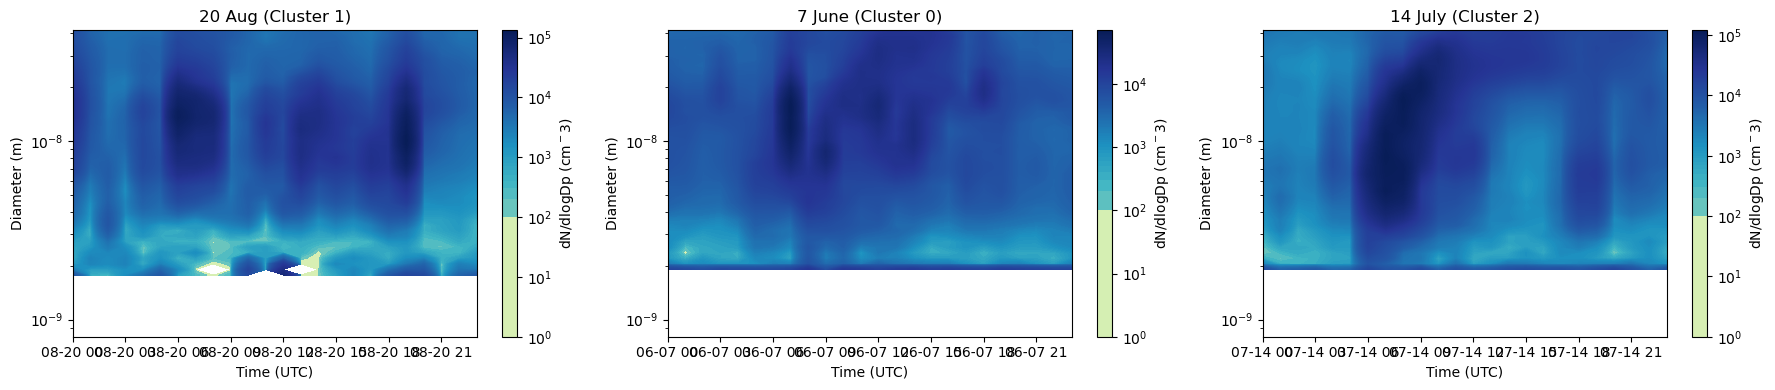

In [185]:
# Set up the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
axs = axs.ravel()


plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-08-20','2024-08-20')), '20 Aug (Cluster 1)', axs[0])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-06-07','2024-06-07')), '7 June (Cluster 0)', axs[1])
plot_spectral_data(ds['neg_particles'].sel(time=slice('2024-07-14','2024-07-14')), '14 July (Cluster 2)', axs[2])


plt.tight_layout()
plt.show()

#### Clusters

In [197]:
import aerosol.functions as af

In [198]:
# Convert from normalized number concentrations to unnormalized number concentrations.
dN = af.dndlogdp2dn(nais_neg_particles)
dN

diameter             8.028800e-10  8.628290e-10  9.272542e-10  9.961534e-10  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00           NaN           NaN           NaN           NaN   
2025-01-31 21:00:00           NaN           NaN           NaN           NaN   
2025-01-31 22:00:00           NaN           NaN           NaN           NaN   
2025-01-31 23:00:00           NaN           NaN           NaN           NaN   
2025-02-01 00:00:00           NaN           NaN           NaN           NaN   

diameter             1.070172e-09  1.151195e-09  1.238353e-09  1.330049e-09  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00           NaN           NaN           NaN           NaN   
2025-01-31 21:00:00           NaN           NaN           NaN           NaN   
2025-01-31 22:00:00           NaN           NaN           NaN           NaN   
2025-01-31 23:00:00           NaN           NaN           NaN           NaN   
2025-02-01 00:00:00           NaN           NaN           NaN           NaN   

diameter             1.428535e-09  1.535309e-09  ...  2.107146e-08  \
time                                             ...                 
2024-05-16 00:00:00           NaN           NaN  ...           NaN   
2024-05-16 01:00:00           NaN           NaN  ...           NaN   
2024-05-16 02:00:00           NaN           NaN  ...           NaN   
2024-05-16 03:00:00           NaN           NaN  ...           NaN   
2024-05-16 04:00:00           NaN           NaN  ...           NaN   
...                           ...           ...  ...           ...   
2025-01-31 20:00:00           NaN           NaN  ...    228.314513   
2025-01-31 21:00:00           NaN           NaN  ...    254.621380   
2025-01-31 22:00:00           NaN           NaN  ...    270.421313   
2025-01-31 23:00:00           NaN           NaN  ...    161.898819   
2025-02-01 00:00:00           NaN           NaN  ...    126.222378   

diameter             2.268812e-08  2.445574e-08  2.636108e-08  2.841614e-08  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00    228.445493    245.608358    264.188224    304.345799   
2025-01-31 21:00:00    279.856758    302.860723    331.301835    345.948324   
2025-01-31 22:00:00    300.479158    334.902082    388.519622    445.089525   
2025-01-31 23:00:00    170.090950    180.416541    203.695875    223.694804   
2025-02-01 00:00:00    135.677603    146.187399    165.076195    190.140034   

diame

In [199]:
import pandas as pd
result = pd.DataFrame({
    'max_diameter': dN.idxmax(axis=1), 
    'max_concentration': dN.max(axis=1)
})
result


/tmp/ipykernel_5799/975384270.py:3: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'max_diameter': dN.idxmax(axis=1),


max_diameter  max_concentration
time                                                
2024-05-16 00:00:00           NaN                NaN
2024-05-16 01:00:00           NaN                NaN
2024-05-16 02:00:00           NaN                NaN
2024-05-16 03:00:00           NaN                NaN
2024-05-16 04:00:00           NaN                NaN
...                           ...                ...
2025-01-31 20:00:00  3.931458e-09        1240.970564
2025-01-31 21:00:00  3.931458e-09         914.459018
2025-01-31 22:00:00  3.931458e-09        1128.211029
2025-01-31 23:00:00  3.846420e-08         359.691640
2025-02-01 00:00:00  4.155270e-08         322.173857

[6265 rows x 2 columns]

In [200]:
result['date'] = result.index.date
result

max_diameter  max_concentration        date
time                                                            
2024-05-16 00:00:00           NaN                NaN  2024-05-16
2024-05-16 01:00:00           NaN                NaN  2024-05-16
2024-05-16 02:00:00           NaN                NaN  2024-05-16
2024-05-16 03:00:00           NaN                NaN  2024-05-16
2024-05-16 04:00:00           NaN                NaN  2024-05-16
...                           ...                ...         ...
2025-01-31 20:00:00  3.931458e-09        1240.970564  2025-01-31
2025-01-31 21:00:00  3.931458e-09         914.459018  2025-01-31
2025-01-31 22:00:00  3.931458e-09        1128.211029  2025-01-31
2025-01-31 23:00:00  3.846420e-08         359.691640  2025-01-31
2025-02-01 00:00:00  4.155270e-08         322.173857  2025-02-01

[6265 rows x 3 columns]

In [210]:
# List to hold the results for each increasing period
periods = []

# Group by day using a daily frequency
for day, group in result.groupby(pd.Grouper(freq='D')):
    # Sort the group by time
    group = group.sort_index()
    s_diam = group['max_diameter']
    s_conc = group['max_concentration']
    run_start = None  # Mark the start of an increasing period

    # Loop over the series (starting from the second time point)
    for i in range(1, len(s_diam)):
        if s_diam.iloc[i] > s_diam.iloc[i-1]:
            # Mark the start if not already marked
            if run_start is None:
                run_start = s_diam.index[i-1]
        else:
            if run_start is not None:
                run_end = s_diam.index[i-1]
                # Calculate the duration in hours
                duration_hours = (run_end - run_start).total_seconds() / 3600.0
                
                # Get the start and end concentration values
                start_conc = s_conc.loc[run_start]
                end_conc = s_conc.loc[run_end]
                
                # Compute growth rate
                growth_rate = (s_diam.loc[run_end] - s_diam.loc[run_start]) * 1e9 / duration_hours

                # Compute dN/dt
                dN_dt = (end_conc - start_conc) / duration_hours
                
                periods.append({
                    "day": day.date(),
                    "start_time": run_start,
                    "end_time": run_end,
                    "start_diameter": s_diam.loc[run_start],
                    "end_diameter": s_diam.loc[run_end],
                    "start_concentration": start_conc,
                    "end_concentration": end_conc,
                    "duration_hours": duration_hours,
                    "growth_rate (nm/h)": growth_rate,
                    "dN_dt": dN_dt
                })
                run_start = None  # reset for next potential period
    
    # If the day ends while a run is active, record it as well
    if run_start is not None:
        run_end = s_diam.index[-1]
        duration_hours = (run_end - run_start).total_seconds() / 3600.0
        start_conc = s_conc.loc[run_start]
        end_conc = s_conc.loc[run_end]
        dN_dt = (end_conc - start_conc) / duration_hours
        periods.append({
            "day": day.date(),
            "start_time": run_start,
            "end_time": run_end,
            "start_diameter": s_diam.loc[run_start],
            "end_diameter": s_diam.loc[run_end],
            "start_concentration": start_conc,
            "end_concentration": end_conc,
            "duration_hours": duration_hours,
            "growth_rate (nm/h)": growth_rate,
            "dN_dt": dN_dt
        })

# Create a new DataFrame with the identified periods
increasing_periods = pd.DataFrame(periods)
increasing_periods

day          start_time            end_time  start_diameter  \
0     2024-05-17 2024-05-17 09:00:00 2024-05-17 10:00:00    1.906892e-09   
1     2024-05-17 2024-05-17 12:00:00 2024-05-17 13:00:00    1.906892e-09   
2     2024-05-17 2024-05-17 14:00:00 2024-05-17 15:00:00    1.906892e-09   
3     2024-05-17 2024-05-17 16:00:00 2024-05-17 18:00:00    1.906892e-09   
4     2024-05-18 2024-05-18 00:00:00 2024-05-18 01:00:00    1.259131e-08   
...          ...                 ...                 ...             ...   
1421  2025-01-31 2025-01-31 01:00:00 2025-01-31 02:00:00    6.521920e-09   
1422  2025-01-31 2025-01-31 03:00:00 2025-01-31 09:00:00    4.223857e-09   
1423  2025-01-31 2025-01-31 13:00:00 2025-01-31 14:00:00    3.653771e-09   
1424  2025-01-31 2025-01-31 18:00:00 2025-01-31 19:00:00    3.931458e-09   
1425  2025-01-31 2025-01-31 22:00:00 2025-01-31 23:00:00    3.931458e-09   

      end_diameter  start_concentration  end_concentration  duration_hours  \
0     1.259131e-08           322.302839         533.975916             1.0   
1     8.115174e-09           251.508318         917.775534             1.0   
2     7.542927e-09           226.420715         352.810587             1.0   
3     9.388119e-09           321.219870        1313.426719             2.0   
4     1.817175e-08           722.386284         991.830820             1.0   
...            ...                  ...                ...             ...   
1421  8.728472e-09           420.383235        1172.823257             1.0   
1422  3.560527e-08           657.928095         909.517646             6.0   
1423  3.931458e-09          5710.540350        3854.746568             1.0   
1424  4.223857e-09          1893.234733        1508.015579             1.0   
1425  3.846420e-08          1128.211029         359.691640             1.0   

      growth_rate (nm/h)        dN_dt  
0              10.684418   211.673076  
1               6.208283   666.267217  
2               5.636035   126.389871  
3               3.740614   496.103424  
4               5.580437   269.444535  
...                  ...          ...  
1421            2.206551   752.440023  
1422            5.230235    41.931592  
1423            0.277686 -1855.793782  
1424            0.292400  -385.219154  
1425            0.292400  -768.519389  

[1426 rows x 10 columns]

In [211]:
# Filter to include only those days where the increase period lasted more than 3 hours
filtered_periods = increasing_periods[increasing_periods['duration_hours'] >= 3]
filtered_periods

day          start_time            end_time  start_diameter  \
5     2024-05-18 2024-05-18 06:00:00 2024-05-18 09:00:00    3.653771e-09   
6     2024-05-18 2024-05-18 10:00:00 2024-05-18 13:00:00    6.521920e-09   
7     2024-05-18 2024-05-18 18:00:00 2024-05-18 21:00:00    8.728472e-09   
39    2024-05-27 2024-05-27 08:00:00 2024-05-27 11:00:00    1.773835e-09   
56    2024-05-31 2024-05-31 11:00:00 2024-05-31 14:00:00    8.115174e-09   
...          ...                 ...                 ...             ...   
1357  2025-01-20 2025-01-20 03:00:00 2025-01-20 06:00:00    1.773835e-09   
1370  2025-01-22 2025-01-22 18:00:00 2025-01-22 21:00:00    3.931458e-09   
1380  2025-01-24 2025-01-24 05:00:00 2025-01-24 08:00:00    7.542927e-09   
1413  2025-01-29 2025-01-29 04:00:00 2025-01-29 09:00:00    3.931458e-09   
1422  2025-01-31 2025-01-31 03:00:00 2025-01-31 09:00:00    4.223857e-09   

      end_diameter  start_concentration  end_concentration  duration_hours  \
5     1.817175e-08          2851.018359        2084.577560             3.0   
6     3.302483e-08          1896.887810        1002.069143             3.0   
7     4.155270e-08          1088.069211         334.804196             3.0   
39    2.107146e-08           938.299341        1512.393998             3.0   
56    2.841614e-08          1225.649125         845.505973             3.0   
...            ...                  ...                ...             ...   
1357  2.268812e-08           298.993798         651.274635             3.0   
1370  4.155270e-08           960.090181         429.774184             3.0   
1380  2.268812e-08          1187.700162         910.374136             3.0   
1413  2.268812e-08           460.890603         772.527328             5.0   
1422  3.560527e-08           657.928095         909.517646             6.0   

      growth_rate (nm/h)       dN_dt  
5               4.839325 -255.480266  
6               8.834304 -298.272889  
7              10.941409 -251.088339  
39              6.432540  191.364885  
56              6.766989 -126.714384  
...                  ...         ...  
1357            6.971429  117.426946  
1370           12.540414 -176.771999  
1380            5.048398  -92.442009  
1413            3.751333   62.327345  
1422            5.230235   41.931592  

[163 rows x 10 columns]

In [212]:
dN_cluster_0 = filtered_periods[filtered_periods['day'].isin(daily_results_df_pos.groupby('gmm_label')['date'].apply(list)[0])]
dN_cluster_1 = filtered_periods[filtered_periods['day'].isin(daily_results_df_pos.groupby('gmm_label')['date'].apply(list)[1])]
dN_cluster_2 = filtered_periods[filtered_periods['day'].isin(daily_results_df_pos.groupby('gmm_label')['date'].apply(list)[2])]

In [ ]:
dN_cluster_0  # 100 days from 153 days

day          start_time            end_time  start_diameter  \
39    2024-05-27 2024-05-27 08:00:00 2024-05-27 11:00:00    1.773835e-09   
65    2024-06-02 2024-06-02 05:00:00 2024-06-02 08:00:00    6.066931e-09   
99    2024-06-08 2024-06-08 17:00:00 2024-06-08 20:00:00    1.906892e-09   
126   2024-06-16 2024-06-16 08:00:00 2024-06-16 11:00:00    1.906892e-09   
144   2024-06-19 2024-06-19 16:00:00 2024-06-19 19:00:00    7.542927e-09   
...          ...                 ...                 ...             ...   
1320  2025-01-14 2025-01-14 14:00:00 2025-01-14 18:00:00    1.773835e-09   
1322  2025-01-15 2025-01-15 03:00:00 2025-01-15 06:00:00    3.931458e-09   
1340  2025-01-17 2025-01-17 16:00:00 2025-01-17 20:00:00    8.115174e-09   
1357  2025-01-20 2025-01-20 03:00:00 2025-01-20 06:00:00    1.773835e-09   
1413  2025-01-29 2025-01-29 04:00:00 2025-01-29 09:00:00    3.931458e-09   

      end_diameter  start_concentration  end_concentration  duration_hours  \
39    2.107146e-08           938.299341        1512.393998             3.0   
65    4.155270e-08           342.810121         376.408735             3.0   
99    1.817175e-08           361.243100        1315.048174             3.0   
126   1.567580e-08           431.857433        1773.919290             3.0   
144   1.567580e-08           796.292275         627.214545             3.0   
...            ...                  ...                ...             ...   
1320  2.268812e-08           280.727664         980.165796             4.0   
1322  7.011032e-09           528.451616        2455.300612             3.0   
1340  2.445574e-08          1266.123390         731.353918             4.0   
1357  2.268812e-08           298.993798         651.274635             3.0   
1413  2.268812e-08           460.890603         772.527328             5.0   

      growth_rate (nm/h)       dN_dt  
39              6.432540  191.364885  
65             11.828589   11.199538  
99              5.421619  317.935025  
126             4.589635  447.353952  
144             2.710957  -56.359243  
...                  ...         ...  
1320            5.228571  174.859533  
1322            1.026525  642.282998  
1340            4.085142 -133.692368  
1357            6.971429  117.426946  
1413            3.751333   62.327345  

[100 rows x 10 columns]

In [ ]:
dN_cluster_1  # 19 days from 41 days

day          start_time            end_time  start_diameter  \
271   2024-07-21 2024-07-21 00:00:00 2024-07-21 03:00:00    2.445574e-08   
273   2024-07-21 2024-07-21 07:00:00 2024-07-21 10:00:00    7.542927e-09   
465   2024-08-20 2024-08-20 17:00:00 2024-08-20 20:00:00    7.542927e-09   
579   2024-09-10 2024-09-10 09:00:00 2024-09-10 12:00:00    9.388119e-09   
581   2024-09-10 2024-09-10 17:00:00 2024-09-10 20:00:00    7.542927e-09   
852   2024-11-01 2024-11-01 15:00:00 2024-11-01 20:00:00    1.773835e-09   
854   2024-11-02 2024-11-02 07:00:00 2024-11-02 10:00:00    1.773835e-09   
856   2024-11-02 2024-11-02 16:00:00 2024-11-02 19:00:00    1.773835e-09   
863   2024-11-03 2024-11-03 15:00:00 2024-11-03 20:00:00    1.773835e-09   
896   2024-11-09 2024-11-09 11:00:00 2024-11-09 14:00:00    1.085623e-08   
996   2024-11-25 2024-11-25 07:00:00 2024-11-25 10:00:00    7.542927e-09   
1025  2024-11-29 2024-11-29 13:00:00 2024-11-29 18:00:00    1.773835e-09   
1082  2024-12-09 2024-12-09 06:00:00 2024-12-09 10:00:00    7.542927e-09   
1083  2024-12-09 2024-12-09 11:00:00 2024-12-09 14:00:00    1.169163e-08   
1085  2024-12-09 2024-12-09 17:00:00 2024-12-09 20:00:00    1.169163e-08   
1104  2024-12-12 2024-12-12 13:00:00 2024-12-12 18:00:00    1.773835e-09   
1125  2024-12-15 2024-12-15 14:00:00 2024-12-15 17:00:00    1.773835e-09   
1188  2024-12-25 2024-12-25 08:00:00 2024-12-25 12:00:00    5.245465e-09   
1352  2025-01-19 2025-01-19 10:00:00 2025-01-19 13:00:00    7.011032e-09   

      end_diameter  start_concentration  end_concentration  duration_hours  \
271   3.846420e-08           508.320316         310.428847             3.0   
273   3.063141e-08           387.929228         467.348824             3.0   
465   1.567580e-08          1168.429124         534.021758             3.0   
579   4.155270e-08           746.763670         326.485677             3.0   
581   1.567580e-08           542.393494         601.372499             3.0   
852   4.155270e-08           375.104777         343.500892             5.0   
854   1.456319e-08           449.498220        1939.890215             3.0   
856   4.155270e-08           477.893185         950.978378             3.0   
863   4.155270e-08           422.120171         776.900382             5.0   
896   1.956999e-08           817.985089         826.438275             3.0   
996   1.817175e-08          1373.980397        2756.903554             3.0   
1025  2.445574e-08           409.361266         658.492332             5.0   
1082  1.354140e-08          1495.699318        1959.130872             4.0   
1083  2.445574e-08          4587.776678         618.535942             3.0   
1085  4.155270e-08           909.940233         510.867996             3.0   
1104  2.445574e-08           369.236729        1852.290371             5.0   
1125  4.155270e-08           287.328271         282.212071             3.0   
1188  4.155270e-08           499.677721         334.162627             4.0   
1352  1.259131e-08           660.278886         826.015335             3.0   

      growth_rate (nm/h)        dN_dt  
271             4.669487   -65.963823  
273             7.696162    26.473199  
465             2.710957  -211.469122  
579            10.721527  -140.092664  
581             2.710957    19.659668  
852             7.955773    -6.320777  
854             4.263118   496.797332  
856            13.259621   157.695064  
863             7.955773    70.956042  
896             2.904585     2.817729  
996             3.542940   460.974385  
1025            4.536382    49.826213  
1082            1.499619   115.857888  
1083            4.254705 -1323.080245  
1085            9.953690  -133.024079  
1104            4.536382   296.610729  
1125           13.259621    -1.705400  
1188            9.076808   -41.378773  
1352            1.860093    55.245483

In [ ]:
dN_cluster_2   # 41 days from 48 days

day          start_time            end_time  start_diameter  \
5     2024-05-18 2024-05-18 06:00:00 2024-05-18 09:00:00    3.653771e-09   
6     2024-05-18 2024-05-18 10:00:00 2024-05-18 13:00:00    6.521920e-09   
7     2024-05-18 2024-05-18 18:00:00 2024-05-18 21:00:00    8.728472e-09   
56    2024-05-31 2024-05-31 11:00:00 2024-05-31 14:00:00    8.115174e-09   
60    2024-06-01 2024-06-01 05:00:00 2024-06-01 12:00:00    1.773835e-09   
79    2024-06-05 2024-06-05 07:00:00 2024-06-05 10:00:00    4.538004e-09   
80    2024-06-05 2024-06-05 11:00:00 2024-06-05 14:00:00    1.456319e-08   
132   2024-06-17 2024-06-17 07:00:00 2024-06-17 11:00:00    6.521920e-09   
133   2024-06-17 2024-06-17 12:00:00 2024-06-17 15:00:00    1.567580e-08   
176   2024-06-28 2024-06-28 11:00:00 2024-06-28 14:00:00    1.687341e-08   
193   2024-07-02 2024-07-02 09:00:00 2024-07-02 13:00:00    4.223857e-09   
195   2024-07-02 2024-07-02 19:00:00 2024-07-02 22:00:00    7.542927e-09   
239   2024-07-14 2024-07-14 06:00:00 2024-07-14 10:00:00    6.521920e-09   
243   2024-07-15 2024-07-15 03:00:00 2024-07-15 11:00:00    1.906892e-09   
246   2024-07-16 2024-07-16 08:00:00 2024-07-16 12:00:00    5.245465e-09   
254   2024-07-18 2024-07-18 09:00:00 2024-07-18 12:00:00    5.641266e-09   
294   2024-07-24 2024-07-24 04:00:00 2024-07-24 07:00:00    1.906892e-09   
301   2024-07-25 2024-07-25 08:00:00 2024-07-25 11:00:00    7.011032e-09   
330   2024-07-31 2024-07-31 01:00:00 2024-07-31 04:00:00    2.107146e-08   
604   2024-09-14 2024-09-14 13:00:00 2024-09-14 16:00:00    7.542927e-09   
618   2024-09-16 2024-09-16 11:00:00 2024-09-16 15:00:00    4.538004e-09   
679   2024-09-29 2024-09-29 09:00:00 2024-09-29 17:00:00    3.931458e-09   
680   2024-09-29 2024-09-29 19:00:00 2024-09-29 23:00:00    1.773835e-09   
803   2024-10-23 2024-10-23 14:00:00 2024-10-23 17:00:00    3.653771e-09   
957   2024-11-17 2024-11-17 16:00:00 2024-11-17 19:00:00    3.160113e-09   
981   2024-11-22 2024-11-22 13:00:00 2024-11-22 17:00:00    8.115174e-09   
982   2024-11-22 2024-11-22 19:00:00 2024-11-22 22:00:00    7.542927e-09   
984   2024-11-23 2024-11-23 04:00:00 2024-11-23 07:00:00    1.773835e-09   
1019  2024-11-28 2024-11-28 15:00:00 2024-11-28 18:00:00    7.542927e-09   
1061  2024-12-05 2024-12-05 14:00:00 2024-12-05 17:00:00    3.931458e-09   
1069  2024-12-07 2024-12-07 04:00:00 2024-12-07 08:00:00    1.773835e-09   
1171  2024-12-22 2024-12-22 11:00:00 2024-12-22 15:00:00    2.735999e-09   
1244  2025-01-02 2025-01-02 20:00:00 2025-01-02 23:00:00    7.542927e-09   
1250  2025-01-03 2025-01-03 16:00:00 2025-01-03 19:00:00    3.653771e-09   
1299  2025-01-10 2025-01-10 18:00:00 2025-01-10 21:00:00    2.545398e-09   
1300  2025-01-11 2025-01-11 02:00:00 2025-01-11 05:00:00    3.931458e-09   
1302  2025-01-11 2025-01-11 14:00:00 2025-01-11 18:00:00    4.538004e-09   
1315  2025-01-13 2025-01-13 17:00:00 2025-01-13 21:00:00    5.245465e-09   
1370  2025-01-22 2025-01-22 18:00:00 2025-01-22 21:00:00    3.931458e-09   
1380  2025-01-24 2025-01-24 05:00:00 2025-01-24 08:00:00    7.542927e-09   
1422  2025-01-31 2025-01-31 03:00:00 2025-01-31 09:00:00    4.223857e-09   

      end_diameter  start_concentration  end_concentration  duration_hours  \
5     1.817175e-08          2851.018359        2084.577560             3.0   
6     3.302483e-08          1896.887810        1002.069143             3.0   
7     4.155270e-08          1088.069211         334.804196             3.0   
56    2.841614e-08          1225.649125         845.505973             3.0   
60    2.445574e-08           386.404317         980.004377             7.0   
79    1.456319e-08          2349.255105        1633.642740             3.0   
80    3.560527e-08          1800.424321         750.653729             3.0   
132   3.063141e-08          1936.917641         990.510732             4.0   
133   3.560527e-08           931.002406         705.834694             3.0   
176   3.846420e-08          1790.814618 

/tmp/ipykernel_5799/1350745596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dN_cluster_2['day'] = pd.to_datetime(dN_cluster_2['day'])


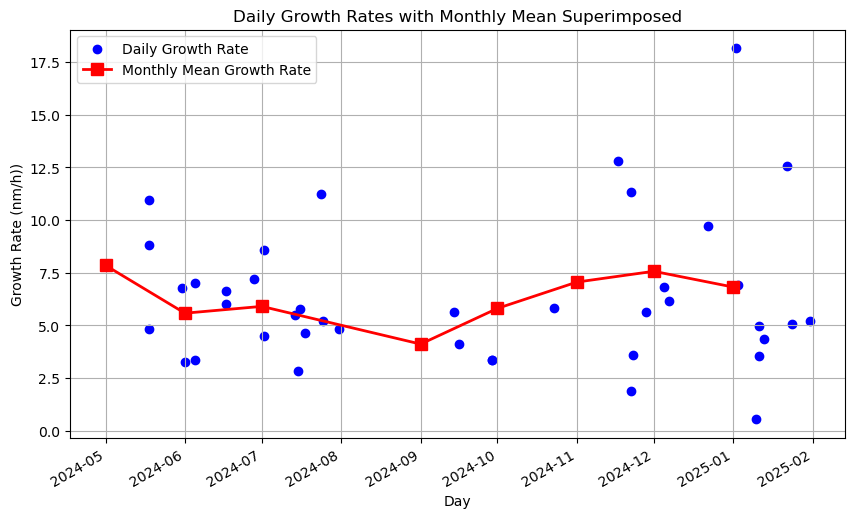

In [216]:
# Ensure the 'day' column is a datetime type (if it's not already)
dN_cluster_2['day'] = pd.to_datetime(dN_cluster_2['day'])

# Compute monthly means of the growth rate .
# We group by month using the dt.to_period('M') accessor and then convert the period back to a timestamp.
monthly_means = dN_cluster_2.groupby(dN_cluster_2['day'].dt.to_period('M'))['growth_rate (nm/h)'].mean()
monthly_means.index = monthly_means.index.to_timestamp()

# Create the scatterplot for the daily growth rates.
plt.figure(figsize=(10, 6))
plt.scatter(dN_cluster_2['day'], dN_cluster_2['growth_rate (nm/h)'], color='blue', marker='o', label='Daily Growth Rate')

# Superimpose the monthly mean values.
plt.plot(monthly_means.index, monthly_means, color='red', marker='s', linestyle='-', 
         linewidth=2, markersize=8, label='Monthly Mean Growth Rate')

# Set plot labels and title
plt.xlabel('Day')
plt.ylabel('Growth Rate (nm/h))')
plt.title('Daily Growth Rates with Monthly Mean Superimposed')

# Format the x-axis for dates
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()

plt.show()


/tmp/ipykernel_5799/2857406378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dN_cluster_1['day'] = pd.to_datetime(dN_cluster_1['day'])


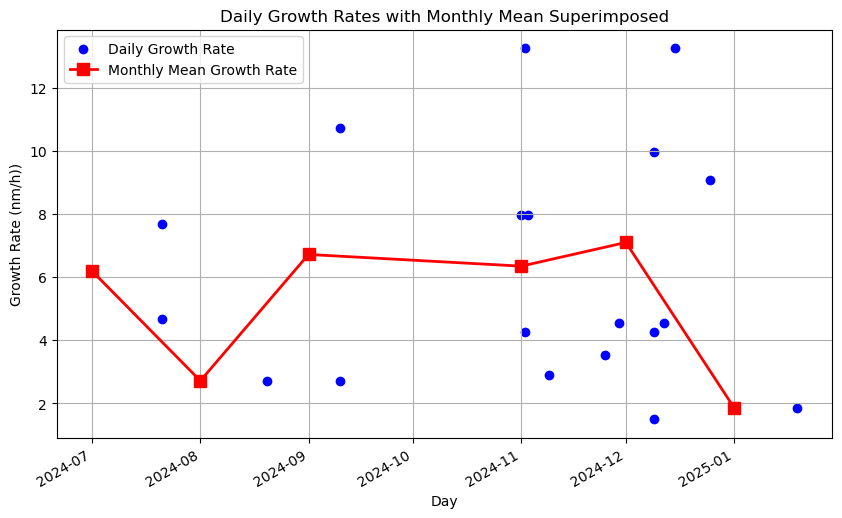

In [217]:
# Ensure the 'day' column is a datetime type (if it's not already)
dN_cluster_1['day'] = pd.to_datetime(dN_cluster_1['day'])

# Compute monthly means of the growth rate .
# We group by month using the dt.to_period('M') accessor and then convert the period back to a timestamp.
monthly_means = dN_cluster_1.groupby(dN_cluster_1['day'].dt.to_period('M'))['growth_rate (nm/h)'].mean()
monthly_means.index = monthly_means.index.to_timestamp()

# Create the scatterplot for the daily growth rates.
plt.figure(figsize=(10, 6))
plt.scatter(dN_cluster_1['day'], dN_cluster_1['growth_rate (nm/h)'], color='blue', marker='o', label='Daily Growth Rate')

# Superimpose the monthly mean values.
plt.plot(monthly_means.index, monthly_means, color='red', marker='s', linestyle='-', 
         linewidth=2, markersize=8, label='Monthly Mean Growth Rate')

# Set plot labels and title
plt.xlabel('Day')
plt.ylabel('Growth Rate (nm/h))')
plt.title('Daily Growth Rates with Monthly Mean Superimposed')

# Format the x-axis for dates
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()

plt.show()


/tmp/ipykernel_5799/2583240905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dN_cluster_0['day'] = pd.to_datetime(dN_cluster_0['day'])


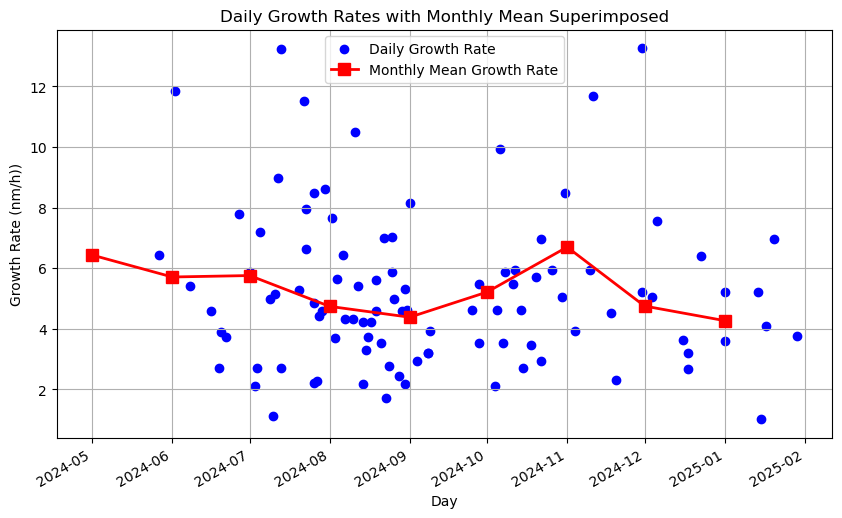

In [218]:
# Ensure the 'day' column is a datetime type (if it's not already)
dN_cluster_0['day'] = pd.to_datetime(dN_cluster_0['day'])

# Compute monthly means of the growth rate .
# We group by month using the dt.to_period('M') accessor and then convert the period back to a timestamp.
monthly_means = dN_cluster_0.groupby(dN_cluster_0['day'].dt.to_period('M'))['growth_rate (nm/h)'].mean()
monthly_means.index = monthly_means.index.to_timestamp()

# Create the scatterplot for the daily growth rates.
plt.figure(figsize=(10, 6))
plt.scatter(dN_cluster_0['day'], dN_cluster_0['growth_rate (nm/h)'], color='blue', marker='o', label='Daily Growth Rate')

# Superimpose the monthly mean values.
plt.plot(monthly_means.index, monthly_means, color='red', marker='s', linestyle='-', 
         linewidth=2, markersize=8, label='Monthly Mean Growth Rate')

# Set plot labels and title
plt.xlabel('Day')
plt.ylabel('Growth Rate (nm/h))')
plt.title('Daily Growth Rates with Monthly Mean Superimposed')

# Format the x-axis for dates
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()

plt.show()


In [224]:
dN_cluster_2.describe()

day                     start_time  \
count                             41                             41   
mean   2024-09-19 08:11:42.439024384  2024-09-19 18:55:36.585365760   
min              2024-05-18 00:00:00            2024-05-18 06:00:00   
25%              2024-07-02 00:00:00            2024-07-02 09:00:00   
50%              2024-09-16 00:00:00            2024-09-16 11:00:00   
75%              2024-12-07 00:00:00            2024-12-07 04:00:00   
max              2025-01-31 00:00:00            2025-01-31 03:00:00   
std                              NaN                            NaN   

                            end_time  start_diameter  end_diameter  \
count                             41    4.100000e+01  4.100000e+01   
mean   2024-09-19 22:36:35.121951232    6.078262e-09  2.771834e-08   
min              2024-05-18 09:00:00    1.773835e-09  4.223857e-09   
25%              2024-07-02 13:00:00    3.653771e-09  2.268812e-08   
50%              2024-09-16 15:00:00    4.538004e-09  2.445574e-08   
75%              2024-12-07 08:00:00    7.542927e-09  3.560527e-08   
max              2025-01-31 09:00:00    2.107146e-08  4.155270e-08   
std                              NaN    4.265602e-09  9.303003e-09   

       start_concentration  end_concentration  duration_hours  \
count            41.000000          41.000000       41.000000   
mean           1985.878532         999.366483        3.682927   
min             251.227518         298.404114        3.000000   
25%             954.714345         605.734451        3.000000   
50%            1672.280726         860.394593        3.000000   
75%            2349.255105        1235.567670        4.000000   
max            7586.049270        4103.861684        8.000000   
std            1508.287720         677.533940        1.293040   

       growth_rate (nm/h)        dN_dt  
count           41.000000    41.000000  
mean             6.329380  -295.466183  
min              0.559486 -1160.729195  
25%              4.360664  -433.384554  
50%              5.637606  -238.537455  
75%              7.014026   -69.254326  
max             18.150117   311.135068  
std              3.390155   335.589489

In [225]:
dN_cluster_1.describe()

day                     start_time  \
count                             19                             19   
mean   2024-11-01 16:25:15.789473792  2024-11-02 03:37:53.684210432   
min              2024-07-21 00:00:00            2024-07-21 00:00:00   
25%              2024-10-06 00:00:00            2024-10-06 16:00:00   
50%              2024-11-09 00:00:00            2024-11-09 11:00:00   
75%              2024-12-09 00:00:00            2024-12-09 14:00:00   
max              2025-01-19 00:00:00            2025-01-19 10:00:00   
std                              NaN                            NaN   

                            end_time  start_diameter  end_diameter  \
count                             19    1.900000e+01  1.900000e+01   
mean   2024-11-02 07:09:28.421052672    6.866912e-09  2.858531e-08   
min              2024-07-21 03:00:00    1.773835e-09  1.259131e-08   
25%              2024-10-06 20:00:00    1.773835e-09  1.692377e-08   
50%              2024-11-09 14:00:00    7.542927e-09  2.445574e-08   
75%              2024-12-09 17:00:00    8.465523e-09  4.155270e-08   
max              2025-01-19 13:00:00    2.445574e-08  4.155270e-08   
std                              NaN    5.601115e-09  1.185980e-08   

       start_concentration  end_concentration  duration_hours  \
count            19.000000          19.000000       19.000000   
mean            867.879830         888.209308        3.526316   
min             287.328271         282.212071        3.000000   
25%             415.740719         405.424858        3.000000   
50%             508.320316         618.535942        3.000000   
75%             863.962661         888.708326        4.000000   
max            4587.776678        2756.903554        5.000000   
std             966.264835         705.981929        0.841191   

       growth_rate (nm/h)        dN_dt  
count           19.000000    19.000000  
mean             6.177274    -8.953745  
min              1.499619 -1323.080245  
25%              3.223762   -53.671298  
50%              4.536382    19.659668  
75%              8.516291    93.406965  
max             13.259621   496.797332  
std              3.722973   367.756213

In [226]:
dN_cluster_0.describe()

day           start_time  \
count                  100                  100   
mean   2024-09-10 12:43:12  2024-09-10 23:36:36   
min    2024-05-27 00:00:00  2024-05-27 08:00:00   
25%    2024-07-26 18:00:00  2024-07-27 05:00:00   
50%    2024-08-25 12:00:00  2024-08-26 05:30:00   
75%    2024-10-20 12:00:00  2024-10-21 03:15:00   
max    2025-01-29 00:00:00  2025-01-29 04:00:00   
std                    NaN                  NaN   

                            end_time  start_diameter  end_diameter  \
count                            100    1.000000e+02  1.000000e+02   
mean   2024-09-11 03:08:59.999999744    5.962364e-09  2.398187e-08   
min              2024-05-27 11:00:00    1.773835e-09  7.011032e-09   
25%              2024-07-27 08:00:00    1.873627e-09  1.687341e-08   
50%              2024-08-26 08:30:00    4.223857e-09  2.268812e-08   
75%              2024-10-21 07:00:00    7.542927e-09  2.896996e-08   
max              2025-01-29 09:00:00    2.445574e-08  4.155270e-08   
std                              NaN    5.115809e-09  9.101728e-09   

       start_concentration  end_concentration  duration_hours  \
count           100.000000         100.000000         100.000   
mean            891.781745         922.104936           3.540   
min             212.295636         208.104011           3.000   
25%             359.370436         517.243556           3.000   
50%             497.176215         705.033309           3.000   
75%             916.920714        1106.240877           4.000   
max           17771.106657        3583.915793           6.000   
std            1789.633543         614.266911           0.881   

       growth_rate (nm/h)        dN_dt  
count          100.000000   100.000000  
mean             5.190550    11.051073  
min              1.026525 -5665.033464  
25%              3.542940   -58.848300  
50%              4.633987    41.701168  
75%              6.049894   189.648352  
max             13.259621   826.018549  
std              2.529439   622.569381

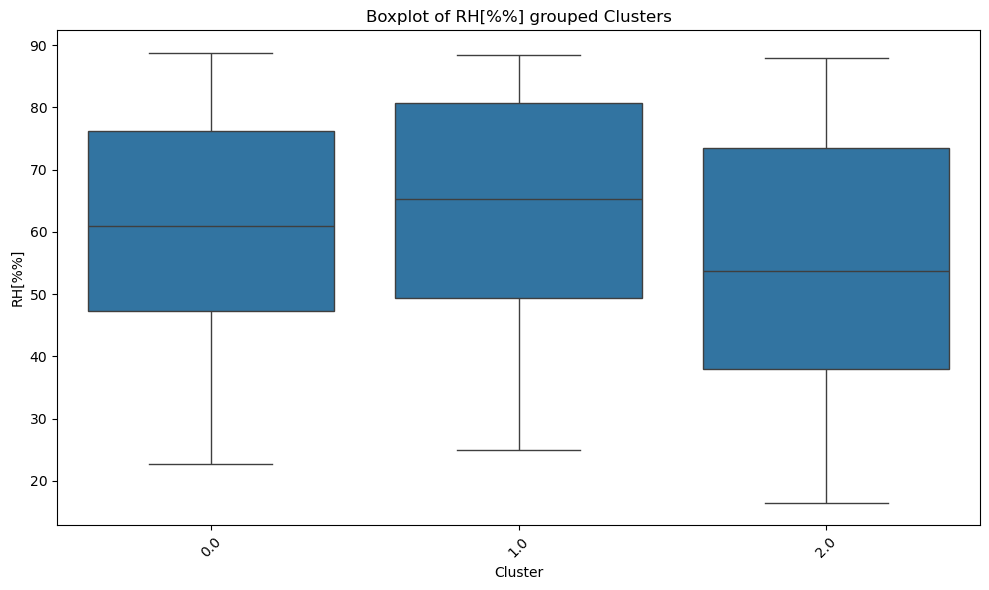

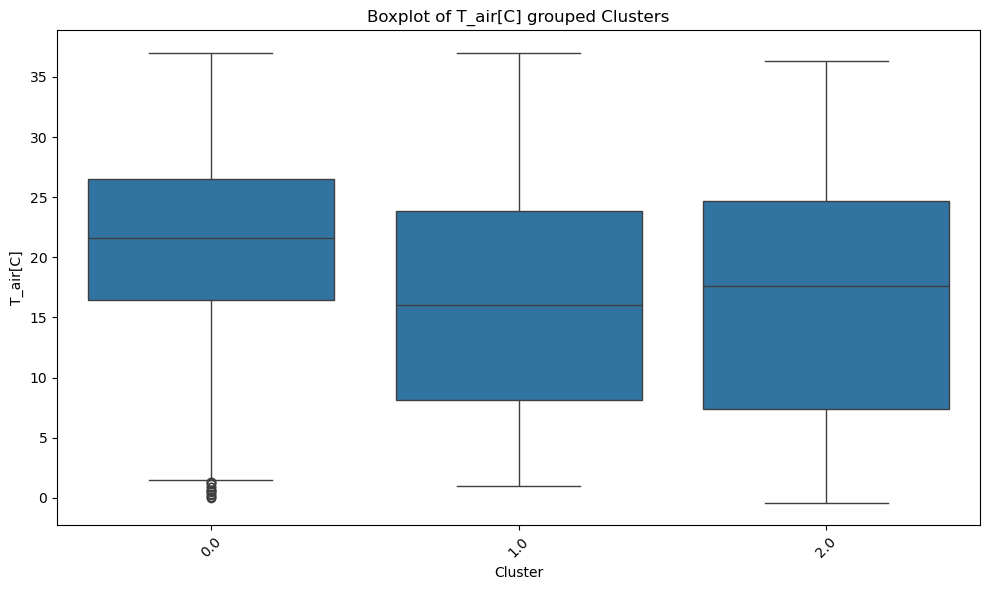

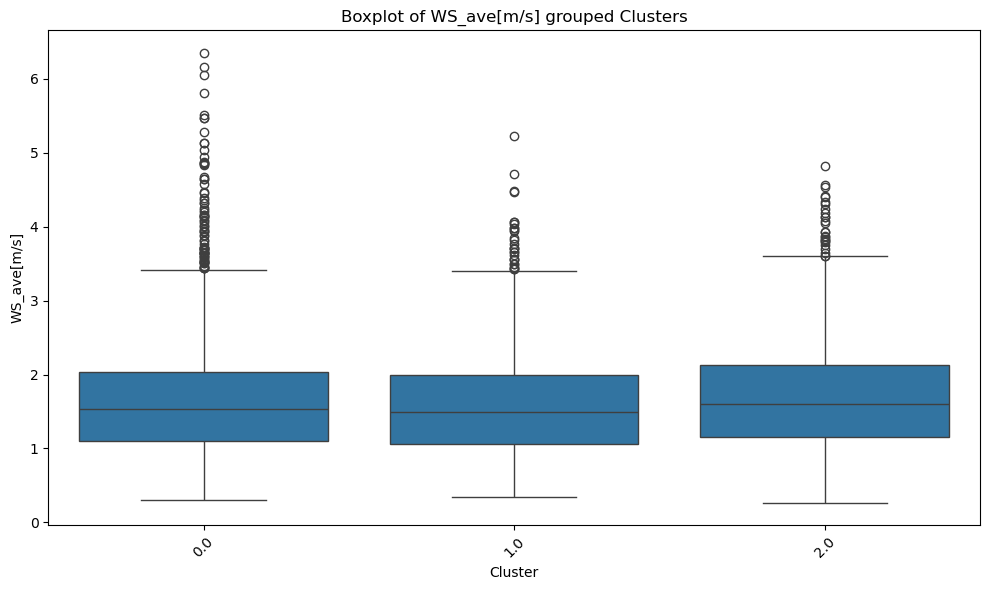

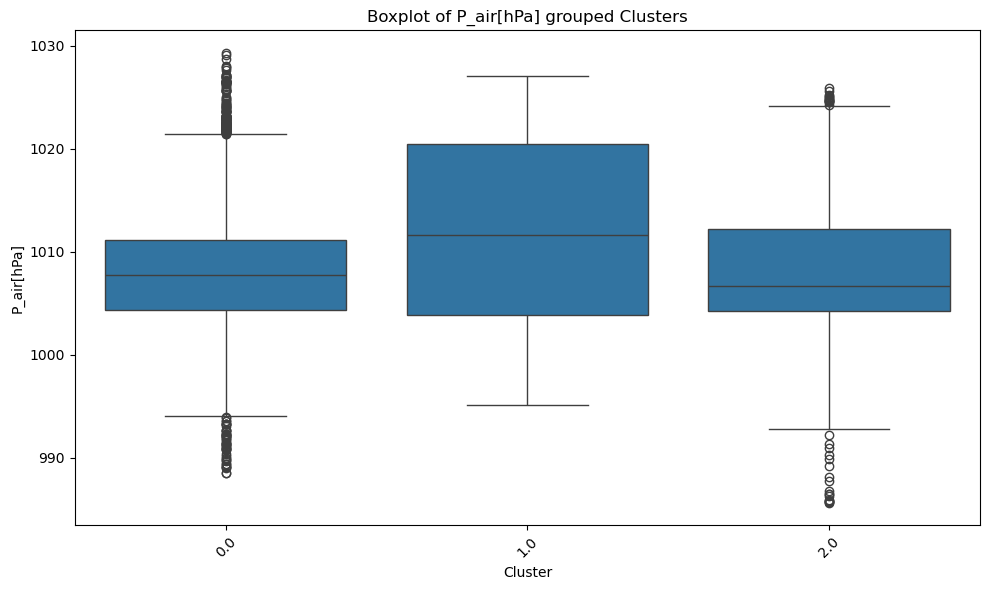

In [227]:
met_df_merged_clusters = met_data.merge(daily_results_df_pos[['date', 'gmm_label']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
met_vars = ['RH[%%]', 'T_air[C]', 'WS_ave[m/s]', 'P_air[hPa]']  # Adjust the variable names as needed

for var in met_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gmm_label', y=var, data=met_df_merged_clusters)
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


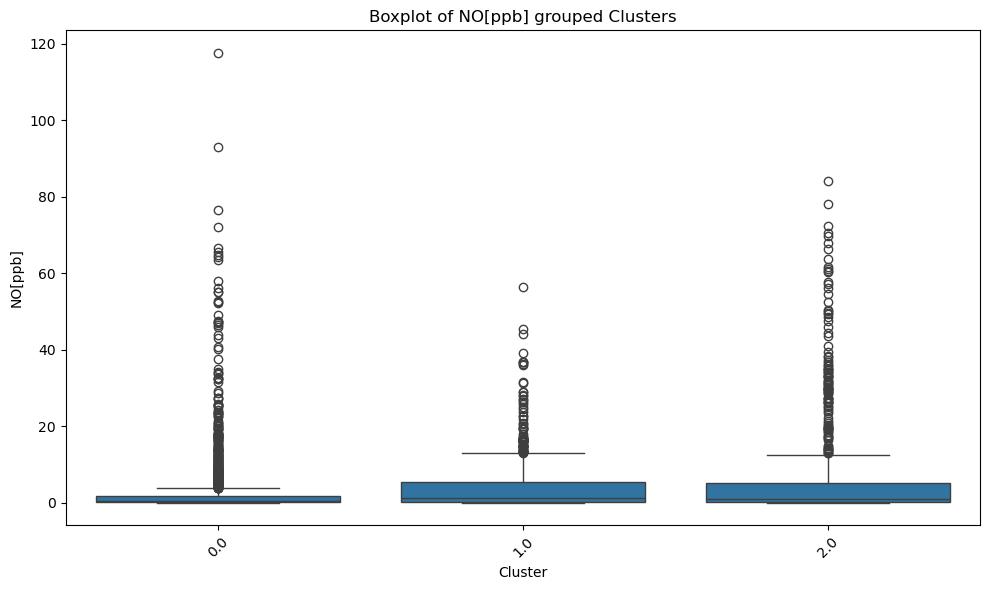

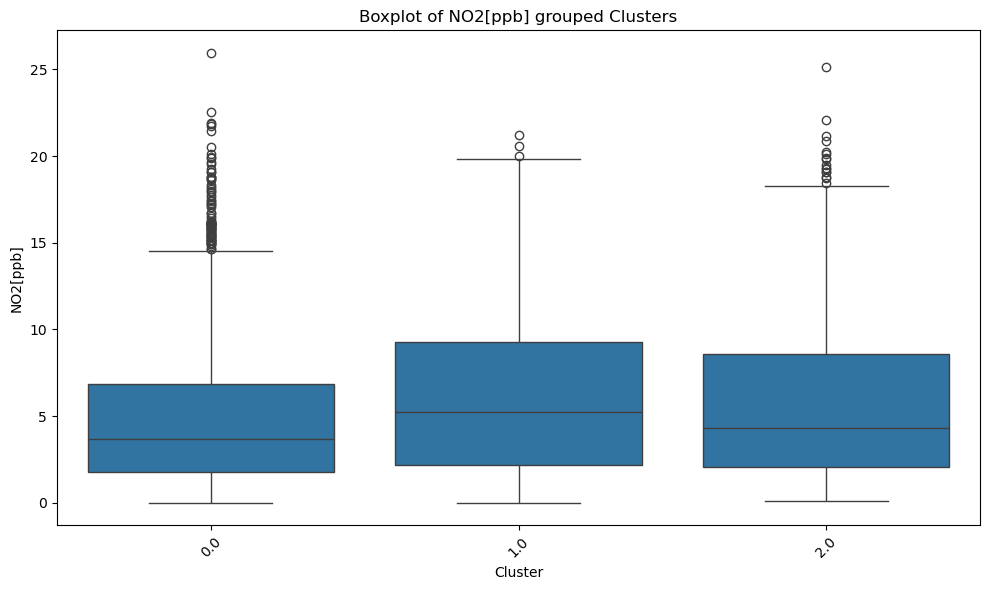

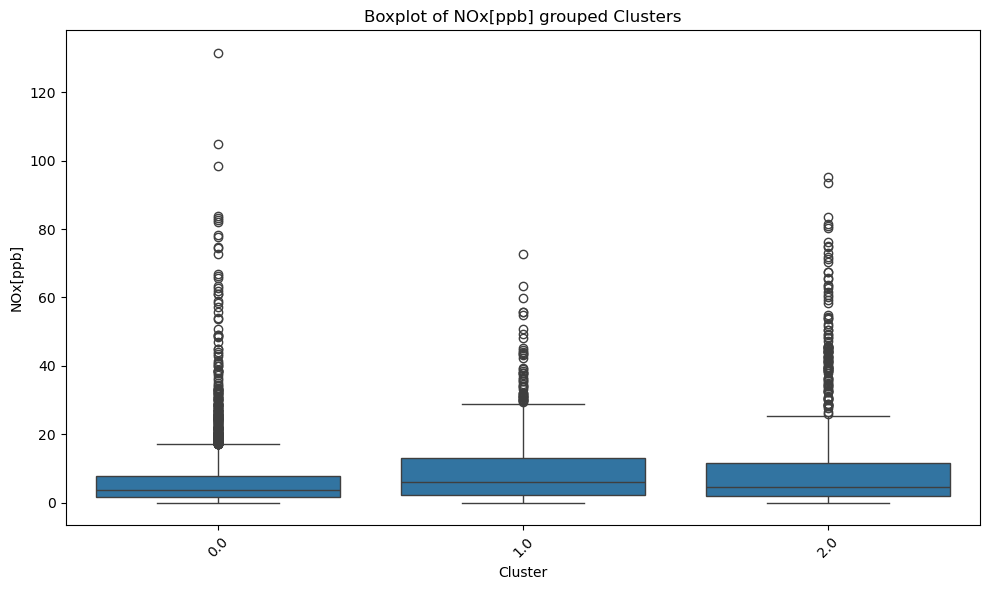

In [228]:
nox_df_merged_clusters = nox_data.merge(daily_results_df_pos[['date', 'gmm_label']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
nox_vars = ['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']  # Adjust the variable names as needed

for var in nox_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gmm_label', y=var, data=nox_df_merged_clusters)
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


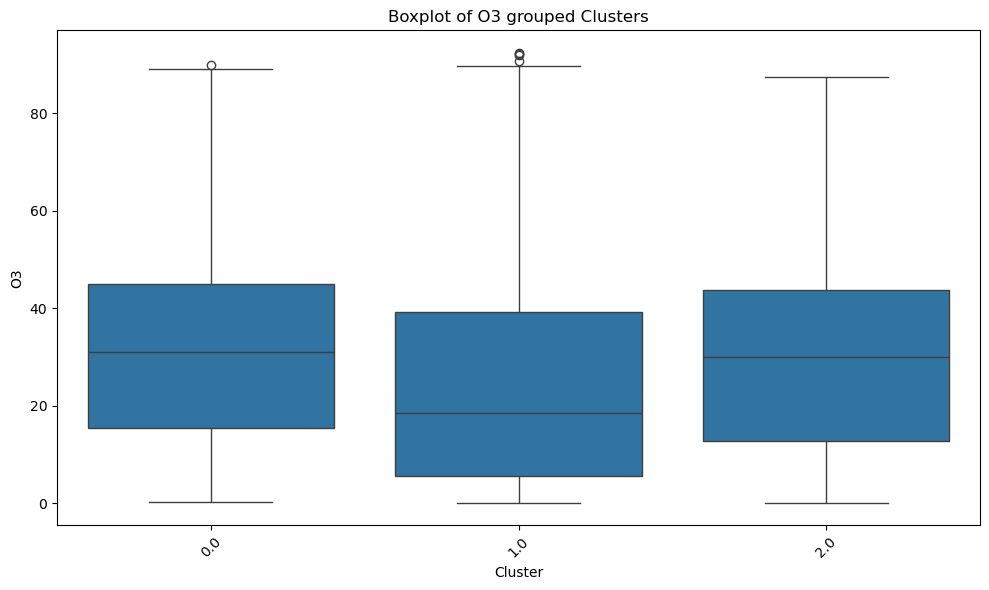

In [229]:
o3_df_merged_clusters = o3_data.merge(daily_results_df_pos[['date', 'gmm_label']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
o3_vars = ['O3']   # Adjust the variable names as needed

for var in o3_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gmm_label', y=var, data=o3_df_merged_clusters)
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


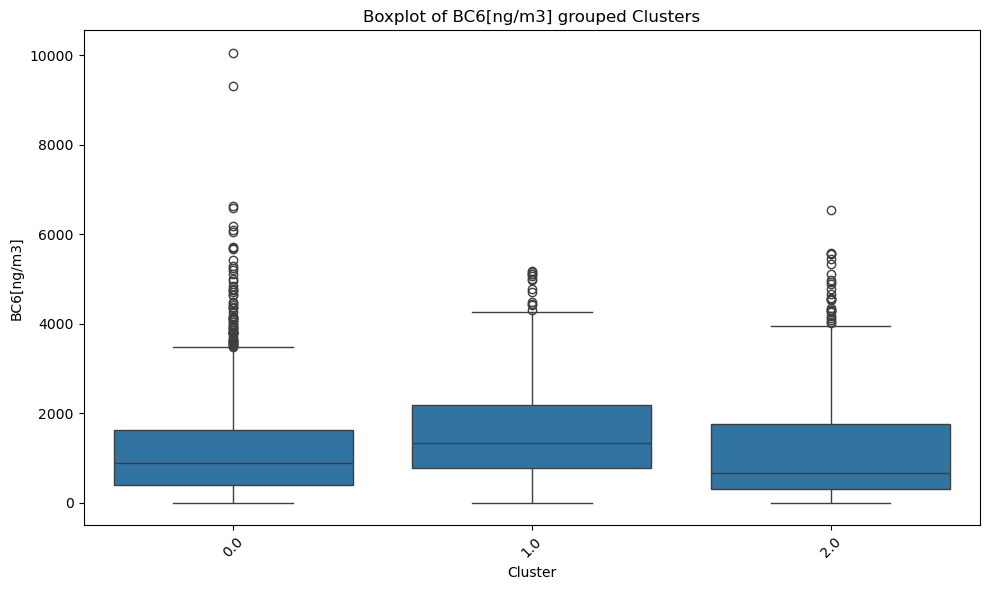

In [230]:
bc_df_merged_clusters = bc_data.merge(daily_results_df_pos[['date', 'gmm_label']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
bc_vars = ['BC6[ng/m3]']   # Adjust the variable names as needed

for var in bc_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gmm_label', y=var, data = bc_df_merged_clusters)
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Condensation sink

In [244]:
cond_sink = af.calc_cs(nais_neg_particles, temp=293.15, pres=101325.0)
#cond_sink.rename(columns={0: 'cs'}, inplace=True)
cond_sink.name = 'cs'

In [247]:
a = result.merge(cond_sink, left_index=True, right_index=True)

In [248]:
a

max_diameter  max_concentration        date        cs
time                                                                      
2024-05-16 00:00:00           NaN                NaN  2024-05-16       NaN
2024-05-16 01:00:00           NaN                NaN  2024-05-16       NaN
2024-05-16 02:00:00           NaN                NaN  2024-05-16       NaN
2024-05-16 03:00:00           NaN                NaN  2024-05-16       NaN
2024-05-16 04:00:00           NaN                NaN  2024-05-16       NaN
...                           ...                ...         ...       ...
2025-01-31 20:00:00  3.931458e-09        1240.970564  2025-01-31  0.001663
2025-01-31 21:00:00  3.931458e-09         914.459018  2025-01-31  0.001858
2025-01-31 22:00:00  3.931458e-09        1128.211029  2025-01-31  0.002105
2025-01-31 23:00:00  3.846420e-08         359.691640  2025-01-31  0.001180
2025-02-01 00:00:00  4.155270e-08         322.173857  2025-02-01  0.001020

[6265 rows x 4 columns]

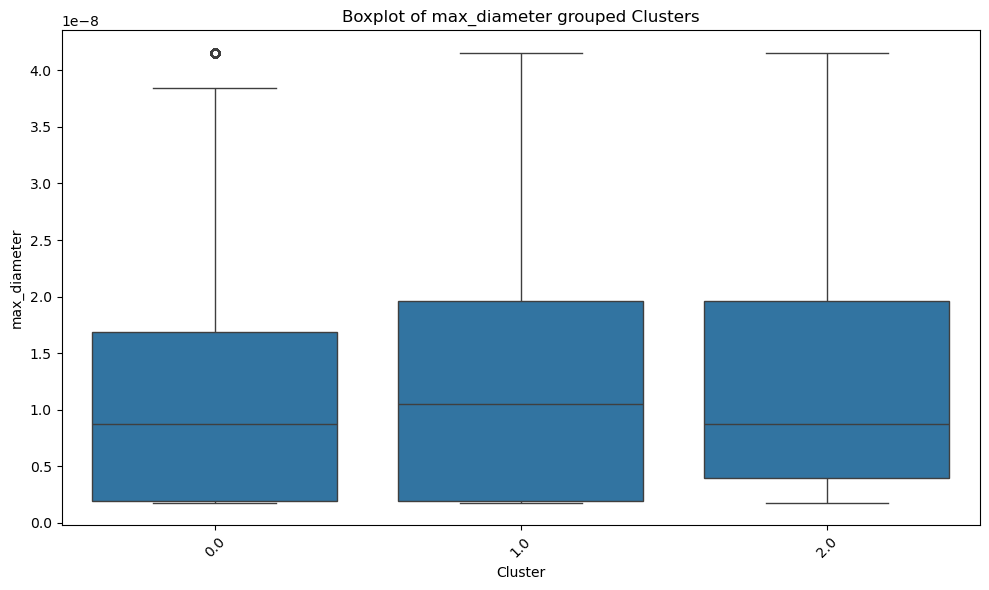

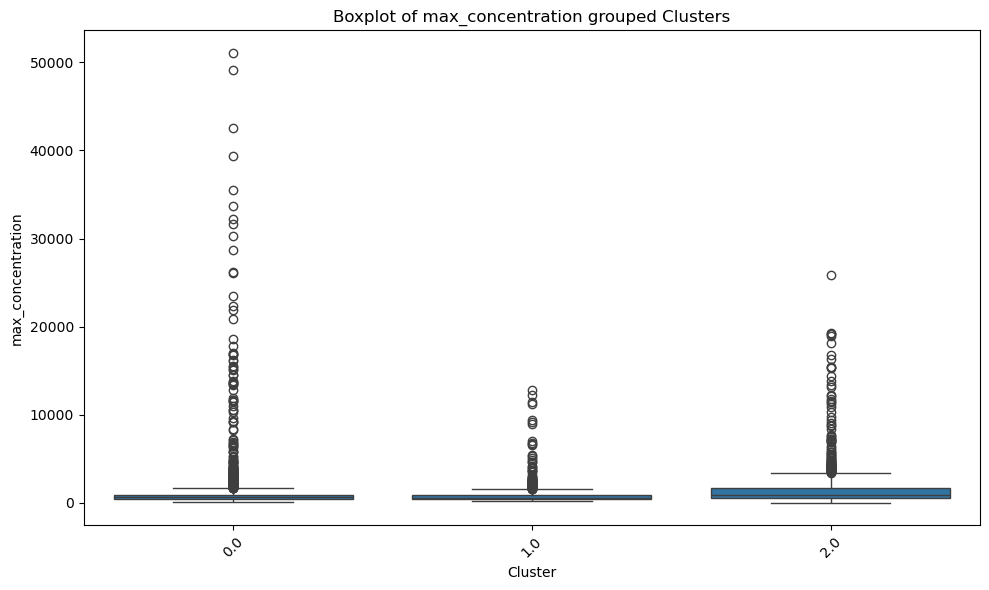

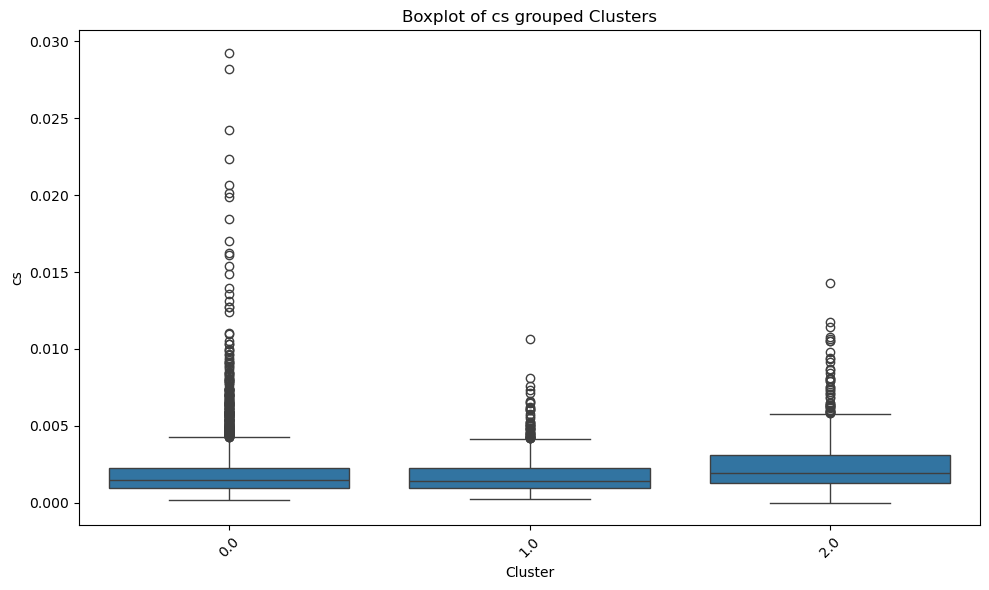

In [249]:
cs_df_merged_clusters = a.merge(daily_results_df_pos[['date', 'gmm_label']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
a_vars = ['max_diameter','max_concentration','cs']   # Adjust the variable names as needed

for var in a_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='gmm_label', y=var, data = cs_df_merged_clusters)
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


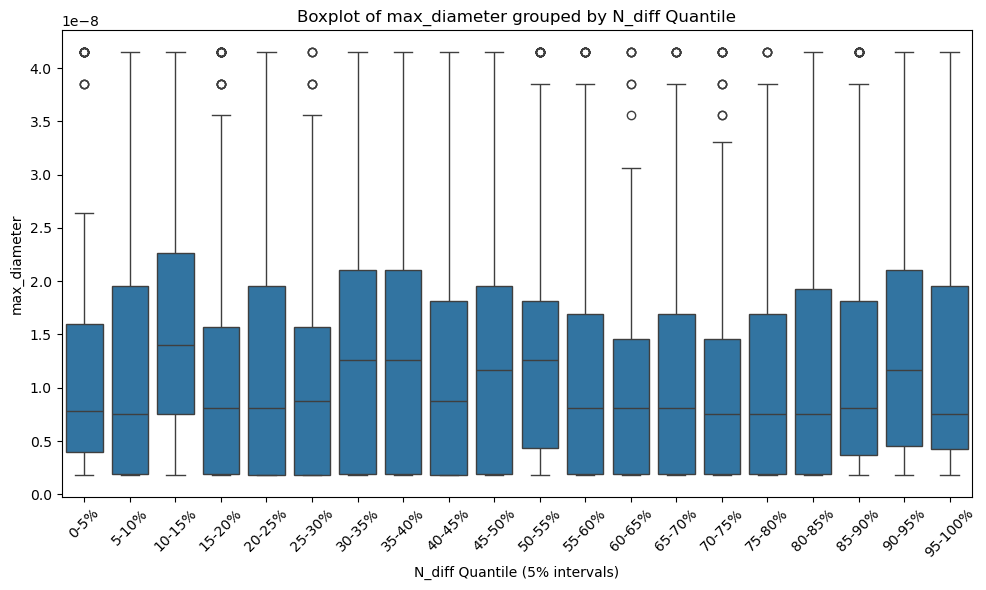

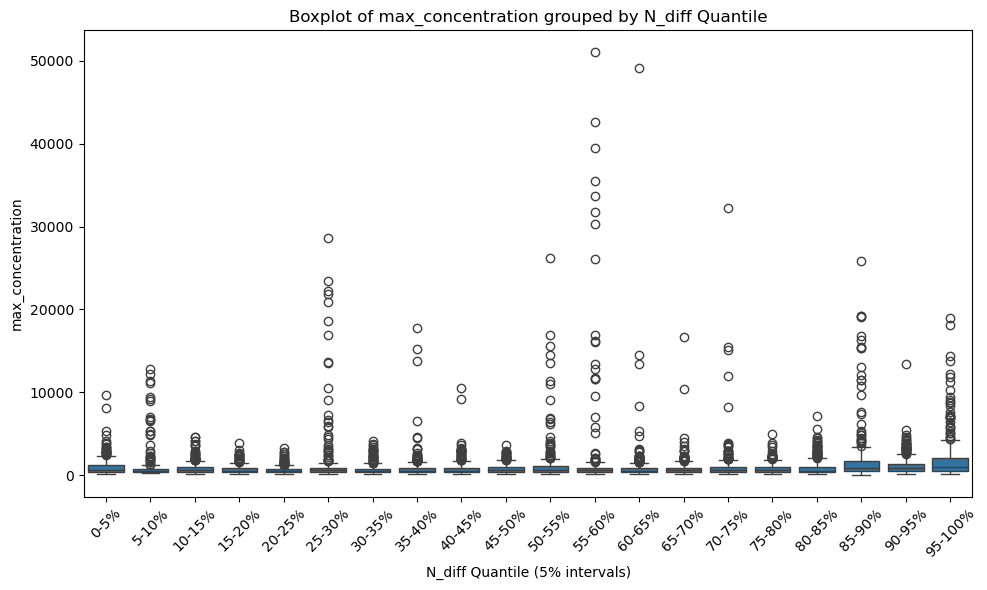

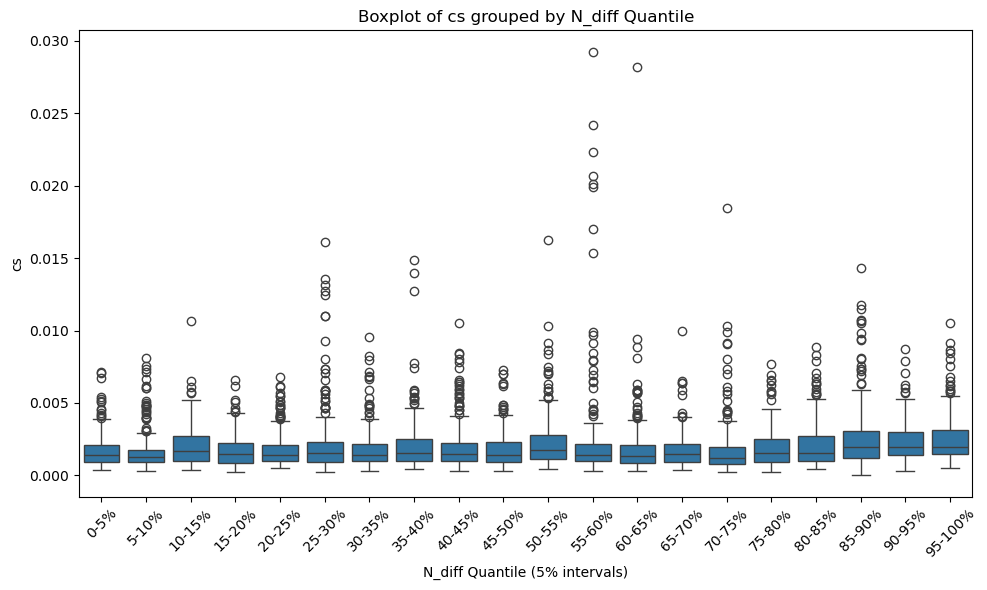

In [251]:
a_rank_df_merged = a.merge(daily_results_df[['date', 'diff_quantile']], on='date', how='left')

# --- 5. Plot Boxplots for Each Meteorological Variable Grouped by diff_quantile ---
# Define the list of meteorological variables you wish to plot.
a_vars = ['max_diameter','max_concentration','cs']  # Adjust the variable names as needed

for var in a_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diff_quantile', y=var, data=a_rank_df_merged)
    plt.xlabel('N_diff Quantile (5% intervals)')
    plt.ylabel(var)
    plt.title(f'Boxplot of {var} grouped by N_diff Quantile')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
